<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/All_modells_addT1_change_lag_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GGD connect and load all functions

In [ ]:
# !pip install import-ipynb --q


In [1]:
from google.colab import drive
drive.mount('/content/drive')
%run /content/drive/MyDrive/AAA_hybrid/all_functions.ipynb

Mounted at /content/drive


In [ ]:
# import import_ipynb
# import all_functions.ipynb


In [2]:
# TONG KET THONG KE
import pandas as pd
df_all=pd.DataFrame(columns=['NAME','CC1','MAE1','CC2','MAE1','CC3','MAE3'],index=range(14))

# df_all

#T1M1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 11/300
12/12 [==============================] - 4s 171ms/step - loss: 0.3330 - val_loss: 0.2950
Epoch 12/300
12/12 [==============================] - 2s 153ms/step - loss: 0.2498 - val_loss: 0.2181
Epoch 13/300
12/12 [==============================] - 2s 153ms/step - loss: 0.1804 - val_loss: 0.1544
Epoch 14/300
12/12 [==============================] - 2s 152ms/step - loss: 0.1098 - val_loss: 0.0594
Epoch 15/300
12/12 [======================

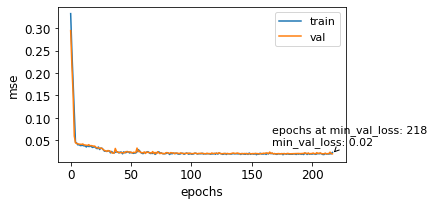

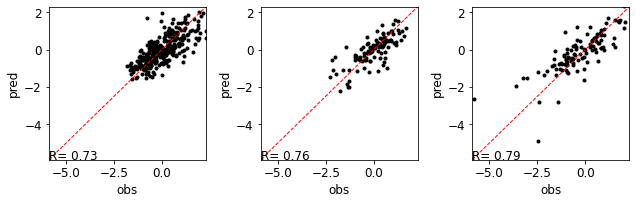

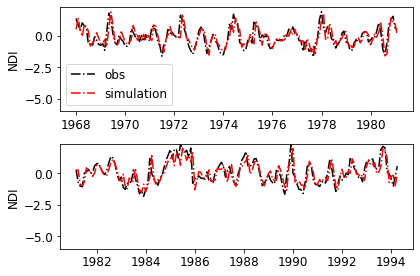

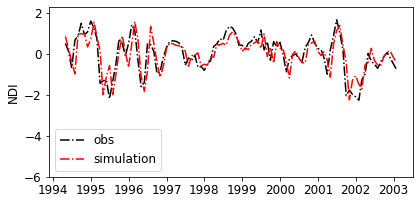

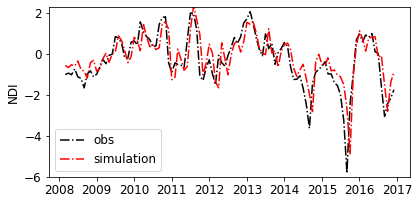

0.4566354306541454
0.44884931649169274
0.5885381473210763
   name_model       mae      rmse          mape       NSE        CC
0    training  0.401953  0.590981  1.662568e+00  0.377245  0.734662
1  validation  0.342939  0.588722  2.487069e+06  0.427650  0.757891
2     testing  0.385944  0.803303  1.120983e+00  0.429610  0.792100
    NAME       CC1      MAE1       CC2      MAE1     CC3      MAE3
0   T1M1  0.734662  0.401953  0.757891  0.342939  0.7921  0.385944
1    NaN       NaN       NaN       NaN       NaN     NaN       NaN
2    NaN       NaN       NaN       NaN       NaN     NaN       NaN
3    NaN       NaN       NaN       NaN       NaN     NaN       NaN
4    NaN       NaN       NaN       NaN       NaN     NaN       NaN
5    NaN       NaN       NaN       NaN       NaN     NaN       NaN
6    NaN       NaN       NaN       NaN       NaN     NaN       NaN
7    NaN       NaN       NaN       NaN       NaN     NaN       NaN
8    NaN       NaN       NaN       NaN       NaN     NaN       NaN


In [7]:
# @title  { form-width: "100px" }
#@title
# -*- coding: utf-8 -*-
"""T3M1_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1imbIopuYdcKUoqWQF0SzMDHUfz1OKYvf
"""


"""Set Output folder"""
import datetime
import os
"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T1M1_lag24'+'/'+'save_model',
      'T1M1_lag24'+'/'+'save_pickles',
      'T1M1_lag24'+'/'+'tables',
      'T1M1_lag24'+'/'+'figs',
      'T1M1_lag24'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)
  
  # Load du lieu
  import pickle
# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

##
###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T1M1','T1M2','T1M3']
k=29
n_in0=60
n_out0=1
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# -----------------------------------------------------------------------------#
#-------------------------------------------------------------------------------#
# Chi lay NDI3 khac voi cac kich ban M3
df1=df0.iloc[:(2016-1968+1)*12,-1]

# df1
# =============================================================================

df2=series_to_supervised_df(pd.DataFrame(df1),n_in0,n_out0)
df2

#################################################################################
df4=df2
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1 # cai nay dung hon
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""
if 'model' in locals(): # xoa di cac model tam thoi de khong bi anh huong bo nho
  # myVar exists.
  del model
tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(n_in0, n_features)))
# model.add(LSTM(32))
model.add(Dense(y_train.shape[1]))
# =============================================================================
# =============================================================================
# # Define model
# # TH2:
# model = Sequential()
# model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.5)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT1M1.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
### == FITTING MODEL ##############################
# Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=300,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # Save loss training
# # save loss training 
with open(outs[4]+'/'+'trainHistoryDictT1M1.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT1M1.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT1M1.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T1M1_lag24'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_T1'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T1'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T1'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T1'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T1M1'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)

# T1M2

In [ ]:
# @title  { form-width: "100px" }
#@title
# -*- coding: utf-8 -*-
"""T3M1_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1imbIopuYdcKUoqWQF0SzMDHUfz1OKYvf
"""


"""Set Output folder"""
import datetime
import os
"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T1M2'+'/'+'save_model',
      'T1M2'+'/'+'save_pickles',
      'T1M2'+'/'+'tables',
      'T1M2'+'/'+'figs',
      'T1M2'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)
  
  # Load du lieu
  import pickle
# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

##
###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T1M1','T1M2','T1M3']
k=29
n_in0=3
n_out0=2
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# -----------------------------------------------------------------------------#
#-------------------------------------------------------------------------------#
# Chi lay NDI3 khac voi cac kich ban M3
df1=df0.iloc[:(2016-1968+1)*12,-1]

# df1
# =============================================================================

df2=series_to_supervised_df(pd.DataFrame(df1),n_in0,n_out0)
df2

#################################################################################
df4=df2
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-2].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-2].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-2].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(n_in0, n_features)))
# model.add(Dense(n_out0)) # ko thich multiple steps???
model.add(Dense(1))
# =============================================================================
# =============================================================================
# # Define model
# # TH2:
# model = Sequential()
# model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT1M2.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
### == FITTING MODEL ##############################
# Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # Save loss training
# # save loss training 
with open(outs[4]+'/'+'trainHistoryDictT1M2.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT1M2.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT1M2.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T1M2'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T1M2'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_T1'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,3.0])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T1'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T1'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T1'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T1M2'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)

# T1M3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 11/1500
12/12 [==============================] - 3s 127ms/step - loss: 0.2195 - val_loss: 0.2271
Epoch 12/1500
12/12 [==============================] - 0s 23ms/step - loss: 0.1928 - val_loss: 0.1907
Epoch 13/1500
12/12 [==============================] - 0s 21ms/step - loss: 0.1444 - val_loss: 0.1583
Epoch 14/1500
12/12 [==============================] - 0s 21ms/step - loss: 0.1230 - val_loss: 0.1285
Epoch 15/1500
12/12 [====================

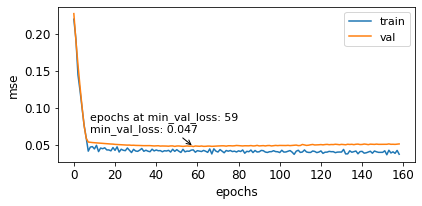

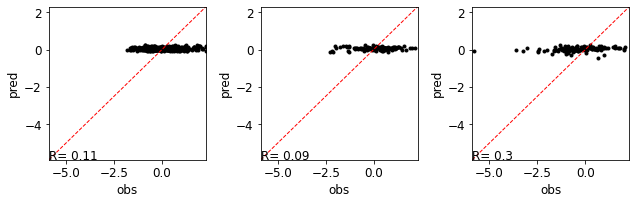

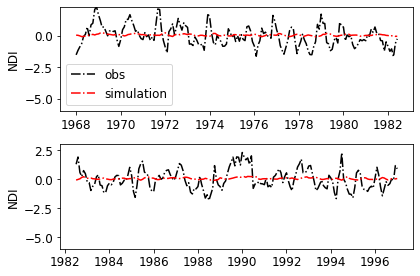

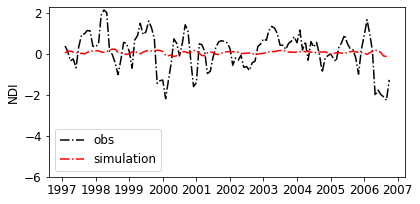

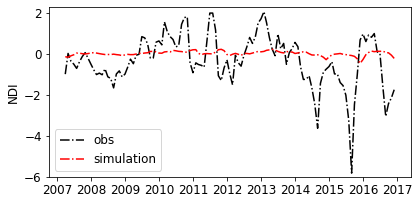

0.6985958983352472
0.7309797470262533
0.94952571686611
   name_model       mae      rmse           mape         NSE        CC
0    training  0.583989  0.855498       1.072057 -140.196366  0.107873
1  validation  0.541489  0.914506  854176.230926 -153.485730  0.088728
2     testing  0.749514  1.252831       1.048372 -129.668131  0.295082
    NAME       CC1      MAE1        CC2      MAE1       CC3      MAE3
0   T1M3  0.107873  0.583989  0.0887279  0.541489  0.295082  0.749514
1    NaN       NaN       NaN        NaN       NaN       NaN       NaN
2    NaN       NaN       NaN        NaN       NaN       NaN       NaN
3    NaN       NaN       NaN        NaN       NaN       NaN       NaN
4    NaN       NaN       NaN        NaN       NaN       NaN       NaN
5    NaN       NaN       NaN        NaN       NaN       NaN       NaN
6    NaN       NaN       NaN        NaN       NaN       NaN       NaN
7    NaN       NaN       NaN        NaN       NaN       NaN       NaN
8    NaN       NaN       NaN   

In [ ]:
# @title  { form-width: "100px" }
#@title
# -*- coding: utf-8 -*-
"""T3M1_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1imbIopuYdcKUoqWQF0SzMDHUfz1OKYvf
"""


"""Set Output folder"""
import datetime
import os
"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T1M3'+'/'+'save_model',
      'T1M3'+'/'+'save_pickles',
      'T1M3'+'/'+'tables',
      'T1M3'+'/'+'figs',
      'T1M3'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)
  
  # Load du lieu
  import pickle
# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

##
###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T1M1','T1M2','T1M3']
k=29
n_in0=3
n_out0=3
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# -----------------------------------------------------------------------------#
#-------------------------------------------------------------------------------#
# Chi lay NDI3 khac voi cac kich ban M3
df1=df0.iloc[:(2016-1968+1)*12,-1]

# df1
# =============================================================================

df2=series_to_supervised_df(pd.DataFrame(df1),n_in0,n_out0)
df2

#################################################################################
df4=df2
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-3].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)
# Chon buoc thoi gian lui lai o day
x_val,y_val0=val_df.iloc[:,:-3].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-3].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(n_in0, n_features)))
# model.add(Dense(n_out0)) # ko thich multiple steps???
model.add(Dense(1))
# =============================================================================
# =============================================================================
# # Define model
# # TH2:
# model = Sequential()
# model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT1M3.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
### == FITTING MODEL ##############################
# Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # Save loss training
# # save loss training 
with open(outs[4]+'/'+'trainHistoryDictT1M3.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT1M3.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT1M3.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T1M3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T1M3'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T1M3_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T1M3_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_T1'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,3.0])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T1'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T1'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T1'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T1M3'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)

# T3M1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(351, 1, 9)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,409
Trainable params: 5,409
Non-trainable params: 0
_________________________________________________________________
Loaded model from disk
[223] [0.02414105]


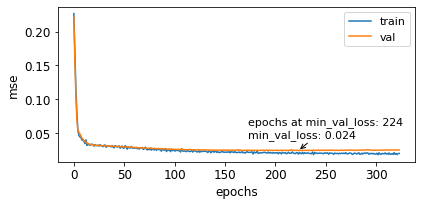

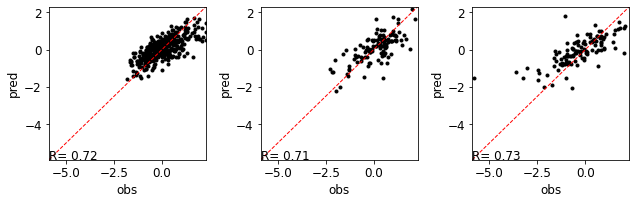

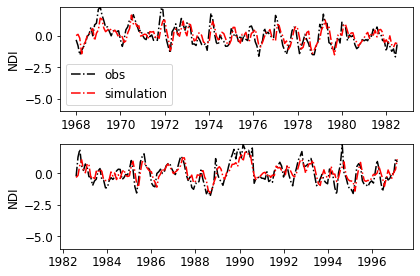

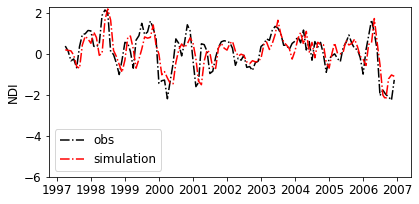

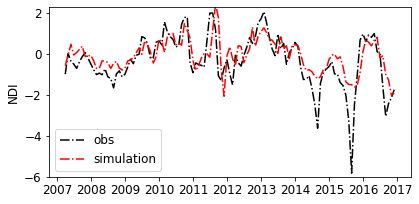

0.4801833320677577
0.5012461616204948
0.6405087886963232
   name_model       mae      rmse          mape       NSE        CC
0    training  0.410760  0.598958  1.540747e+00  0.002421  0.717645
1  validation  0.417206  0.653205  4.519841e+06  0.251977  0.710556
2     testing  0.484650  0.887430  1.116263e+00 -0.264149  0.730364
    NAME       CC1     MAE1       CC2      MAE1       CC3     MAE3
0   T3M1  0.717645  0.41076  0.710556  0.417206  0.730364  0.48465
1    NaN       NaN      NaN       NaN       NaN       NaN      NaN
2    NaN       NaN      NaN       NaN       NaN       NaN      NaN
3    NaN       NaN      NaN       NaN       NaN       NaN      NaN
4    NaN       NaN      NaN       NaN       NaN       NaN      NaN
5    NaN       NaN      NaN       NaN       NaN       NaN      NaN
6    NaN       NaN      NaN       NaN       NaN       NaN      NaN
7    NaN       NaN      NaN       NaN       NaN       NaN      NaN
8    NaN       NaN      NaN       NaN       NaN       NaN      NaN
9

In [ ]:
#@title  { form-width: "100px" }
#@title
# -*- coding: utf-8 -*-
"""T3M1_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1imbIopuYdcKUoqWQF0SzMDHUfz1OKYvf
"""


"""Set Output folder"""
import datetime
import os
from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T3M1'+'/'+'save_model',
      'T3M1'+'/'+'save_pickles',
      'T3M1'+'/'+'tables',
      'T3M1'+'/'+'figs',
      'T3M1'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)

"""# Import Libraries"""
%run all_functions.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
def series_to_supervised_df(data, n_in, n_out, dropnan=True): # dung cho pandas
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1): # 
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i)) 
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

import pickle
# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

"""# Define  station,lag time, lead time"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T3M1','T3M2','T3M3']
k=29
n_in0=3
n_out0=1
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12,:]
# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)

# =============================================================================
# =============================================================================
#     remove values PRS  at fure prediction
# var3(t),var2(t),var1(t) have to remove
list_drops=[np.arange(2,5)*-1,np.arange(2,9)*-1,np.arange(2,13)*-1]
list_drops1=[[],[],[]]
list_drops1a=[[-5,-9,-13],[-5,-9,-13,-17],[-5,-9,-13,-17,-21]]


# =============================================================================
df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
df4a=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)
# Tu T4 chuyen sang T3, bo PRS tai thoi diem du bao
list_drops1b=[[-2,-3,-4],[-2,-3,-4,-5,-6,-7],[-2,-3,-4,-5,-6,-7,-8,-9,-10]]
df4=df4a.drop(df4a.columns[[list_drops1b[n_out0-1]]],axis=1)
# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Fit model can bo sung them batchsize

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=12,
# initial_epoch=10,
# )


# # Save loss training
# # save loss training 
# with open(outs[4]+'/'+'trainHistoryDictT3M1.pkl', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT3M1.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T3M1'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)

#T3M2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(351, 1, 9)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,409
Trainable params: 5,409
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Loaded model from disk
[615] [0.03699731]


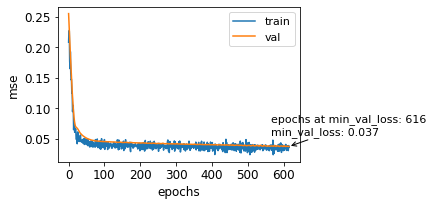

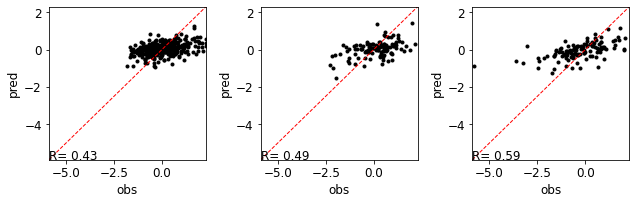

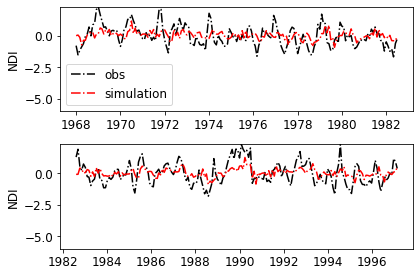

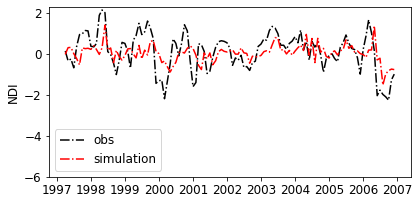

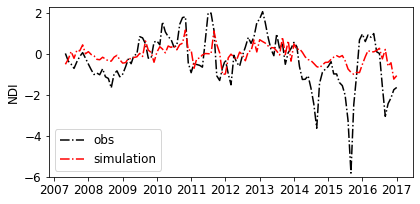

0.6254315401957904
0.6510162918067449
0.7998092082200939
   name_model       mae      rmse          mape       NSE        CC
0    training  0.539718  0.775695  1.308862e+00 -4.859557  0.427031
1  validation  0.567139  0.808832  1.785509e+06 -2.639610  0.478832
2     testing  0.664425  1.072638  1.168279e+00 -5.103250  0.498578
    NAME       CC1      MAE1       CC2      MAE1       CC3      MAE3
0   T3M1  0.717645   0.41076  0.710556  0.417206  0.730364   0.48465
1   T3M2  0.427031  0.539718  0.478832  0.567139  0.498578  0.664425
2    NaN       NaN       NaN       NaN       NaN       NaN       NaN
3    NaN       NaN       NaN       NaN       NaN       NaN       NaN
4    NaN       NaN       NaN       NaN       NaN       NaN       NaN
5    NaN       NaN       NaN       NaN       NaN       NaN       NaN
6    NaN       NaN       NaN       NaN       NaN       NaN       NaN
7    NaN       NaN       NaN       NaN       NaN       NaN       NaN
8    NaN       NaN       NaN       NaN       NaN  

In [ ]:
#@title  { form-width: "100px" }
#@title
# -*- coding: utf-8 -*-
"""T3M2_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1kTmOaSWjggtNqXkcHlk7ds9WHSWMwRzz
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T3M1'+'/'+'save_model',
      'T3M1'+'/'+'save_pickles',
      'T3M1'+'/'+'tables',
      'T3M1'+'/'+'figs',
      'T3M1'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

"""# Define  station,lag time, lead time"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T3M1','T3M2','T3M3']
k=29
n_in0=3
n_out0=2
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12+1,:] # da cong them 1 thang 2017.01
# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)

# =============================================================================
# =============================================================================
#     remove values PRS  at fure prediction
# var3(t),var2(t),var1(t) have to remove
list_drops=[np.arange(2,5)*-1,np.arange(2,9)*-1,np.arange(2,13)*-1]
list_drops1=[[],[],[]]
list_drops1a=[[-5,-9,-13],[-5,-9,-13,-17],[-5,-9,-13,-17,-21]]


# =============================================================================
df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
df4a=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)
# Tu T4 chuyen sang T3, bo PRS tai thoi diem du bao
list_drops1b=[[-2,-3,-4],[-2,-3,-4,-5,-6,-7],[-2,-3,-4,-5,-6,-7,-8,-9,-10]]
df4=df4a.drop(df4a.columns[[list_drops1b[n_out0-1]]],axis=1)
# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# # Tao cac call back khac nhau 
# ###############################################################################
# # NAME="T4-M1-TB-{}".format(int(time.time()))
# NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# # tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# # path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# # tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
# tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
#                                                      histogram_freq=1) # ket hop 
# #####**************************************************
# ## IMPORTNANT 
# conditional call back
value00=0.037 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=500,
mode="min",
),

# ###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
# ######################################################################
# #

"""# TRAINING MODEL"""

# # set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

# # Fit model can bo sung them batchsize

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=3,
# initial_epoch=10,
# )

# # Save loss training
# # save loss training 
# with open(outs[4]+'/'+'trainHistoryDictT3M2.pkl', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT3M2.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)
# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras")
print("Loaded model from disk")


"""# Draw graphics"""

# # =============================================================================
# # DANH GIA
# # =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
# ###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=1
df_all_hinh['NAME'][i]='T3M2'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3
#------------------------------------------------------------

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M2'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
plt.legend(['obs','simulation'])
plt.ylabel('NDI')
plt.tight_layout()

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M2=pred3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')

#
df_all.iloc[1,0]='T3M2'
df_all.iloc[1,1]=df_error.iloc[0,5]
df_all.iloc[1,2]=df_error.iloc[0,1]
df_all.iloc[1,3]=df_error.iloc[1,5]
df_all.iloc[1,4]=df_error.iloc[1,1]
df_all.iloc[1,5]=df_error.iloc[2,5]
df_all.iloc[1,6]=df_error.iloc[2,1]
print(df_all)

#T3M3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(351, 1, 9)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,409
Trainable params: 5,409
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Loaded model from disk
[678] [0.04614592]


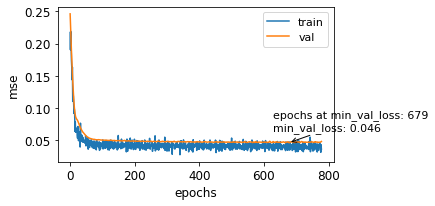

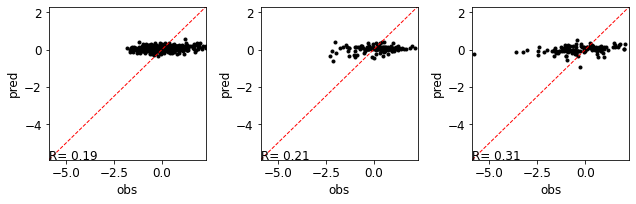

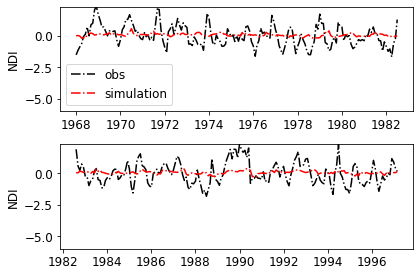

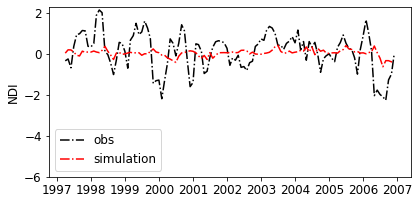

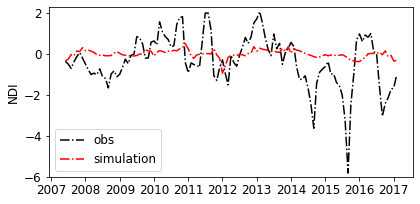

0.6889259461908199
0.7330748557136592
0.9470790386996327
   name_model       mae      rmse           mape        NSE        CC
0    training  0.581952  0.843204       1.158286 -44.716903  0.177622
1  validation  0.594231  0.905218  871183.036096 -26.622860  0.186373
2     testing  0.802553  1.237822       1.001683 -40.160069  0.036672
    NAME       CC1      MAE1       CC2      MAE1       CC3      MAE3
0   T3M1  0.717645   0.41076  0.710556  0.417206  0.730364   0.48465
1   T3M2  0.427031  0.539718  0.478832  0.567139  0.498578  0.664425
2   T3M3  0.177622  0.581952  0.186373  0.594231  0.036672  0.802553
3    NaN       NaN       NaN       NaN       NaN       NaN       NaN
4    NaN       NaN       NaN       NaN       NaN       NaN       NaN
5    NaN       NaN       NaN       NaN       NaN       NaN       NaN
6    NaN       NaN       NaN       NaN       NaN       NaN       NaN
7    NaN       NaN       NaN       NaN       NaN       NaN       NaN
8    NaN       NaN       NaN       NaN    

DatetimeIndex(['1997-07-01', '1997-08-01', '1997-09-01', '1997-10-01',
               '1997-11-01', '1997-12-01', '1998-01-01', '1998-02-01',
               '1998-03-01', '1998-04-01',
               ...
               '2006-03-01', '2006-04-01', '2006-05-01', '2006-06-01',
               '2006-07-01', '2006-08-01', '2006-09-01', '2006-10-01',
               '2006-11-01', '2006-12-01'],
              dtype='datetime64[ns]', length=114, freq='MS')

In [ ]:
#@title  { form-width: "100px" }
#@title  { run: "auto", vertical-output: true }
#@title  { vertical-output: true }
#@title
# -*- coding: utf-8 -*-
"""T3M3_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1uRpn_zCLHmdvhWNMw_Z4HQrC8qmhsCZQ
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T3M1'+'/'+'save_model',
      'T3M1'+'/'+'save_pickles',
      'T3M1'+'/'+'tables',
      'T3M1'+'/'+'figs',
      'T3M1'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)

"""# Import Libraries

# Load tensorboard
"""

# Commented out IPython magic to ensure Python compatibility.
# Run functions
# %run customize_functions.ipynb

# Commented out IPython magic to ensure Python compatibility.
# %tensorflow_version 2.x
# %load_ext tensorboard

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

"""# Define  station,lag time, lead time"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T3M1','T3M2','T3M3']
k=29
n_in0=3
n_out0=3
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12+2,:] # cong them 2 thang 2017.02
# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)

# =============================================================================
# =============================================================================
#     remove values PRS  at fure prediction
# var3(t),var2(t),var1(t) have to remove
list_drops=[np.arange(2,5)*-1,np.arange(2,9)*-1,np.arange(2,13)*-1]
list_drops1=[[],[],[]]
list_drops1a=[[-5,-9,-13],[-5,-9,-13,-17],[-5,-9,-13,-17,-21]]


# =============================================================================
df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
df4a=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)
# Tu T4 chuyen sang T3, bo PRS tai thoi diem du bao
list_drops1b=[[-2,-3,-4],[-2,-3,-4,-5,-6,-7],[-2,-3,-4,-5,-6,-7,-8,-9,-10]]
df4=df4a.drop(df4a.columns[[list_drops1b[n_out0-1]]],axis=1)
# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# # Tao cac call back khac nhau 
# ###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.045 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

# ###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
callbacks_threshole_val,
#  # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

# ###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
# ######################################################################
# #

"""# TRAINING MODEL"""

# set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

# Fit model can bo sung them batchsize

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=3,
# initial_epoch=10,
# )
# # Save loss training
# # save loss training 
# with open(outs[4]+'/'+'trainHistoryDictT3M3.pkl', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)






# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras")
print("Loaded model from disk")


"""# Draw graphics"""
with open(outs[4]+'/'+'trainHistoryDictT3M3.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)
# # =============================================================================
# # DANH GIA
# # =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
# ###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=2
df_all_hinh['NAME'][i]='T3M3'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3
#------------------------------------------------------------

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M3'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])
ts_T3M3=pred3[:,lead_time] # tim thang 9 thap nhat lech mot thang voi M3

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
from sklearn.metrics import mean_absolute_error
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
#
df_all.iloc[2,0]='T3M3'
df_all.iloc[2,1]=df_error.iloc[0,5]
df_all.iloc[2,2]=df_error.iloc[0,1]
df_all.iloc[2,3]=df_error.iloc[1,5]
df_all.iloc[2,4]=df_error.iloc[1,1]
df_all.iloc[2,5]=df_error.iloc[2,5]
df_all.iloc[2,6]=df_error.iloc[2,1]
print(df_all)

print(obs1.shape[0])

train_date=vector_date[0:int(df_train.shape[0] )-3]
train_date

test_date=vector_date[-int(df_test.shape[0] ):]
print(obs2.shape[0])
test_date

val_date=vector_date[df_train.shape[0]+3:df_train.shape[0]+df_val.shape[0]]

print(obs3.shape[0])
val_date

#T4M0

In [ ]:
# -*- coding: utf-8 -*-
"""T4M0_correct.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1RI4LDNVj5Ah8WUsHEkHp-z7PM3vTeWw-
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

# import os
# os.chdir('/content/drive/MyDrive/hybrid_final')
# # tai thu muc luu thong minh de sau nay doc duoc du lieu cua 59 tram
# name_models=['T3','T4cor','T5','GS5']
phases=['train','validation','testing']
n_model=1 # phan ticch mo hinh T3
k=29 # danh gia  tram 29
n_in0=2 # buoc thoi gian input la 3
n_out0=1 #lead time
# m=n_out0 
# chay truong hop dat biet 
m=0


import os
from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T4M0'+'/'+'save_model',
      'T4M0'+'/'+'save_pickles',
      'T4M0'+'/'+'tables',
      'T4M0'+'/'+'figs',
      'T4M0'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)


"""# Import Libraries"""

###  SET FONTS FOR PLOTTING
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
### cap nhat font
# plt.rcParams.update({'font.size': 14})

####RANDOM SEED SET
#tf.random.set_seed(10000000)
#np.random.seed(10000000)

####PANDAS LIB
from pandas import DataFrame
from pandas import concat
###### Univrate LSTM
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
######## Keras tunner
# import keras_tuner as kt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
def series_to_supervised_df(data, n_in, n_out, dropnan=True): # dung cho pandas
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1): # 
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i)) 
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

"""# Load data and initial paramaters"""
# os.chdir('/content/drive/MyDrive/hybrid_final')
# Ten mo hinh

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

"""# Define station, lag, lead times"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
# names=['T4M1','T4M2','T4M3']
# k=29
# n_in0=2
# n_out0=0
# m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12,:]
# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)
df2
df2.columns
list_drop=df2.columns[[3,7]]
df4=df2.drop(columns=list_drop,axis=1).copy()
df4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t),var4(t)
1968-03,77.6,28.5800,558.040000,44.6,28.9400,563.610000,94.0,34.9600,564.760000,-0.07
1968-04,44.6,28.9400,563.610000,94.0,34.9600,564.760000,95.3,53.7600,567.980000,-0.33
1968-05,94.0,34.9600,564.760000,95.3,53.7600,567.980000,115.7,53.8300,562.590000,-0.79
1968-06,95.3,53.7600,567.980000,115.7,53.8300,562.590000,57.7,40.8800,543.670000,-1.52
1968-07,115.7,53.8300,562.590000,57.7,40.8800,543.670000,391.1,185.9500,540.840000,-1.16
...,...,...,...,...,...,...,...,...,...,...
2016-08,279.1,133.9818,565.334367,533.6,258.5877,571.356367,387.7,190.9497,557.460467,-1.59
2016-09,533.6,258.5877,571.356367,387.7,190.9497,557.460467,371.7,187.8237,548.117567,-3.05
2016-10,387.7,190.9497,557.460467,371.7,187.8237,548.117567,68.6,33.9608,523.078567,-2.43
2016-11,371.7,187.8237,548.117567,68.6,33.9608,523.078567,45.9,20.1876,510.268800,-2.15


xoa ba cai cu no di
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
[344] [0.00688219]


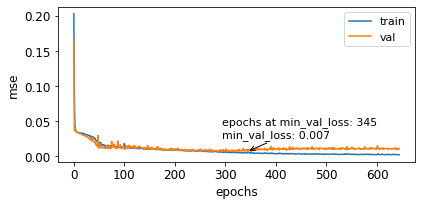

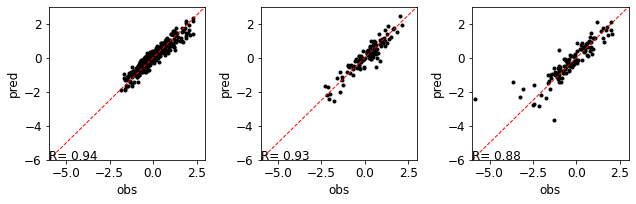

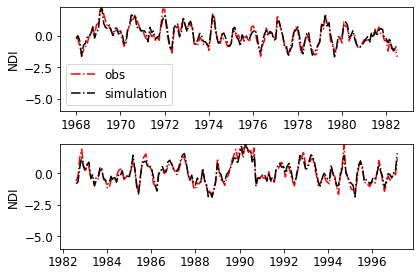

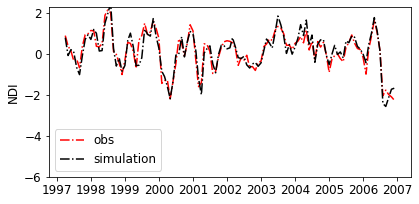

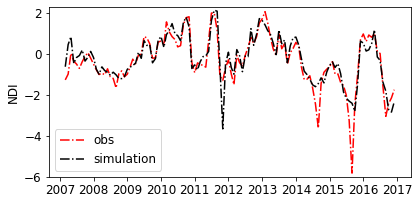

0.23718667061886672
0.277417430537315
0.3833299459390722
   name_model       mae      rmse          mape       NSE        CC
0    training  0.205997  0.290313  9.641822e-01  0.863869  0.940800
1  validation  0.231848  0.348766  1.060529e+06  0.856529  0.923496
2     testing  0.287070  0.590020  1.076225e+00  0.716274  0.877605
    NAME       CC1      MAE1       CC2      MAE1       CC3      MAE3
0   T3M1  0.717645   0.41076  0.710556  0.417206  0.730364   0.48465
1   T3M2  0.427031  0.539718  0.478832  0.567139  0.498578  0.664425
2   T3M3  0.177622  0.581952  0.186373  0.594231  0.036672  0.802553
3   T4M0    0.9408  0.205997  0.923496  0.231848  0.877605   0.28707
4    NaN       NaN       NaN       NaN       NaN       NaN       NaN
5    NaN       NaN       NaN       NaN       NaN       NaN       NaN
6    NaN       NaN       NaN       NaN       NaN       NaN       NaN
7    NaN       NaN       NaN       NaN       NaN       NaN       NaN
8    NaN       NaN       NaN       NaN       NaN  

In [ ]:


"""## Bo het cac gia tri NDI, tuc la var 4 trong mo hinh tru gia tri cuoi"""



# # =============================================================================
# # =============================================================================
# #     remove values PRS  at fure prediction
# # var3(t),var2(t),var1(t) have to remove
# list_drops=[np.arange(2,5)*-1,np.arange(2,9)*-1,np.arange(2,13)*-1]
# list_drops1=[[],[],[]]
# list_drops1a=[[-5,-9,-13],[-5,-9,-13,-17],[-5,-9,-13,-17,-21]]


# # =============================================================================
# df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
# df4=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)

# # =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

# dinh nghia lai loss function, cai nay optimize kem
# xoa cac mo hinh tam thoi 
if 'model' in locals():
  print('xoa ba cai cu no di')
  del model
# myVar exists.

    # if 'myVar' in globals():
    # # myVar exists.
    
tf.keras.backend.clear_session() # xoa cac lop tam thoi de tranh cong don
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
# # TH1 : xem 12 gia tri la buoc thoi gian
# model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# TH2 : xem 12 gia tri la dac tinh
model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
model.compile(optimizer=opt, loss='mse')
model.summary()

###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1='T4M0'+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
# conditional call back
value00=0.0045 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
#  # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=300,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+str(k)+"lead"+str(m)+"best_stopT4M0.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
# tensorboard_callback1, # CO SU KHAC BIET O DAY
]
######################################################################

"""# TRAINING MODELS"""

# set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

# Fit model can bo sung them batchsize

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None, # KHAC O DAY
# # steps_per_epoch=12, # KHAC O DAY 
# # initial_epoch=10,
# )

# # # # Save loss training
# # # save loss training 
# with open(outs[4]+'/'+'trainHistoryDictT4M0.pkl', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)



"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+str(k)+"lead"+str(m)+"best_stopT4M0.keras",) # cong them buoc thoi gian")
# print("Loaded model from disk")


with open(outs[4]+'/'+'trainHistoryDictT4M0.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+'T4M0'+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period

y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs


##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=3
df_all_hinh['NAME'][i]='T4M0'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3
#============================================================================
# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T4M0'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+'T4M0'+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+'T4M0'+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-6.0
    max_values=3.0

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],
           obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'r-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],
           pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'k-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'T4M0'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'r-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'k-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'Val_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

#   # TEST*************************************************************************
  
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   vector_date_test=vector_date[-24:]
#   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
#   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
#     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1month' +' lead time prediction at testing')
#   plt.tight_layout() 

#   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# =============================================================================

# TEST*************************************************************************
  # Chi plot 2015-2016
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  # vector_date_test=vector_date[-24:]
  n_test_plot=n_test
  vector_date_test=vector_date[-n_test_plot:]
  plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'r-.')
  plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'k-.')
    # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1month' +' lead time prediction at testing')
  plt.tight_layout() 

  plt.savefig(outs[3]+'/'+str(k)+'test_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================

"""# Save result to CSV"""

# compressed_file = bz2.BZ2File(f, 'w')
m=0

# 0: train, #1: val, # 2:test
# list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# ## enable to see data franame
# %load_ext google.colab.data_table
# df_test

# ## diable to see dataframe
# %unload_ext google.colab.data_table

# %tensorboard --logdir logs/T4-M1-TB-2021/

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=13042, height=1000)

# Tinh MAE
from sklearn.metrics import mean_absolute_error
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

# # nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+'T4M0'+names_models[i]+'.csv')

##################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_all.iloc[3,0]='T4M0'
df_all.iloc[3,1]=df_error.iloc[0,5]
df_all.iloc[3,2]=df_error.iloc[0,1]
df_all.iloc[3,3]=df_error.iloc[1,5]
df_all.iloc[3,4]=df_error.iloc[1,1]
df_all.iloc[3,5]=df_error.iloc[2,5]
df_all.iloc[3,6]=df_error.iloc[2,1]
print(df_all)
# df_error.to_csv(outs[2]+'/'+'T4M0'+'.csv')

# =============================================================================
# THONG KE SAI SO
# =============================================================================
# df_ts=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()},index=range(pred3.shape[0]))
df_stat=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(59))
df_stat0=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(1))
for p in range(3):
  df_ts=load_list_con[p]

  df_ts.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'TS'+phases[p]+'.csv')
  CC,dotincay=pearsonr(df_ts.obs,df_ts.pred)
  MAE=metrics.mean_absolute_error(df_ts.obs,df_ts.pred)
  df_stat.iloc[k,2*p]=CC
  df_stat.iloc[k,2*p+1]=MAE
  df_stat0.iloc[0,2*p]=CC
  df_stat0.iloc[0,2*p+1]=MAE

  df_stat.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+'.csv')
  df_stat0.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+str(k)+'.csv')
  df_stat.agg(['count','mean','std', 'min', 'max']).to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'des'+'.csv')
print(df_stat0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var1(t-1)', 'var2(t-1)',
       'var3(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)'],
      dtype='object')
-1.75
xoa ba cai cu no di
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch

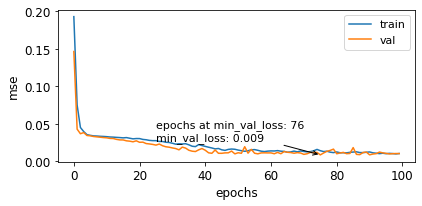

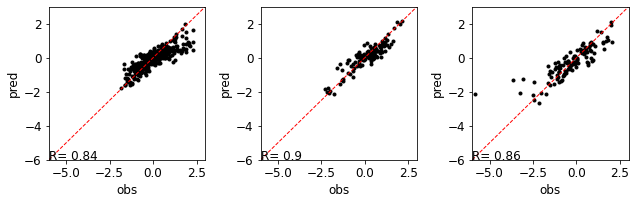

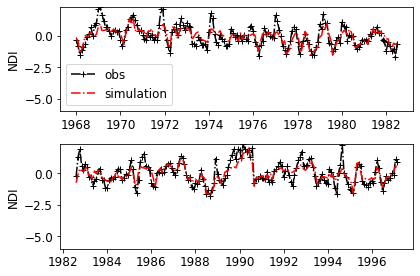

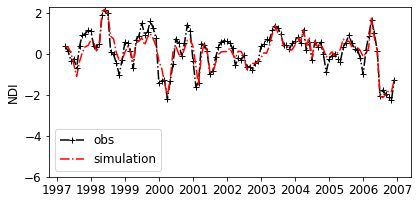

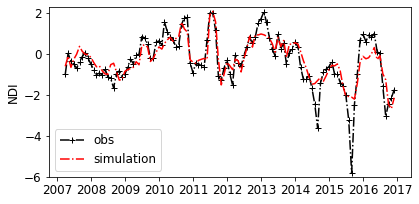

0.3646788633237805
0.30286521489079243
0.4349439003039151
        CC1      MAE1       CC2      MAE2       CC3      MAE3
0  0.837138  0.364679  0.904495  0.302865  0.863301  0.434944


In [ ]:
# -*- coding: utf-8 -*-
"""T4M0_correct.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1RI4LDNVj5Ah8WUsHEkHp-z7PM3vTeWw-
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

# import os
# os.chdir('/content/drive/MyDrive/hybrid_final')
# # tai thu muc luu thong minh de sau nay doc duoc du lieu cua 59 tram
# name_models=['T3','T4cor','T5','GS5']
phases=['train','validation','testing']
n_model=1 # phan ticch mo hinh T3
k=29 # danh gia  tram 29
n_in0=3 # buoc thoi gian input la 3
n_out0=1 #lead time
# m=n_out0 
# chay truong hop dat biet 
m=0


import os
from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T4M0'+'/'+'save_model',
      'T4M0'+'/'+'save_pickles',
      'T4M0'+'/'+'tables',
      'T4M0'+'/'+'figs',
      'T4M0'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)




"""# Load data and initial paramaters"""
# os.chdir('/content/drive/MyDrive/hybrid_final')
# Ten mo hinh

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

"""# Define station, lag, lead times"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
# names=['T4M1','T4M2','T4M3']
# k=29
# n_in0=3
# n_out0=1
# m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12,:]
# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)
df2

"""## Bo het cac gia tri NDI, tuc la var 4 trong mo hinh tru gia tri cuoi"""

df2.columns
list_var4=df2.columns[3:df2.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, sau do bo gia tri cuoi lay nguoc ve phia truoc
list_var4 # list drop var 4

# list drop cho var1, var2, var3
df2.columns
list_var123=df2.columns[0:3]
list_var123

# Bo di cac gia tri cua NDI tai thoi diem t-1 ve truoc
df3=df2.drop(columns=list_var4.values)
df3.columns

# Bo di cac gia tri cua var1, var2, var3 tai thoi diem t-3
df4=df3.drop(columns=list_var123.values)
print(df4.columns)
# gia du bao cuoi cung phai la -1.75
print(df4.iloc[-1,-1])

# # =============================================================================
# # =============================================================================
# #     remove values PRS  at fure prediction
# # var3(t),var2(t),var1(t) have to remove
# list_drops=[np.arange(2,5)*-1,np.arange(2,9)*-1,np.arange(2,13)*-1]
# list_drops1=[[],[],[]]
# list_drops1a=[[-5,-9,-13],[-5,-9,-13,-17],[-5,-9,-13,-17,-21]]


# # =============================================================================
# df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
# df4=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)

# # =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

# dinh nghia lai loss function, cai nay optimize kem
# xoa cac mo hinh tam thoi 
if 'model' in locals():
  print('xoa ba cai cu no di')
  del model
# myVar exists.

    # if 'myVar' in globals():
    # # myVar exists.
    
tf.keras.backend.clear_session() # xoa cac lop tam thoi de tranh cong don
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
# # TH1 : xem 12 gia tri la buoc thoi gian
# model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# TH2 : xem 12 gia tri la dac tinh
model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
model.compile(optimizer=opt, loss='mse')
model.summary()

###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1='T4M0'+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
# conditional call back
value00=0.0045 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
#  # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=300,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
# tensorboard_callback1, # CO SU KHAC BIET O DAY
]
######################################################################

"""# TRAINING MODELS"""

# set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

# Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=100,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None, # KHAC O DAY
# steps_per_epoch=12, # KHAC O DAY 
# initial_epoch=10,
)

# # Save loss training
# save loss training 
with open(outs[4]+'/'+'trainHistoryDict.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)



"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+str(k)+"lead"+str(m)+"best_stop.keras",) # cong them buoc thoi gian")
# print("Loaded model from disk")


with open(outs[4]+'/'+'trainHistoryDict.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+'T4M0'+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period

y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
# =============================================================================
with open(outs[1]+'/'+'T4M0'+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+'T4M0'+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-6.0
    max_values=3.0

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k+-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k+-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'T4M0'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k+-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'Val_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

#   # TEST*************************************************************************
  
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   vector_date_test=vector_date[-24:]
#   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
#   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
#     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1month' +' lead time prediction at testing')
#   plt.tight_layout() 

#   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# =============================================================================

# TEST*************************************************************************
  # Chi plot 2015-2016
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  # vector_date_test=vector_date[-24:]
  n_test_plot=n_test
  vector_date_test=vector_date[-n_test_plot:]
  plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'k+-.')
  plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'r-.')
    # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1month' +' lead time prediction at testing')
  plt.tight_layout() 

  plt.savefig(outs[3]+'/'+str(k)+'test_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================

"""# Save result to CSV"""

# compressed_file = bz2.BZ2File(f, 'w')
m=0

# 0: train, #1: val, # 2:test
# list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# ## enable to see data franame
# %load_ext google.colab.data_table
# df_test

# ## diable to see dataframe
# %unload_ext google.colab.data_table

# %tensorboard --logdir logs/T4-M1-TB-2021/

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=13042, height=1000)

# Tinh MAE
from sklearn.metrics import mean_absolute_error
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

# # nhap thu vien tinh sai so
# from sklearn import metrics
# from scipy.stats import pearsonr
# def nse(predictions, targets):
#     return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
# name_model=[]
# mae=[]
# rmse=[]
# mape=[]
# NSE=[]
# # R2=[]
# CC=[]
# names_models=['training','validation','testing']
# for i in range(3):
#   # phases.append(phase_cho[i])
#   name_model.append(names_models[i])
#   CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
#   rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
#   mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
#   # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
#   list_con[i].to_csv(outs[2]+'/'+'T4M0'+names_models[i]+'.csv')

# ###################
# df_error=pd.DataFrame({'name_model':name_model,
# 'mae':mae,
# 'rmse':rmse,
# 'mape':mape,
# 'NSE':NSE,
# # 'R2':R2,
# 'CC':CC,
# })
# print(df_error)
# df_error.to_csv(outs[2]+'/'+'T4M0'+'.csv')

# =============================================================================
# THONG KE SAI SO
# =============================================================================
# df_ts=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()},index=range(pred3.shape[0]))
df_stat=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(59))
df_stat0=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(1))
for p in range(3):
  df_ts=load_list_con[p]

  df_ts.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'TS'+phases[p]+'.csv')
  CC,dotincay=pearsonr(df_ts.obs,df_ts.pred)
  MAE=metrics.mean_absolute_error(df_ts.obs,df_ts.pred)
  df_stat.iloc[k,2*p]=CC
  df_stat.iloc[k,2*p+1]=MAE
  df_stat0.iloc[0,2*p]=CC
  df_stat0.iloc[0,2*p+1]=MAE

  df_stat.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+'.csv')
  df_stat0.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+str(k)+'.csv')
  df_stat.agg(['count','mean','std', 'min', 'max']).to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'des'+'.csv')
print(df_stat0)

# T4M01

* Về bản chất T4M1 không khác gì với T4M0
* Thay gì tăng thời gian dự báo lên, mình tang lag time lên vẫn giữ n_in0=1 thì điều gì xảy ra

In [ ]:
# # -*- coding: utf-8 -*-
# """T4M0_correct.ipynb

# Automatically generated by Colaboratory.

# Original file is located at
#     https://colab.research.google.com/drive/1RI4LDNVj5Ah8WUsHEkHp-z7PM3vTeWw-
# """

# from google.colab import drive
# drive.mount('/content/drive')

# """Set Output folder"""

# # import os
# # os.chdir('/content/drive/MyDrive/hybrid_final')
# # # tai thu muc luu thong minh de sau nay doc duoc du lieu cua 59 tram
# # name_models=['T3','T4cor','T5','GS5']
# phases=['train','validation','testing']
# n_model=1 # phan ticch mo hinh T3
# k=29 # danh gia  tram 29
# # n_in0=4 # buoc thoi gian input la 3
# # n_out0=1 #lead time
# # m=n_out0 
# # chay truong hop dat biet 
# m=0


# import os
# from google.colab import drive
# drive.mount('/content/drive')

# """Set Output folder"""

# import os
# os.chdir('/content/drive/MyDrive/AAA_hybrid')
# outs=['T4M0'+'/'+'save_model',
#       'T4M0'+'/'+'save_pickles',
#       'T4M0'+'/'+'tables',
#       'T4M0'+'/'+'figs',
#       'T4M0'+'/'+'loss']
# for out in outs:
#   if not os.path.exists(out):
#     os.makedirs(out)


# """# Import Libraries"""

# # Commented out IPython magic to ensure Python compatibility.
# # Run functions
# # %run customize_functions.ipynb
# # For tensorboard
# from tensorflow.keras.callbacks import TensorBoard
# import time
# from sklearn import metrics

# """# Tensorboard"""

# # Commented out IPython magic to ensure Python compatibility.
# # %tensorflow_version 2.x
# # %load_ext tensorboard

# import tensorflow as tf
# import datetime
# # from lstm_utils import *
# import pickle
# from sklearn.preprocessing import MinMaxScaler
# ####LIBRARY
# import scipy
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
# import keras
# from tensorflow.keras import Sequential

# from tensorflow.keras import optimizers
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow import keras # tai sao import tu tensorflow
# from tensorflow.keras.models import load_model
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint
# from tensorflow.keras.optimizers import Adam
# from scipy.stats import pearsonr
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import csv
# ####################################################
# import datetime
# import matplotlib.ticker as ticker
# import matplotlib.dates as mdates
# import datetime
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# import datetime

# # import statsmodels as sm
# import seaborn as sns
# from scipy.stats import pearsonr
# import matplotlib
# ###  SET FONTS FOR PLOTTING
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 12}

# matplotlib.rc('font', **font)
# ### cap nhat font
# # plt.rcParams.update({'font.size': 14})

# ####RANDOM SEED SET
# #tf.random.set_seed(10000000)
# #np.random.seed(10000000)

# ####PANDAS LIB
# from pandas import DataFrame
# from pandas import concat
# ###### Univrate LSTM
# # univariate lstm example
# from numpy import array
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Bidirectional
# from keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# ######## Keras tunner
# # import keras_tuner as kt

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# def series_to_supervised_df(data, n_in, n_out, dropnan=True): # dung cho pandas
# 	"""
# 	Frame a time series as a supervised learning dataset.
# 	Arguments:
# 		data: Sequence of observations as a list or NumPy array.
# 		n_in: Number of lag observations as input (X).
# 		n_out: Number of observations as output (y).
# 		dropnan: Boolean whether or not to drop rows with NaN values.
# 	Returns:
# 		Pandas DataFrame of series framed for supervised learning.
# 	"""
# 	n_vars = 1 if type(data) is list else data.shape[1]
# 	df = pd.DataFrame(data)
# 	cols, names = list(), list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1): # 
# 		cols.append(df.shift(i))
# 		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i)) 
# 		if i == 0:
# 			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
# 		else:
# 			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# 	# put it all together
# 	agg = pd.concat(cols, axis=1)
# 	agg.columns = names
# 	# drop rows with NaN values
# 	if dropnan:
# 		agg.dropna(inplace=True)
# 	return agg

# """# Load data and initial paramaters"""
# # os.chdir('/content/drive/MyDrive/hybrid_final')
# # Ten mo hinh

# # Load du lieu
# # load data obs
# with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59 = pickle.load(f1)

# """# Define station, lag, lead times"""

# ###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# # kiem tra cho ganghwa
# # names=['T4M1','T4M2','T4M3']
# k=29
# n_in0=3
# n_out0=1
# # m=n_out0 # tinh cho buoc 0
# df0=PRS3_NDI3_59[k] # 1968-2020
# # chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# df1=df0.iloc[:(2016-1968+1)*12,:]
# # df1=df0 # du bao het
# # =============================================================================

# # =============================================================================

# df2=series_to_supervised_df(df1,n_in0,n_out0)
# df2

# """## Bo het cac gia tri NDI, tuc la var 4 trong mo hinh tru gia tri cuoi"""

# df2.columns
# list_var4=df2.columns[3:df2.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, sau do bo gia tri cuoi lay nguoc ve phia truoc
# list_var4 # list drop var 4

# # list drop cho var1, var2, var3
# df2.columns
# list_var123=df2.columns[0:3]
# list_var123

# # Bo di cac gia tri cua NDI tai thoi diem t-1 ve truoc
# df3=df2.drop(columns=list_var4.values)
# df3.columns

# # Bo di cac gia tri cua var1, var2, var3 tai thoi diem t-3
# df4=df3.drop(columns=list_var123.values)
# print(df4.columns)
# # gia du bao cuoi cung phai la -1.75
# print(df4.iloc[-1,-1])

# # # =============================================================================
# # # =============================================================================
# # #     remove values PRS  at fure prediction
# # # var3(t),var2(t),var1(t) have to remove
# # list_drops=[np.arange(2,5)*-1,np.arange(2,9)*-1,np.arange(2,13)*-1]
# # list_drops1=[[],[],[]]
# # list_drops1a=[[-5,-9,-13],[-5,-9,-13,-17],[-5,-9,-13,-17,-21]]


# # # =============================================================================
# # df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
# # df4=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)

# # # =============================================================================
# # Chia du lieu theo ti le 6:3:3
# n_train=int(df4.shape[0]*0.6)
# n_val=int(df4.shape[0]*0.8)-n_train
# n_test=df4.shape[0]-n_val-n_train

# train_df=df4.iloc[0:n_train,:]
# val_df=df4.iloc[n_train:n_train+n_val,:]
# test_df=df4.iloc[n_train+n_val:,:]
# # print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# # lay chinh no du bao no luon
# # x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# y_train=y_train0.reshape(y_train0.shape[0],1)
# # print(x_train.shape,y_train.shape)

# x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# # x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
# y_val=y_val0.reshape(y_val0.shape[0],1)
# # print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# # x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# y_test=y_test0.reshape(y_test0.shape[0],1)
# # print(x_test.shape,y_test.shape)

# # =============================================================================


# # =============================================================================
# # Scale data
# # tao 2 scaler rieng cho X, Y de invert cho de
# scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
# scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

# x_train_scale = scaler_x.fit_transform(x_train)
# y_train_scale = scaler_y.fit_transform(y_train)

# # fit scale cua train cho val va test
# x_val_scale=scaler_x.transform(x_val)
# y_val_scale=scaler_y.transform(y_val)

# x_test_scale=scaler_x.transform(x_test)
# y_test_scale=scaler_y.transform(y_test)
# # Can xem lai 12 gia tri nay la buoc thoi gian 
# # hay 12 gia tri duoc xem nhu feature
# # # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # # TH2: xem no nhu 12 dac tinh
# # n_step=1
# # train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# # val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# # test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# # print(train_X.shape)

# """# Define model and setup training, save models

# """

# # dinh nghia lai loss function, cai nay optimize kem
# # xoa cac mo hinh tam thoi 
# if 'model' in locals():
#   print('xoa ba cai cu no di')
#   del model
# # myVar exists.

#     # if 'myVar' in globals():
#     # # myVar exists.
    
# tf.keras.backend.clear_session() # xoa cac lop tam thoi de tranh cong don
# mape = tf.keras.losses.MeanAbsolutePercentageError()
# # =============================================================================

# # =============================================================================
# # =============================================================================
# # Define model
# model = Sequential()
# # # TH1 : xem 12 gia tri la buoc thoi gian
# # model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# # TH2 : xem 12 gia tri la dac tinh
# model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
# # opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
# model.compile(optimizer=opt, loss='mse')
# model.summary()

# ###############################################################################
# # NAME="T4-M1-TB-{}".format(int(time.time()))
# NAME1='T4M0'+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# # tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# # path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# # tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
# tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
#                                                      histogram_freq=1) # ket hop 
# # conditional call back
# value00=0.0045 # cho validation
# from keras.callbacks import Callback
# class EarlyStoppingByLossVal(Callback):
#     def __init__(self, monitor='val_loss', value=value00, verbose=0):
#         super(Callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is None:
#             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

#         if current < self.value:
#             if self.verbose > 0:
#                 print("Epoch %05d: early stopping THR" % epoch)
#             self.model.stop_training = True

# callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

# ###############
# # condtion for training
# # conditional call back
# value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
# from keras.callbacks import Callback
# class EarlyStoppingByLoss(Callback):
#     def __init__(self, monitor='loss', value=value0, verbose=0):
#         super(Callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is None:
#             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

#         if current < self.value:
#             if self.verbose > 0:
#                 print("Epoch %05d: early stopping THR" % epoch)
#             self.model.stop_training = True

# callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
# ##### callbacks
# callbacks_list = [
# # callbacks_threshole_val,
# #  # stopping
# keras.callbacks.EarlyStopping(
# monitor="val_loss",
# patience=300,
# mode="min",
# ),

# ###################################################################

# # checkpoint
# keras.callbacks.ModelCheckpoint(
# filepath=outs[0]+"/"+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
# monitor="val_loss",
# save_best_only=True,
# ),
# # tensorboard,
# # tensorboard_callback1, # CO SU KHAC BIET O DAY
# ]
# ######################################################################

# """# TRAINING MODELS"""

# # set seed de ket qua model khong bi thay doi
# # seed=123456789
# # import random
# # # import numpy as np
# # # import tensorflow as tf
# # random.seed(seed)
# # np.random.seed(seed)
# # tf.random.set_seed(seed)

# # Fit model can bo sung them batchsize

# # history=model.fit(train_X,
# #           y_train_scale,
# # epochs=100,
# # callbacks=callbacks_list,
# # validation_data=(val_X,y_val_scale),
# # batch_size=36,sample_weight=None, # KHAC O DAY
# # # steps_per_epoch=12, # KHAC O DAY 
# # # initial_epoch=10,
# # )

# # # # Save loss training
# # # save loss training 
# # with open(outs[4]+'/'+'trainHistoryDict.pkl', 'wb') as file_pi:
# #         pickle.dump(history.history, file_pi)



# """# Load results"""

# # LOAD KET QUA TOT NHAT
# # =============================================================================
# # Load results
# loaded_model=load_model(outs[0]+"/"+str(k)+"lead"+str(m)+"best_stop.keras",) # cong them buoc thoi gian")
# # print("Loaded model from disk")


# with open(outs[4]+'/'+'trainHistoryDict.pkl',  'rb') as f3:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     history = pickle.load(f3)

# """# Draw graphics"""

# # =============================================================================
# # DANH GIA
# # =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
# fig,ax=plt.subplots(figsize=(6,3))
# plt.rcParams.update({'font.size': 11})
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# # Draw the minimum epochs 
# df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# # print(df_val_loss)
# idxmin=df_val_loss[['val_loss']].idxmin().values
# val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
# print(idxmin,val_loss_min_values)
# plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
#              xy=(idxmin,val_loss_min_values), xycoords='data',
#             xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3"),
#             )

# plt.legend(['train','val'])
# plt.xlabel('epochs')
# plt.ylabel('mse')
# # plt.title('learning rate of 1 month leadtime prdiction')
# plt.tight_layout()
# plt.savefig(outs[3]+'/'+'T4M0'+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
# plt.show(fig)
# plt.close(fig)
# ###################################################################################
# #----------------------Important !!!!-----------------------#
# pred = loaded_model.predict(train_X)  #(predicted)  
# obs  = y_train_scale               #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period

# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred train, obs train
# pred1=pred
# obs1=obs

# ##########################################################
# # Validation
# pred = loaded_model.predict(val_X)  #(pred)  
# obs  = y_val_scale                 #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred2=pred
# obs2=obs

# ################################################################
# pred = loaded_model.predict(test_X)  #(pred)  
# obs  = y_test_scale                 #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred3=pred
# obs3=obs
# #--------------------------------------------------------------------#

# # TOM LAI
# list_con=list()
# df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
# list_con.append(df_train)
# df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
# list_con.append(df_val)
# df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
# list_con.append(df_test)
# # =============================================================================
# # SAVE RESULTS
# # =============================================================================
# with open(outs[1]+'/'+'T4M0'+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
#   # compressed_file = bz2.BZ2File(f, 'w')
#   pickle.dump(list_con, f)

# #####
# ## mo kiem tra lai
# with open(outs[1]+'/'+'T4M0'+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
#     # compressed_file = bz2.BZ2File(f, 'r')
#     load_list_con = pickle.load(f)
# # 0,1,2 tuong ung voi train, val, test
# # pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# # print('cc of val: '+str(pearson))
# # =============================================================================
# # VE HINH
# # =============================================================================
# # HINH  SCATTER
# # Ve hinh statter plot cua training, validation and testing

# # scale plot M1


# axes=[131,132,133]
# obs_all=[obs1,obs2,obs3]
# pred_all=[pred1,pred2,pred3]
# # lead_time=0
# names_phases=['training','validation','testing']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(9,3))
#   plt.rcParams.update({'font.size': 12})
# # lead_time=2
#   for phase in range(3):
#   # for lead_time in range(3):

#     plt.subplot(axes[phase])
#     pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
#     r2_vanila_1m =pearson
#     plt.rcParams.update({'font.size': 12})
    
#     min_values=-6.0
#     max_values=3.0

#     plt.xlim(min_values,max_values)
#     plt.ylim(min_values,max_values)

#     plt.scatter(x=load_list_con[phase]['obs'],
#                 y=load_list_con[phase]['pred'],
#                 s=None,
#                 c='k', 
#                 marker='.', 
#                 cmap=None,
#                 norm=None,
#                 vmin=None, 
#                 vmax=None,
#                 alpha=None,            
#                 linewidths=None,
#                 edgecolors=None,plotnonfinite=False,data=None)

#     # ve duong 45
#     # plt.legend(['NDI'])
#     plt.xlabel('obs')
#     if lead_time==0:
#       plt.ylabel('pred')
#     # if lead_time==1:
#     # plt.title('M1S4prs_prs '+names_phases[m])
#     # add_identity(ax, color='r', ls='--')
#     plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
#     xpoints = ypoints = plt.xlim()
#     plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

#     plt.tight_layout()

#   plt.savefig(outs[3]+'/'+str(k)+'scatter_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# # =============================================================================
# #VE HINH TIME SERIES
# # =============================================================================
  
#   # Ve TRAIN ***************************************************************
# # Time series cua train
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,4))
#   plt.subplot(211)
#   plt.ylim([-6.0,2.3])
#   plt.rcParams.update({'font.size': 12})
 
#   vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
#   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')
#   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'k+-.')

#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
#   plt.tight_layout()

#   plt.subplot(212)
#   plt.ylim([-6.0,2.3])
#   plt.rcParams.update({'font.size': 12})
  
#   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'r-.')
#   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'k+-.')
#   plt.ylabel('NDI')
#   plt.tight_layout()

# plt.savefig(outs[3]+'/'+str(k)+'T4M0'+str(m)+'.jpeg',dpi=300)
# plt.show()
# plt.close()
# ############ VAL **************************************************************
# # Time series cua val
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'r-.')
#   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'k+-.')
#   plt.legend(['obs','simulation'])
#   plt.ylabel('NDI')
#   plt.tight_layout()

#   plt.savefig(outs[3]+'/'+str(k)+'Val_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()

# #   # TEST*************************************************************************
  
# # #Graph
# # months=['1month','2months','3months']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(6,3))
# #   plt.subplot(111)
# #   plt.rcParams.update({'font.size': 12})
# #   plt.ylim([-6.0,2.3])
# #   vector_date_test=vector_date[-24:]
# #   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
# #   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
# #     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# #   plt.legend(['obs','simulation'])

# #   plt.ylabel('NDI')
# #   # plt.title('Time series '+'1month' +' lead time prediction at testing')
# #   plt.tight_layout() 

# #   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
# #   plt.show()
# #   plt.close()
# # =============================================================================

# # TEST*************************************************************************
#   # Chi plot 2015-2016
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   # vector_date_test=vector_date[-24:]
#   n_test_plot=n_test
#   vector_date_test=vector_date[-n_test_plot:]
#   plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'r-.')
#   plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'k+-.')
#     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1month' +' lead time prediction at testing')
#   plt.tight_layout() 

#   plt.savefig(outs[3]+'/'+str(k)+'test_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# # =============================================================================

# """# Save result to CSV"""

# # compressed_file = bz2.BZ2File(f, 'w')
# m=0

# # 0: train, #1: val, # 2:test
# # list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# # ## enable to see data franame
# # %load_ext google.colab.data_table
# # df_test

# # ## diable to see dataframe
# # %unload_ext google.colab.data_table

# # %tensorboard --logdir logs/T4-M1-TB-2021/

# # from tensorboard import notebook
# # notebook.list() # View open TensorBoard instances

# # # Control TensorBoard display. If no port is provided, 
# # # the most recently launched TensorBoard is used
# # notebook.display(port=13042, height=1000)

# # Tinh MAE
# from sklearn.metrics import mean_absolute_error
# MAE_train=mean_absolute_error(obs1,pred1)
# print(MAE_train)
# MAE_val=mean_absolute_error(obs2,pred2)
# print(MAE_val)
# MAE_test=mean_absolute_error(obs,pred3)
# print(MAE_test)

# # # nhap thu vien tinh sai so
# # from sklearn import metrics
# # from scipy.stats import pearsonr
# # def nse(predictions, targets):
# #     return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
# # name_model=[]
# # mae=[]
# # rmse=[]
# # mape=[]
# # NSE=[]
# # # R2=[]
# # CC=[]
# # names_models=['training','validation','testing']
# # for i in range(3):
# #   # phases.append(phase_cho[i])
# #   name_model.append(names_models[i])
# #   CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
# #   mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
# #   rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
# #   mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
# #   # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
# #   NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
# #   list_con[i].to_csv(outs[2]+'/'+'T4M0'+names_models[i]+'.csv')

# # ###################
# # df_error=pd.DataFrame({'name_model':name_model,
# # 'mae':mae,
# # 'rmse':rmse,
# # 'mape':mape,
# # 'NSE':NSE,
# # # 'R2':R2,
# # 'CC':CC,
# # })
# # print(df_error)
# # df_error.to_csv(outs[2]+'/'+'T4M0'+'.csv')

# # =============================================================================
# # THONG KE SAI SO
# # =============================================================================
# # df_ts=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()},index=range(pred3.shape[0]))
# df_stat=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(59))
# df_stat0=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(1))
# for p in range(3):
#   df_ts=load_list_con[p]

#   df_ts.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'TS'+phases[p]+'.csv')
#   CC,dotincay=pearsonr(df_ts.obs,df_ts.pred)
#   MAE=metrics.mean_absolute_error(df_ts.obs,df_ts.pred)
#   df_stat.iloc[k,2*p]=CC
#   df_stat.iloc[k,2*p+1]=MAE
#   df_stat0.iloc[0,2*p]=CC
#   df_stat0.iloc[0,2*p+1]=MAE

#   df_stat.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+'.csv')
#   df_stat0.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+str(k)+'.csv')
#   df_stat.agg(['count','mean','std', 'min', 'max']).to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'des'+'.csv')
# print(df_stat0)

# T5M01

In [ ]:
# # -*- coding: utf-8 -*-
# """T4M0_correct.ipynb

# Automatically generated by Colaboratory.

# Original file is located at
#     https://colab.research.google.com/drive/1RI4LDNVj5Ah8WUsHEkHp-z7PM3vTeWw-
# """

# from google.colab import drive
# drive.mount('/content/drive')

# """Set Output folder"""

# # import os
# # os.chdir('/content/drive/MyDrive/hybrid_final')
# # # tai thu muc luu thong minh de sau nay doc duoc du lieu cua 59 tram
# # name_models=['T3','T4cor','T5','GS5']
# phases=['train','validation','testing']
# n_model=1 # phan ticch mo hinh T3
# k=29 # danh gia  tram 29
# n_in0=3 # buoc thoi gian input la 3
# n_out0=1 #lead time
# # m=n_out0 
# # chay truong hop dat biet 
# m=0


# import os
# from google.colab import drive
# drive.mount('/content/drive')

# """Set Output folder"""

# import os
# os.chdir('/content/drive/MyDrive/AAA_hybrid')
# outs=['T5M01'+'/'+'save_model',
#       'T5M01'+'/'+'save_pickles',
#       'T5M01'+'/'+'tables',
#       'T5M01'+'/'+'figs',
#       'T5M01'+'/'+'loss']
# for out in outs:
#   if not os.path.exists(out):
#     os.makedirs(out)


# """# Load data and initial paramaters"""
# # os.chdir('/content/drive/MyDrive/hybrid_final')
# # Ten mo hinh

# # Load du lieu
# # load data obs
# with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59 = pickle.load(f1)

# # load data cim 
# with open('input_pickles'+'/'+'list_PRS_NDIclim_all.pkl', 'rb') as f2:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59clim = pickle.load(f2)

# """# Define station, lag, lead times"""

# ###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# # kiem tra cho ganghwa
# # names=['T4M1','T4M2','T4M3']
# k=29
# n_in0=3
# n_out0=1
# # m=n_out0 # tinh cho buoc 0
# df0=PRS3_NDI3_59[k] # 1968-2020
# # chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# df1=df0.iloc[:(2016-1968+1)*12,:]
# df1a=PRS3_NDI3_59clim[0][29] # gia tri 0 tuong ung lead time =1
# # THAY GIA TRI NDI KHI HAU BANG GIA TRI NDI QUAN TRAC
# df1b=df1a
# df1b.iloc[-24:,-1]=df1.iloc[-24:,-1] # GIO NDI KHI HAU DA THAY BANG OBS

# # df1=df0 # du bao het
# # =============================================================================

# # =============================================================================

# df2=series_to_supervised_df(df1,n_in0,n_out0)
# # df2a=series_to_supervised_df(df1a,n_in0,n_out0)
# df2a=series_to_supervised_df(df1b,n_in0,n_out0) # thay NDI khau bang obs



# """## Bo het cac gia tri NDI, tuc la var 4 trong mo hinh tru gia tri cuoi"""

# df2.columns
# list_var4=df2.columns[3:df2.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, sau do bo gia tri cuoi lay nguoc ve phia truoc
# list_var4a=df2a.columns[3:df2.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, sau do bo gia tri cuoi lay nguoc ve phia truoc
# # list_var4 # list drop var 4

# # list drop cho var1, var2, var3
# # df2.columns
# list_var123=df2.columns[0:3]
# list_var123a=df2a.columns[0:3]
# # list_var123

# # Bo di cac gia tri cua NDI tai thoi diem t-1 ve truoc
# df3=df2.drop(columns=list_var4.values)
# df3a=df2a.drop(columns=list_var4a.values)
# # df3.columns

# # Bo di cac gia tri cua var1, var2, var3 tai thoi diem t-3
# # df4=df3.drop(columns=list_var123.values) # KHONG BO vi cai nay khong phai la M0
# # df4a=df3a.drop(columns=list_var123a.values) # KHONG BO vi cai nay khong phai la M0
# df4=df3
# df4a=df3a
# # gia du bao cuoi cung phai la -1.75
# print(df4.iloc[-1,-1])
# print(df4a.iloc[-1,-1])
# # GIA TRI KIEM TRA CUA KHI TUONG THAY TOAN BO BANG OBS TRU THOI DIEM T DU BAO THOI
# df4b=df4a
# df4b.iloc[:-df4a.shape[0],:-4]=df4.iloc[:-df4a.shape[0],:-4] # NEU DU BAO LEN 2 THANG 
# # tHI -7. BOI VI -1 LA SO CUOI NDI ROI, 3 THANG LEN -10
# # # =============================================================================
# # # =============================================================================
# # #     remove values PRS  at fure prediction
# # # var3(t),var2(t),var1(t) have to remove
# # list_drops=[np.arange(2,5)*-1,np.arange(2,9)*-1,np.arange(2,13)*-1]
# # list_drops1=[[],[],[]]
# # list_drops1a=[[-5,-9,-13],[-5,-9,-13,-17],[-5,-9,-13,-17,-21]]


# # # =============================================================================
# # df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
# # df4=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)

# # # =============================================================================
# # Chia du lieu theo ti le 6:2:2
# n_train=int(df4.shape[0]*0.6)
# n_val=int(df4.shape[0]*0.8)-n_train
# n_test=df4.shape[0]-n_val-n_train

# train_df=df4.iloc[0:n_train,:]
# val_df=df4.iloc[n_train:n_train+n_val,:]
# test_df=df4.iloc[n_train+n_val:,:]
# # DU LIEU KHI HAU
# # test_dfa=df4a
# test_dfa=df4b # thay bang khi hau cap nhat obs
# # print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# # lay chinh no du bao no luon
# # x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# y_train=y_train0.reshape(y_train0.shape[0],1)
# # print(x_train.shape,y_train.shape)

# x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# # x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
# y_val=y_val0.reshape(y_val0.shape[0],1)
# # print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# # x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# # DU LIEU KHI HAU
# x_testa,y_test0a=test_dfa.iloc[:,:-1].values,test_dfa.iloc[:,-1].values 
# # x_testa,y_test0a=test_dfa.iloc[:,:].values,test_dfa.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# y_testa=y_test0a.reshape(y_test0a.shape[0],1)
# # print(x_test.shape,y_test.shape)

# # =============================================================================


# # =============================================================================
# # Scale data
# # tao 2 scaler rieng cho X, Y de invert cho de
# scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
# scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

# x_train_scale = scaler_x.fit_transform(x_train)
# y_train_scale = scaler_y.fit_transform(y_train)

# # fit scale cua train cho val va test
# x_val_scale=scaler_x.transform(x_val)
# y_val_scale=scaler_y.transform(y_val)

# x_test_scale=scaler_x.transform(x_test)
# y_test_scale=scaler_y.transform(y_test)

# # DU LIEU KHI HAU
# x_testa_scale=scaler_x.transform(x_testa)
# y_testa_scale=scaler_y.transform(y_testa)
# # Can xem lai 12 gia tri nay la buoc thoi gian 
# # hay 12 gia tri duoc xem nhu feature
# # # TH1 : Xem no nhu 12 buoc thoi gian
# # n_features=1
# # train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# # val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# # test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))
# # # DU LIEU KHI HAU
# # test_Xa = x_testa_scale.reshape((x_testa_scale.shape[0], x_testa_scale.shape[1], n_features))
# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# test_Xa = x_testa_scale.reshape((x_testa_scale.shape[0], n_step,x_testa_scale.shape[1]))
# print(train_X.shape)


# """# Define model and setup training, save models

# """

# # dinh nghia lai loss function, cai nay optimize kem
# # xoa cac mo hinh tam thoi 
# if 'model' in locals():
#   print('xoa ba cai cu no di')
#   del model
# # myVar exists.

#     # if 'myVar' in globals():
#     # # myVar exists.
    
# tf.keras.backend.clear_session() # xoa cac lop tam thoi de tranh cong don
# mape = tf.keras.losses.MeanAbsolutePercentageError()
# # =============================================================================

# # =============================================================================
# # =============================================================================
# # Define model
# model = Sequential()
# # # # TH1 : xem 12 gia tri la buoc thoi gian
# # model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# # TH2 : xem 12 gia tri la dac tinh
# model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
# # opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
# model.compile(optimizer=opt, loss='mse')
# model.summary()

# ###############################################################################
# # NAME="T4-M1-TB-{}".format(int(time.time()))
# NAME1='T4M0'+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# # tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# # path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# # tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
# tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
#                                                      histogram_freq=1) # ket hop 
# # conditional call back
# value00=0.0045 # cho validation
# from keras.callbacks import Callback
# class EarlyStoppingByLossVal(Callback):
#     def __init__(self, monitor='val_loss', value=value00, verbose=0):
#         super(Callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is None:
#             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

#         if current < self.value:
#             if self.verbose > 0:
#                 print("Epoch %05d: early stopping THR" % epoch)
#             self.model.stop_training = True

# callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

# ###############
# # condtion for training
# # conditional call back
# value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
# from keras.callbacks import Callback
# class EarlyStoppingByLoss(Callback):
#     def __init__(self, monitor='loss', value=value0, verbose=0):
#         super(Callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is None:
#             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

#         if current < self.value:
#             if self.verbose > 0:
#                 print("Epoch %05d: early stopping THR" % epoch)
#             self.model.stop_training = True

# callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
# ##### callbacks
# callbacks_list = [
# # callbacks_threshole_val,
# #  # stopping
# keras.callbacks.EarlyStopping(
# monitor="val_loss",
# patience=100,
# mode="min",
# ),

# ###################################################################

# # checkpoint
# keras.callbacks.ModelCheckpoint(
# filepath=outs[0]+"/"+str(k)+"leadT5M1"+str(m)+"best_stop.keras", # cong them buoc thoi gian
# monitor="val_loss",
# save_best_only=True,
# ),
# # tensorboard,
# # tensorboard_callback1, # CO SU KHAC BIET O DAY
# ]
# ######################################################################

# """# TRAINING MODELS"""

# # set seed de ket qua model khong bi thay doi
# # seed=123456789
# # import random
# # # import numpy as np
# # # import tensorflow as tf
# # random.seed(seed)
# # np.random.seed(seed)
# # tf.random.set_seed(seed)
# # ###==========================================================================
# # # KHONG FIT NUA TRONG MO HÌNH T5 CHỈ CHIA LẠI INPUT
# # # Fit model can bo sung them batchsize

# # history=model.fit(train_X,
# #           y_train_scale,
# # epochs=500,
# # callbacks=callbacks_list,
# # validation_data=(val_X,y_val_scale),
# # batch_size=36,sample_weight=None, # KHAC O DAY
# # # steps_per_epoch=12, # KHAC O DAY 
# # # initial_epoch=10,
# # )

# # # # Save loss training
# # # save loss training 
# # with open(outs[4]+'/'+'trainHistoryDictT5M1.pkl', 'wb') as file_pi:
# #         pickle.dump(history.history, file_pi)

# ## ==========================================================================

# """# Load results"""

# # LOAD KET QUA TOT NHAT
# # =============================================================================
# # Load results
# loaded_model=load_model(outs[0]+"/"+str(k)+"leadT5M1"+str(m)+"best_stop.keras",) # cong them buoc thoi gian")
# # print("Loaded model from disk")


# with open(outs[4]+'/'+'trainHistoryDictT5M1.pkl',  'rb') as f3:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     history = pickle.load(f3)

# """# Draw graphics"""

# # =============================================================================
# # DANH GIA
# # =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
# fig,ax=plt.subplots(figsize=(6,3))
# plt.rcParams.update({'font.size': 11})
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# # Draw the minimum epochs 
# df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# # print(df_val_loss)
# idxmin=df_val_loss[['val_loss']].idxmin().values
# val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
# print(idxmin,val_loss_min_values)
# plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
#              xy=(idxmin,val_loss_min_values), xycoords='data',
#             xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3"),
#             )

# plt.legend(['train','val'])
# plt.xlabel('epochs')
# plt.ylabel('mse')
# # plt.title('learning rate of 1 month leadtime prdiction')
# plt.tight_layout()
# plt.savefig(outs[3]+'/'+'T4M0'+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
# plt.show(fig)
# plt.close(fig)
# ###################################################################################
# #----------------------Important !!!!-----------------------#
# pred = loaded_model.predict(train_X)  #(predicted)  
# obs  = y_train_scale               #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period

# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred train, obs train
# pred1=pred
# obs1=obs

# ##########################################################
# # Validation
# pred = loaded_model.predict(val_X)  #(pred)  
# obs  = y_val_scale                 #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred2=pred
# obs2=obs

# # ################################################################
# # pred = loaded_model.predict(test_X)  #(pred)  
# # obs  = y_test_scale                 #(obs) 
# # #-----------------------------------------------------------#

# # #----------------------reverse scaling------------------------------#
# # #For training period
# # y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# # y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# # #Inverse scaled --> pred, obs  
# # pred = y_hat_rescaled
# # obs = y_rescaled

# # # pred1, obs1: pred val, obs val
# # pred3=pred
# # obs3=obs
# #--------------------------------------------------------------------#

# ################################################################
# # DU LIEU KHI HAU TAI TESTING
# pred = loaded_model.predict(test_Xa)  #(pred)  
# obs  = y_testa_scale                 #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred3=pred
# obs3=obs
# #--------------------------------------------------------------------#

# # TOM LAI
# list_con=list()
# df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
# list_con.append(df_train)
# df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
# list_con.append(df_val)
# df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
# list_con.append(df_test)
# # =============================================================================
# # SAVE RESULTS
# # =============================================================================
# with open(outs[1]+'/'+'T5M1'+str(k)+'lead'+str(m)+'T5_lag3.pkl', 'wb') as f: # khong nen
#   # compressed_file = bz2.BZ2File(f, 'w')
#   pickle.dump(list_con, f)

# #####
# ## mo kiem tra lai
# with open(outs[1]+'/'+'T5M1'+str(k)+'lead'+str(m)+'T5_lag3.pkl', 'rb') as f: # khong nen
#     # compressed_file = bz2.BZ2File(f, 'r')
#     load_list_con = pickle.load(f)
# # 0,1,2 tuong ung voi train, val, test
# # pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# # print('cc of val: '+str(pearson))
# # =============================================================================
# # VE HINH
# # =============================================================================
# # HINH  SCATTER
# # Ve hinh statter plot cua training, validation and testing

# # scale plot M1


# axes=[131,132,133]
# obs_all=[obs1,obs2,obs3]
# pred_all=[pred1,pred2,pred3]
# # lead_time=0
# names_phases=['training','validation','testing']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(9,3))
#   plt.rcParams.update({'font.size': 12})
# # lead_time=2
#   for phase in range(3):
#   # for lead_time in range(3):

#     plt.subplot(axes[phase])
#     pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
#     r2_vanila_1m =pearson
#     plt.rcParams.update({'font.size': 12})
    
#     min_values=-6.0
#     max_values=3.0

#     plt.xlim(min_values,max_values)
#     plt.ylim(min_values,max_values)

#     plt.scatter(x=load_list_con[phase]['obs'],
#                 y=load_list_con[phase]['pred'],
#                 s=None,
#                 c='k', 
#                 marker='.', 
#                 cmap=None,
#                 norm=None,
#                 vmin=None, 
#                 vmax=None,
#                 alpha=None,            
#                 linewidths=None,
#                 edgecolors=None,plotnonfinite=False,data=None)

#     # ve duong 45
#     # plt.legend(['NDI'])
#     plt.xlabel('obs')
#     if lead_time==0:
#       plt.ylabel('pred')
#     # if lead_time==1:
#     # plt.title('M1S4prs_prs '+names_phases[m])
#     # add_identity(ax, color='r', ls='--')
#     plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
#     xpoints = ypoints = plt.xlim()
#     plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

#     plt.tight_layout()

#   plt.savefig(outs[3]+'/'+str(k)+'scatter_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# # =============================================================================
# #VE HINH TIME SERIES
# # =============================================================================
  
#   # Ve TRAIN ***************************************************************
# # Time series cua train
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,4))
#   plt.subplot(211)
#   plt.ylim([-6.0,2.3])
#   plt.rcParams.update({'font.size': 12})
 
#   vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
#   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')
#   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'k+-.')

#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
#   plt.tight_layout()

#   plt.subplot(212)
#   plt.ylim([-6.0,2.3])
#   plt.rcParams.update({'font.size': 12})
  
#   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'r-.')
#   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'k+-.')
#   plt.ylabel('NDI')
#   plt.tight_layout()

# plt.savefig(outs[3]+'/'+str(k)+'T4M0'+str(m)+'.jpeg',dpi=300)
# plt.show()
# plt.close()
# ############ VAL **************************************************************
# # Time series cua val
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'r-.')
#   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'k+-.')
#   plt.legend(['obs','simulation'])
#   plt.ylabel('NDI')
#   plt.tight_layout()

#   plt.savefig(outs[3]+'/'+str(k)+'Val_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()

# #   # TEST*************************************************************************
  
# # #Graph
# # months=['1month','2months','3months']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(6,3))
# #   plt.subplot(111)
# #   plt.rcParams.update({'font.size': 12})
# #   plt.ylim([-6.0,2.3])
# #   vector_date_test=vector_date[-24:]
# #   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
# #   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
# #     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# #   plt.legend(['obs','simulation'])

# #   plt.ylabel('NDI')
# #   # plt.title('Time series '+'1month' +' lead time prediction at testing')
# #   plt.tight_layout() 

# #   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
# #   plt.show()
# #   plt.close()
# # =============================================================================

# # TEST*************************************************************************
#   # Chi plot 2015-2016
# #Graph
# months=['1month','2months','3months']
# # for lead_time in range(1):
# fig,ax=plt.subplots(figsize=(6,3))
# plt.subplot(111)
# plt.rcParams.update({'font.size': 12})
# plt.ylim([-6.0,2.3])
# # vector_date_test=vector_date[-24:]
# # n_test_plot=n_test

# n_test_plot=pred3.shape[0] # Du lieu khi hau
# vector_date_test=vector_date[-n_test_plot:]
# plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'r-.')
# plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'k+-.')
#   # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# plt.legend(['obs','simulation'])
# # chinh hien thi truc X
# import datetime

# from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
# years = YearLocator()   # every year
# months = MonthLocator()  # every month
# yearsFmt = DateFormatter('%Y')
# # yearsFmt = DateFormatter('%Y-%m')
# # yearsFmt = DateFormatter('%Y')
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ##
# plt.ylabel('NDI')
# # plt.title('Time series '+'1month' +' lead time prediction at testing')
# plt.tight_layout() 

# plt.savefig(outs[3]+'/'+str(k)+'test_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
# plt.show()
# plt.close()
# # =============================================================================

# """# Save result to CSV"""

# # compressed_file = bz2.BZ2File(f, 'w')
# m=0

# # 0: train, #1: val, # 2:test
# # list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# # ## enable to see data franame
# # %load_ext google.colab.data_table
# # df_test

# # ## diable to see dataframe
# # %unload_ext google.colab.data_table

# # %tensorboard --logdir logs/T4-M1-TB-2021/

# # from tensorboard import notebook
# # notebook.list() # View open TensorBoard instances

# # # Control TensorBoard display. If no port is provided, 
# # # the most recently launched TensorBoard is used
# # notebook.display(port=13042, height=1000)

# # Tinh MAE
# from sklearn.metrics import mean_absolute_error
# MAE_train=mean_absolute_error(obs1,pred1)
# print(MAE_train)
# MAE_val=mean_absolute_error(obs2,pred2)
# print(MAE_val)
# MAE_test=mean_absolute_error(obs3,pred3)
# print(MAE_test)

# # # nhap thu vien tinh sai so
# # from sklearn import metrics
# # from scipy.stats import pearsonr
# # def nse(predictions, targets):
# #     return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
# name_model=[]
# mae=[]
# rmse=[]
# mape=[]
# NSE=[]
# # R2=[]
# CC=[]
# names_models=['training','validation','testing']
# for i in range(3):
#   # phases.append(phase_cho[i])
#   name_model.append(names_models[i])
#   CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
#   rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
#   mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
#   # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
#   list_con[i].to_csv(outs[2]+'/'+'T4M0'+names_models[i]+'.csv')

# ###################
# df_error=pd.DataFrame({'name_model':name_model,
# 'mae':mae,
# 'rmse':rmse,
# 'mape':mape,
# 'NSE':NSE,
# # 'R2':R2,
# 'CC':CC,
# })
# print(df_error)
# df_error.to_csv(outs[2]+'/'+'T5M1'+'.csv')

# # =============================================================================
# # THONG KE SAI SO
# # =============================================================================
# # df_ts=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()},index=range(pred3.shape[0]))
# df_stat=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(59))
# df_stat0=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(1))
# for p in range(3):
#   df_ts=load_list_con[p]

#   df_ts.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'TS'+phases[p]+'.csv')
#   CC,dotincay=pearsonr(df_ts.obs,df_ts.pred)
#   MAE=metrics.mean_absolute_error(df_ts.obs,df_ts.pred)
#   df_stat.iloc[k,2*p]=CC
#   df_stat.iloc[k,2*p+1]=MAE
#   df_stat0.iloc[0,2*p]=CC
#   df_stat0.iloc[0,2*p+1]=MAE

#   df_stat.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+'.csv')
#   df_stat0.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+str(k)+'.csv')
#   df_stat.agg(['count','mean','std', 'min', 'max']).to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'des'+'.csv')
# print(df_stat0)

# T4M1

In [ ]:
#@title  { form-width: "100px" }
#@title  { display-mode: "both" }
#@title  { display-mode: "both" }
#@title
# -*- coding: utf-8 -*-
"""T4M1_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/12Sd45DEQqvU8qw4BKSB_K98nIRcg3LcS
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T4M1'+'/'+'save_model',
      'T4M1'+'/'+'save_pickles',
      'T4M1'+'/'+'tables',
      'T4M1'+'/'+'figs',
      'T4M1'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)



"""# Load data and initial paramaters"""

# Ten mo hinh

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

"""# Define station, lag, lead times"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T4M1','T4M2','T4M3']
k=29
n_in0=1
n_out0=2
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12,:] # t

# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)
df2
df2.columns
list_drop=df2.columns[[3,7]]
df4=df2.drop(columns=list_drop,axis=1).copy()
df4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t),var1(t+1),var2(t+1),var3(t+1),var4(t+1)
1968-02,77.6,28.5800,558.040000,44.6,28.9400,563.610000,94.0,34.9600,564.760000,-0.07
1968-03,44.6,28.9400,563.610000,94.0,34.9600,564.760000,95.3,53.7600,567.980000,-0.33
1968-04,94.0,34.9600,564.760000,95.3,53.7600,567.980000,115.7,53.8300,562.590000,-0.79
1968-05,95.3,53.7600,567.980000,115.7,53.8300,562.590000,57.7,40.8800,543.670000,-1.52
1968-06,115.7,53.8300,562.590000,57.7,40.8800,543.670000,391.1,185.9500,540.840000,-1.16
...,...,...,...,...,...,...,...,...,...,...
2016-07,279.1,133.9818,565.334367,533.6,258.5877,571.356367,387.7,190.9497,557.460467,-1.59
2016-08,533.6,258.5877,571.356367,387.7,190.9497,557.460467,371.7,187.8237,548.117567,-3.05
2016-09,387.7,190.9497,557.460467,371.7,187.8237,548.117567,68.6,33.9608,523.078567,-2.43
2016-10,371.7,187.8237,548.117567,68.6,33.9608,523.078567,45.9,20.1876,510.268800,-2.15


(351, 1, 9)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70656     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 70,785
Trainable params: 70,785
Non-trainable params: 0
_________________________________________________________________
Epoch 11/1500
12/12 [==============================] - 2s 70ms/step - loss: 0.1914 - val_loss: 0.1718
Epoch 12/1500
12/12 [==============================] - 0s 15ms/step - loss: 0.1205 - val_loss: 0.0905
Epoch 13/1500
12/12 [==============================] - 0s 14ms/step - loss: 0.0606 - val_loss: 0.0424
Epoch 14/1500
12/12 [==============================] - 0s 14ms/step - loss: 0.0385 - val_loss: 0.0360
Epoch 15/1500
12/12 [=======

TypeError: ignored

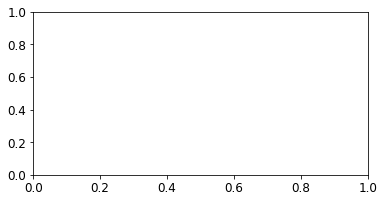

In [ ]:



# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

# dinh nghia lai loss function, cai nay optimize kem
tf.keras.backend.clear_session()
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
# # TH1 : xem 12 gia tri la buoc thoi gian
# model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# TH2 : xem 12 gia tri la dac tinh
model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
model.compile(optimizer=opt, loss='mse')
model.summary()

###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[0]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
# conditional call back
value00=0.0045 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
#  # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=300,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
#filepath=outs[0]+"/"+names[0]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
filepath=outs[0]+"/"+names[0]+str(k)+"lead"+str(m)+"best_stopT4M1TEST.keras", # cong them buoc thoi gian
# filepath=outs[0]+"/"+"T4M1_test"+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################

"""# TRAINING MODELS"""

# # set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
#TTRANGNING
# # Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


Save loss training?

with open(outs[4]+'/'+'trainHistoryDictT4M1.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)



"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
# loaded_model=load_model(outs[0]+"/"+names[0]+str(k)+"lead"+str(m)+"best_stop.keras",) # cong them buoc thoi gian")
# print("Loaded model from disk")


# with open(outs[4]+'/'+'trainHistoryDictT4M1.pkl',  'rb') as f3:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     history = pickle.load(f3)

"""# Draw graphics"""


"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras")
print("Loaded model from disk")

"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[0]+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period

y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=4
df_all_hinh['NAME'][i]='T4M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3
#============================================================================

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
# SAVE RESULTS
namex='T4M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[0]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[0]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[0]+str(k)+'Scatter_plot_T4M1'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+names[0]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[0]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

#   # TEST*************************************************************************
  
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   vector_date_test=vector_date[-24:]
#   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
#   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
#     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1month' +' lead time prediction at testing')
#   plt.tight_layout() 

#   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# =============================================================================

# TEST*************************************************************************
  # Chi plot 2015-2016
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  # vector_date_test=vector_date[-24:]
  n_test_plot=n_test
  vector_date_test=vector_date[-n_test_plot:]
  plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'k-.')
  plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'r-.')
  ts_T4M1=pred3[-n_test_plot:] # tim thang 9 thap nhat lech mot thang voi M3
    # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1month' +' lead time prediction at testing')
  plt.tight_layout() 

  plt.savefig(outs[3]+'/'+names[0]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================

"""# Save result to CSV"""

# compressed_file = bz2.BZ2File(f, 'w')
m=0

# 0: train, #1: val, # 2:test
# list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# ## enable to see data franame
# %load_ext google.colab.data_table
# df_test

# ## diable to see dataframe
# %unload_ext google.colab.data_table

# %tensorboard --logdir logs/T4-M1-TB-2021/

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=13042, height=1000)

# Tinh MAE
from sklearn.metrics import mean_absolute_error
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[0]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)

df_all.iloc[4,0]='T4M1'
df_all.iloc[4,1]=df_error.iloc[0,5]
df_all.iloc[4,2]=df_error.iloc[0,1]
df_all.iloc[4,3]=df_error.iloc[1,5]
df_all.iloc[4,4]=df_error.iloc[1,1]
df_all.iloc[4,5]=df_error.iloc[2,5]
df_all.iloc[4,6]=df_error.iloc[2,1]
print(df_all)
df_error.to_csv(outs[2]+'/'+names[0]+'.csv')

# T4M2

In [ ]:
# -*- coding: utf-8 -*-
"""T4M2_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1R-9luQ_TJEw33lhRPznPwCGORtE5iTju
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T4M2'+'/'+'save_model',
      'T4M2'+'/'+'save_pickles',
      'T4M2'+'/'+'tables',
      'T4M2'+'/'+'figs',
      'T4M2'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)

"""# Import Libraries"""

"""# Load data and initial paramaters"""

# Ten mo hinh

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

"""# Define station, lag, lead times"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T4M1','T4M2','T4M3']
k=29
n_in0=0
n_out0=3
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12+1,:] # Them 1 thang 2017.01
# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)
df2
list_drop=df2.columns[[3,7]]
df4=df2.drop(columns=list_drop,axis=1).copy()
df4


In [ ]:



# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

# dinh nghia lai loss function, cai nay optimize kem
tf.keras.backend.clear_session()
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
# # TH1 : xem 12 gia tri la buoc thoi gian
# model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# TH2 : xem 12 gia tri la dac tinh
model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
model.compile(optimizer=opt, loss='mse')
model.summary()

###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
# conditional call back
value00=0.0045 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
#  # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=300,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[1]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################

"""# TRAINING MODELS"""

# # set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

# Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # Save loss training
# save loss training 
with open(outs[4]+'/'+'trainHistoryDictT4M2.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)



"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[1]+str(k)+"lead"+str(m)+"best_stop.keras",) # cong them buoc thoi gian")
# print("Loaded model from disk")


with open(outs[4]+'/'+'trainHistoryDictT4M2.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

"""# Draw graphics"""

"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[1]+str(k)+"lead"+str(m)+"best_stop.keras")
print("Loaded model from disk")

"""# Draw graphics"""

# # =============================================================================
# # DANH GIA
# # =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# # plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[1]+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
# ###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period

y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=5
df_all_hinh['NAME'][i]='T4M2'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3
#======================================================
# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
# SAVE RESULTS
namex='T4M2'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  # plt.savefig(outs[3]+'/'+names[n_out0]+str(k)+'scatterT4M2'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+names[1]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[1]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

#   # TEST*************************************************************************
  
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   vector_date_test=vector_date[-24:]
#   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
#   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
#     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1month' +' lead time prediction at testing')
#   plt.tight_layout() 

#   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# =============================================================================

# TEST*************************************************************************
  # Chi plot 2015-2016
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
# vector_date_test=vector_date[-24:]
n_test_plot=n_test
vector_date_test=vector_date[-n_test_plot:]
plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'k-.')
plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'r-.')
ts_T4M2=pred3[-n_test_plot:] # tim thang 9 thap nhat lech mot thang voi M3
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[1]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================

"""# Save result to CSV"""

# compressed_file = bz2.BZ2File(f, 'w')
m=0

# 0: train, #1: val, # 2:test
# list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# ## enable to see data franame
# %load_ext google.colab.data_table
# df_test

# ## diable to see dataframe
# %unload_ext google.colab.data_table

# %tensorboard --logdir logs/T4-M1-TB-2021/

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=13042, height=1000)

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)

df_all.iloc[5,0]='T4M2'
df_all.iloc[5,1]=df_error.iloc[0,5]
df_all.iloc[5,2]=df_error.iloc[0,1]
df_all.iloc[5,3]=df_error.iloc[1,5]
df_all.iloc[5,4]=df_error.iloc[1,1]
df_all.iloc[5,5]=df_error.iloc[2,5]
df_all.iloc[5,6]=df_error.iloc[2,1]
print(df_all)

df_error.to_csv(outs[2]+'/'+names[1]+'.csv')

# T4M3

In [ ]:
# -*- coding: utf-8 -*-
"""T4M3_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1IvJ6Qf6QNn8Y3X7GZqDZswZbc594R89q
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T4M3'+'/'+'save_model',
      'T4M3'+'/'+'save_pickles',
      'T4M3'+'/'+'tables',
      'T4M3'+'/'+'figs',
      'T4M3'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)


"""# Import Libraries"""



"""# Load data and initial paramaters"""

# Ten mo hinh

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

"""# Define station, lag, lead times"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T4M1','T4M2','T4M3']
k=29
n_in0=0
n_out0=4
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12+2,:] # testing den 2017.02
# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)
df2
df2.columns
list_drop=df2.columns[[0,1,2,3,7,11]]
df4=df2.drop(columns=list_drop,axis=1).copy()
df4


In [ ]:



#

# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

# dinh nghia lai loss function, cai nay optimize kem
tf.keras.backend.clear_session()
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
# # TH1 : xem 12 gia tri la buoc thoi gian
# model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# TH2 : xem 12 gia tri la dac tinh
model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
model.compile(optimizer=opt, loss='mse')
model.summary()

###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[2]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
# conditional call back
value00=0.0045 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
#  # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=300,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[2]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################

"""# TRAINING MODELS"""

# # set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=12,
# initial_epoch=10,
# )


# # # # Save loss training
# # # save loss training 
# with open(outs[4]+'/'+'trainHistoryDictT4M3.pkl', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)

# """# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# # Load results
# loaded_model=load_model(outs[0]+"/"+names[2]+str(k)+"lead"+str(m)+"best_stop.keras")
# print("Loaded model from disk")

with open(outs[4]+'/'+'trainHistoryDictT4M3.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

"""# Draw graphics"""


# # =============================================================================
# # DANH GIA
# # =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[2]+str(k)+'loss_curve_T4M2'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
# ###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period

y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=6
df_all_hinh['NAME'][i]='T4M3'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3
# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
# SAVE RESULTS
namex='T4M3'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[2]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[2]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[2]+str(k)+'scatterplotT4M2'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+names[2]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
plt.legend(['obs','simulation'])
plt.ylabel('NDI')
plt.tight_layout()

plt.savefig(outs[3]+'/'+names[2]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()

#   # TEST*************************************************************************
  
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   vector_date_test=vector_date[-24:]
#   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
#   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
#     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1month' +' lead time prediction at testing')
#   plt.tight_layout() 

#   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# =============================================================================

# TEST*************************************************************************
  # Chi plot 2015-2016
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
# vector_date_test=vector_date[-24:]
n_test_plot=n_test
vector_date_test=vector_date[-n_test_plot:]
plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'k-.')
plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'r-.')
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])
ts_T4M3=pred3[-n_test_plot:] # tim thang 9 thap nhat
plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[2]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================

"""# Save result to CSV"""

# compressed_file = bz2.BZ2File(f, 'w')
m=0

# 0: train, #1: val, # 2:test
# list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# ## enable to see data franame
# %load_ext google.colab.data_table
# df_test

# ## diable to see dataframe
# %unload_ext google.colab.data_table

# %tensorboard --logdir logs/T4-M1-TB-2021/

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=13042, height=1000)

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[2]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)

df_all.iloc[6,0]='T4M3'
df_all.iloc[6,1]=df_error.iloc[0,5]
df_all.iloc[6,2]=df_error.iloc[0,1]
df_all.iloc[6,3]=df_error.iloc[1,5]
df_all.iloc[6,4]=df_error.iloc[1,1]
df_all.iloc[6,5]=df_error.iloc[2,5]
df_all.iloc[6,6]=df_error.iloc[2,1]
print(df_all)

df_error.to_csv(outs[2]+'/'+names[2]+'.csv')

In [ ]:
# # !pip install matplotlib --upgrade --q
# import matplotlib 
# print(matplotlib. __version__)

# VE HINH THONG KE T3T4

In [ ]:
# !pip install matplotlib --upgrade --q
# # Group bar chart of M1, M2, M3
# import matplotlib.pyplot as plt
# import numpy as np
# labels = ['training', 'validation', 'testing', ]
# # men_means = [20, 34, 30]
# # women_means = [25, 32, 34]

# men_means = [df_all_hinh['CC1'][0], df_all_hinh['CC2'][0], df_all_hinh['CC3'][0]]
# women_means = [df_all_hinh['CC1'][4], df_all_hinh['CC1'][4], df_all_hinh['CC1'][4]]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots(figsize=(6,3))
# rects1 = ax.bar(x - width/2, men_means, width, label='T3')
# rects2 = ax.bar(x + width/2, women_means, width, label='T4')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('CC')
# # ax.set_title('Scores by group and gender')
# ax.set_xticks(x, labels)
# ax.legend()
# plt.ylim([0,1])
# ax.bar_label(rects1, padding=0,fmt='%.2f')
# ax.bar_label(rects2, padding=0,fmt='%.2f')

# fig.tight_layout()

# plt.show()


# T5M1A

In [ ]:
# # -*- coding: utf-8 -*-
# """T4M0_correct.ipynb

# Automatically generated by Colaboratory.

# Original file is located at
#     https://colab.research.google.com/drive/1RI4LDNVj5Ah8WUsHEkHp-z7PM3vTeWw-
# """

# from google.colab import drive
# drive.mount('/content/drive')

# """Set Output folder"""

# # import os
# # os.chdir('/content/drive/MyDrive/hybrid_final')
# # # tai thu muc luu thong minh de sau nay doc duoc du lieu cua 59 tram
# # name_models=['T3','T4cor','T5','GS5']
# phases=['train','validation','testing']
# n_model=1 # phan ticch mo hinh T3
# k=29 # danh gia  tram 29
# n_in0=3 # buoc thoi gian input la 3
# n_out0=1 #lead time
# # m=n_out0 
# # chay truong hop dat biet 
# m=0


# import os
# from google.colab import drive
# drive.mount('/content/drive')

# """Set Output folder"""

# import os
# os.chdir('/content/drive/MyDrive/AAA_hybrid')
# outs=['T4M1'+'/'+'save_model',
#       'T5M1A'+'/'+'save_pickles',
#       'T5M1A'+'/'+'tables',
#       'T5M1A'+'/'+'figs',
#       'T4M1'+'/'+'loss']
# for out in outs:
#   if not os.path.exists(out):
#     os.makedirs(out)


# """# Load data and initial paramaters"""
# # os.chdir('/content/drive/MyDrive/hybrid_final')
# # Ten mo hinh

# # Load du lieu
# # load data obs
# with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59 = pickle.load(f1)
# ##  IMPORTANT CHANGE DATA CLIMATE ###=============================
# # load data cim 
# # all from 2014.1-2017.12
# # mon 1: true from 2014.4-2016.12, other dummy
# # mon 2: true from 2014.5-2017.01
# # mon 3: true from 2014.6-2017.02
# # all true 
# # require mon1:2015.1-2016.12
# # mon 2: 2015.2-2017.1
# #mon 3: 2015.3 -2017.2
# # with open('input_pickles'+'/'+'list_PRS_NDIclim_all.pkl', 'rb') as f2:# OLD
# with open('input_pickles/listPRS_NDI3clim1417.pkl', 'rb') as f2:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59clim = pickle.load(f2)

# """# Define station, lag, lead times"""

# ###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# # kiem tra cho ganghwa
# # names=['T4M1','T4M2','T4M3']
# k=29
# n_in0=3
# n_out0=1
# # m=n_out0 # tinh cho buoc 0
# df0=PRS3_NDI3_59[k] # 1968-2020
# # chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test

# df1=df0.iloc[(2013-1968+1)*12:(2017-1968+1)*12,:].copy() # thoi gian obs = thoi gian du bao
# df1a=PRS3_NDI3_59clim[0][29].copy() # gia tri 0 tuong ung lead time =1

# # chia du lieu ra giong nhau

# df1a.index=pd.date_range(start='2014-01',end='2017-12',freq='MS')
# df2=series_to_supervised_df(df1,n_in0,n_out0)
# # df2a=series_to_supervised_df(df1a,n_in0,n_out0)
# df2a=series_to_supervised_df(df1a,n_in0,n_out0) 
# df3a=df2a.copy()

# #### Thay doi gia tri khi hau
# df3=df2.copy() # tao ra ban sao so thuc do
# # gan toan bo gia tri tai thoi diem du bao cho bang gia tri khi hau
# df3.iloc[:,[-2,-3,-4]]=df3a.iloc[:,[-2,-3,-4]]
# # kiem tra xem gia tri cua var1 var2 var3 tai t da thay doi chua
# # Bo cac gia tri NDI (var4) tai cac buoc tu 3 den het
# df3.columns
# list_var4=df3.columns[3:df2.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, 
# # Bo di cac gia tri cua NDI tai thoi diem t-1 ve truoc
# df4=df3.drop(columns=list_var4.values)

In [ ]:


# # df1=df0 # du bao het
# # =============================================================================

# # =============================================================================



# """## Bo het cac gia tri NDI, tuc la var 4 trong mo hinh tru gia tri cuoi"""

# # df2.columns
# # list_var4=df2.columns[3:df2.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, sau do bo gia tri cuoi lay nguoc ve phia truoc
# # list_var4a=df2a.columns[3:df2.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, sau do bo gia tri cuoi lay nguoc ve phia truoc
# # # list_var4 # list drop var 4

# # # list drop cho var1, var2, var3
# # # df2.columns
# # list_var123=df2.columns[0:3]
# # list_var123a=df2a.columns[0:3]
# # # list_var123

# # # Bo di cac gia tri cua NDI tai thoi diem t-1 ve truoc
# # df3=df2.drop(columns=list_var4.values)
# # df3a=df2a.drop(columns=list_var4a.values)
# # # df3.columns

# # # Bo di cac gia tri cua var1, var2, var3 tai thoi diem t-3
# # # df4=df3.drop(columns=list_var123.values) # KHONG BO vi cai nay khong phai la M0
# # # df4a=df3a.drop(columns=list_var123a.values) # KHONG BO vi cai nay khong phai la M0
# # df4=df3.copy()
# # df4a=df3a.copy()
# # # gia du bao cuoi cung phai la -1.75
# # print(df4.iloc[-1,-1])
# # print(df4a.iloc[-1,-1])
# # # GIA TRI KIEM TRA CUA KHI TUONG THAY TOAN BO BANG OBS TRU THOI DIEM T DU BAO THOI
# # df4b=df4a.copy()
# # df4b.iloc[:-df4a.shape[0],:-4]=df4.iloc[:-df4a.shape[0],:-4] # NEU DU BAO LEN 2 THANG 
# # # tHI -7. BOI VI -1 LA SO CUOI NDI ROI, 3 THANG LEN -10
# # # =============================================================================
# # # =============================================================================
# # #     remove values PRS  at fure prediction
# # # var3(t),var2(t),var1(t) have to remove
# # list_drops=[np.arange(2,5)*-1,np.arange(2,9)*-1,np.arange(2,13)*-1]
# # list_drops1=[[],[],[]]
# # list_drops1a=[[-5,-9,-13],[-5,-9,-13,-17],[-5,-9,-13,-17,-21]]


# # # =============================================================================
# # df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
# # df4=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)

# # # =============================================================================
# # Chia du lieu theo ti le 6:2:2
# n_train=int(df4.shape[0]*0.6)
# n_val=int(df4.shape[0]*0.8)-n_train
# ## QUAN TRONG CHI CAN XEM THANG TEST NAY
# n_test=df4.shape[0]-n_val-n_train

# train_df=df4.iloc[0:n_train,:]
# val_df=df4.iloc[n_train:n_train+n_val,:]
# test_df=df4.iloc[n_train+n_val:,:]
# # DU LIEU KHI HAU
# # test_dfa=df4a
# test_dfa=df4b # thay bang khi hau cap nhat obs
# # print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# # lay chinh no du bao no luon
# # x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# y_train=y_train0.reshape(y_train0.shape[0],1)
# # print(x_train.shape,y_train.shape)

# x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# # x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
# y_val=y_val0.reshape(y_val0.shape[0],1)
# # print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# # x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# # DU LIEU KHI HAU
# x_testa,y_test0a=test_dfa.iloc[:,:-1].values,test_dfa.iloc[:,-1].values 
# # x_testa,y_test0a=test_dfa.iloc[:,:].values,test_dfa.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# y_testa=y_test0a.reshape(y_test0a.shape[0],1)
# # print(x_test.shape,y_test.shape)

# # =============================================================================


# # =============================================================================
# # Scale data
# # tao 2 scaler rieng cho X, Y de invert cho de
# scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
# scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

# x_train_scale = scaler_x.fit_transform(x_train)
# y_train_scale = scaler_y.fit_transform(y_train)

# # fit scale cua train cho val va test
# x_val_scale=scaler_x.transform(x_val)
# y_val_scale=scaler_y.transform(y_val)

# x_test_scale=scaler_x.transform(x_test)
# y_test_scale=scaler_y.transform(y_test)

# # DU LIEU KHI HAU
# x_testa_scale=scaler_x.transform(x_testa)
# y_testa_scale=scaler_y.transform(y_testa)
# # Can xem lai 12 gia tri nay la buoc thoi gian 
# # hay 12 gia tri duoc xem nhu feature
# # # TH1 : Xem no nhu 12 buoc thoi gian
# # n_features=1
# # train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# # val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# # test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))
# # # DU LIEU KHI HAU
# # test_Xa = x_testa_scale.reshape((x_testa_scale.shape[0], x_testa_scale.shape[1], n_features))
# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# test_Xa = x_testa_scale.reshape((x_testa_scale.shape[0], n_step,x_testa_scale.shape[1]))
# print(train_X.shape)


# """# Define model and setup training, save models

# """

# # dinh nghia lai loss function, cai nay optimize kem
# # xoa cac mo hinh tam thoi 
# if 'model' in locals():
#   print('xoa ba cai cu no di')
#   del model
# # myVar exists.

#     # if 'myVar' in globals():
#     # # myVar exists.
    
# tf.keras.backend.clear_session() # xoa cac lop tam thoi de tranh cong don
# mape = tf.keras.losses.MeanAbsolutePercentageError()
# # =============================================================================

# # =============================================================================
# # =============================================================================
# # Define model
# model = Sequential()
# # # # TH1 : xem 12 gia tri la buoc thoi gian
# # model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# # TH2 : xem 12 gia tri la dac tinh
# model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
# # opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
# model.compile(optimizer=opt, loss='mse')
# model.summary()

# ###############################################################################
# # NAME="T4-M1-TB-{}".format(int(time.time()))
# NAME1='T4M0'+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# # tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# # path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# # tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
# tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
#                                                      histogram_freq=1) # ket hop 
# # conditional call back
# value00=0.0045 # cho validation
# from keras.callbacks import Callback
# class EarlyStoppingByLossVal(Callback):
#     def __init__(self, monitor='val_loss', value=value00, verbose=0):
#         super(Callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is None:
#             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

#         if current < self.value:
#             if self.verbose > 0:
#                 print("Epoch %05d: early stopping THR" % epoch)
#             self.model.stop_training = True

# callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

# ###############
# # condtion for training
# # conditional call back
# value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
# from keras.callbacks import Callback
# class EarlyStoppingByLoss(Callback):
#     def __init__(self, monitor='loss', value=value0, verbose=0):
#         super(Callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is None:
#             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

#         if current < self.value:
#             if self.verbose > 0:
#                 print("Epoch %05d: early stopping THR" % epoch)
#             self.model.stop_training = True

# callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
# ##### callbacks
# callbacks_list = [
# # callbacks_threshole_val,
# #  # stopping
# keras.callbacks.EarlyStopping(
# monitor="val_loss",
# patience=100,
# mode="min",
# ),

# ###################################################################

# # checkpoint
# keras.callbacks.ModelCheckpoint(
# filepath=outs[0]+"/"+str(k)+"leadT5M1"+str(m)+"best_stop.keras", # cong them buoc thoi gian
# monitor="val_loss",
# save_best_only=True,
# ),
# # tensorboard,
# # tensorboard_callback1, # CO SU KHAC BIET O DAY
# ]
# ######################################################################

# """# TRAINING MODELS"""

# # set seed de ket qua model khong bi thay doi
# # seed=123456789
# # import random
# # # import numpy as np
# # # import tensorflow as tf
# # random.seed(seed)
# # np.random.seed(seed)
# # tf.random.set_seed(seed)
# # ###==========================================================================
# # # KHONG FIT NUA TRONG MO HÌNH T5 CHỈ CHIA LẠI INPUT
# # # Fit model can bo sung them batchsize

# # history=model.fit(train_X,
# #           y_train_scale,
# # epochs=500,
# # callbacks=callbacks_list,
# # validation_data=(val_X,y_val_scale),
# # batch_size=36,sample_weight=None, # KHAC O DAY
# # # steps_per_epoch=12, # KHAC O DAY 
# # # initial_epoch=10,
# # )

# # # # Save loss training
# # # save loss training 
# # with open(outs[4]+'/'+'trainHistoryDictT5M1.pkl', 'wb') as file_pi:
# #         pickle.dump(history.history, file_pi)

# ## ==========================================================================

# """# Load results"""

# # LOAD KET QUA TOT NHAT
# # =============================================================================
# # Load results
# loaded_model=load_model("T4M1/save_model/T4M129lead1best_stop.keras",) # cong them buoc thoi gian")
# # print("Loaded model from disk")


# with open("T4M1/loss/trainHistoryDictT4M1.pkl",  'rb') as f3:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     history = pickle.load(f3)

# """# Draw graphics"""

# # =============================================================================
# # DANH GIA
# # =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
# fig,ax=plt.subplots(figsize=(6,3))
# plt.rcParams.update({'font.size': 11})
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# # Draw the minimum epochs 
# df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# # print(df_val_loss)
# idxmin=df_val_loss[['val_loss']].idxmin().values
# val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
# print(idxmin,val_loss_min_values)
# plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
#              xy=(idxmin,val_loss_min_values), xycoords='data',
#             xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3"),
#             )

# plt.legend(['train','val'])
# plt.xlabel('epochs')
# plt.ylabel('mse')
# # plt.title('learning rate of 1 month leadtime prdiction')
# plt.tight_layout()
# plt.savefig(outs[3]+'/'+'T4M0'+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
# plt.show(fig)
# plt.close(fig)
# ###################################################################################
# #----------------------Important !!!!-----------------------#
# pred = loaded_model.predict(train_X)  #(predicted)  
# obs  = y_train_scale               #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period

# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred train, obs train
# pred1=pred
# obs1=obs

# ##########################################################
# # Validation
# pred = loaded_model.predict(val_X)  #(pred)  
# obs  = y_val_scale                 #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred2=pred
# obs2=obs

# # ################################################################
# # pred = loaded_model.predict(test_X)  #(pred)  
# # obs  = y_test_scale                 #(obs) 
# # #-----------------------------------------------------------#

# # #----------------------reverse scaling------------------------------#
# # #For training period
# # y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# # y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# # #Inverse scaled --> pred, obs  
# # pred = y_hat_rescaled
# # obs = y_rescaled

# # # pred1, obs1: pred val, obs val
# # pred3=pred
# # obs3=obs
# #--------------------------------------------------------------------#

# ################################################################
# # DU LIEU KHI HAU TAI TESTING
# pred = loaded_model.predict(test_Xa)  #(pred)  
# obs  = y_testa_scale                 #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred3=pred
# obs3=obs
# #--------------------------------------------------------------------#

# # TOM LAI
# list_con=list()
# df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
# list_con.append(df_train)
# df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
# list_con.append(df_val)
# df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
# list_con.append(df_test)
# # =============================================================================
# # SAVE RESULTS
# # =============================================================================
# with open(outs[1]+'/'+'T5M1'+str(k)+'lead'+str(m)+'T5_lag3.pkl', 'wb') as f: # khong nen
#   # compressed_file = bz2.BZ2File(f, 'w')
#   pickle.dump(list_con, f)

# #####
# ## mo kiem tra lai
# with open(outs[1]+'/'+'T5M1'+str(k)+'lead'+str(m)+'T5_lag3.pkl', 'rb') as f: # khong nen
#     # compressed_file = bz2.BZ2File(f, 'r')
#     load_list_con = pickle.load(f)
# # 0,1,2 tuong ung voi train, val, test
# # pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# # print('cc of val: '+str(pearson))
# # =============================================================================
# # VE HINH
# # =============================================================================
# # HINH  SCATTER
# # Ve hinh statter plot cua training, validation and testing

# # scale plot M1


# axes=[131,132,133]
# obs_all=[obs1,obs2,obs3]
# pred_all=[pred1,pred2,pred3]
# # lead_time=0
# names_phases=['training','validation','testing']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(9,3))
#   plt.rcParams.update({'font.size': 12})
# # lead_time=2
#   for phase in range(3):
#   # for lead_time in range(3):

#     plt.subplot(axes[phase])
#     pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
#     r2_vanila_1m =pearson
#     plt.rcParams.update({'font.size': 12})
    
#     min_values=-6.0
#     max_values=3.0

#     plt.xlim(min_values,max_values)
#     plt.ylim(min_values,max_values)

#     plt.scatter(x=load_list_con[phase]['obs'],
#                 y=load_list_con[phase]['pred'],
#                 s=None,
#                 c='k', 
#                 marker='.', 
#                 cmap=None,
#                 norm=None,
#                 vmin=None, 
#                 vmax=None,
#                 alpha=None,            
#                 linewidths=None,
#                 edgecolors=None,plotnonfinite=False,data=None)

#     # ve duong 45
#     # plt.legend(['NDI'])
#     plt.xlabel('obs')
#     if lead_time==0:
#       plt.ylabel('pred')
#     # if lead_time==1:
#     # plt.title('M1S4prs_prs '+names_phases[m])
#     # add_identity(ax, color='r', ls='--')
#     plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
#     xpoints = ypoints = plt.xlim()
#     plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

#     plt.tight_layout()

#   plt.savefig(outs[3]+'/'+str(k)+'scatter_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# # =============================================================================
# #VE HINH TIME SERIES
# # =============================================================================
  
#   # Ve TRAIN ***************************************************************
# # Time series cua train
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,4))
#   plt.subplot(211)
#   plt.ylim([-6.0,2.3])
#   plt.rcParams.update({'font.size': 12})
 
#   vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
#   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')
#   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'k+-.')

#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
#   plt.tight_layout()

#   plt.subplot(212)
#   plt.ylim([-6.0,2.3])
#   plt.rcParams.update({'font.size': 12})
  
#   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'r-.')
#   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'k+-.')
#   plt.ylabel('NDI')
#   plt.tight_layout()

# plt.savefig(outs[3]+'/'+str(k)+'T4M0'+str(m)+'.jpeg',dpi=300)
# plt.show()
# plt.close()
# ############ VAL **************************************************************
# # Time series cua val
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'r-.')
#   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'k+-.')
#   plt.legend(['obs','simulation'])
#   plt.ylabel('NDI')
#   plt.tight_layout()

#   plt.savefig(outs[3]+'/'+str(k)+'Val_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()

# #   # TEST*************************************************************************
  
# # #Graph
# # months=['1month','2months','3months']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(6,3))
# #   plt.subplot(111)
# #   plt.rcParams.update({'font.size': 12})
# #   plt.ylim([-6.0,2.3])
# #   vector_date_test=vector_date[-24:]
# #   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
# #   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
# #     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# #   plt.legend(['obs','simulation'])

# #   plt.ylabel('NDI')
# #   # plt.title('Time series '+'1month' +' lead time prediction at testing')
# #   plt.tight_layout() 

# #   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
# #   plt.show()
# #   plt.close()
# # =============================================================================

# # TEST*************************************************************************
#   # Chi plot 2015-2016
# #Graph
# months=['1month','2months','3months']
# # for lead_time in range(1):
# fig,ax=plt.subplots(figsize=(6,3))
# plt.subplot(111)
# plt.rcParams.update({'font.size': 12})
# plt.ylim([-6.0,2.3])
# # vector_date_test=vector_date[-24:]
# # n_test_plot=n_test

# n_test_plot=pred3.shape[0] # Du lieu khi hau
# vector_date_test=vector_date[-n_test_plot:]
# plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'r-.')
# plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'k+-.')
#   # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# plt.legend(['obs','simulation'])
# # chinh hien thi truc X
# import datetime

# from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
# years = YearLocator()   # every year
# months = MonthLocator()  # every month
# yearsFmt = DateFormatter('%Y')
# # yearsFmt = DateFormatter('%Y-%m')
# # yearsFmt = DateFormatter('%Y')
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ##
# plt.ylabel('NDI')
# # plt.title('Time series '+'1month' +' lead time prediction at testing')
# plt.tight_layout() 

# plt.savefig(outs[3]+'/'+str(k)+'test_'+'T4M0'+'M'+str(m)+'.jpeg',dpi=300)
# plt.show()
# plt.close()
# # =============================================================================

# """# Save result to CSV"""

# # compressed_file = bz2.BZ2File(f, 'w')
# m=0

# # 0: train, #1: val, # 2:test
# # list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# # ## enable to see data franame
# # %load_ext google.colab.data_table
# # df_test

# # ## diable to see dataframe
# # %unload_ext google.colab.data_table

# # %tensorboard --logdir logs/T4-M1-TB-2021/

# # from tensorboard import notebook
# # notebook.list() # View open TensorBoard instances

# # # Control TensorBoard display. If no port is provided, 
# # # the most recently launched TensorBoard is used
# # notebook.display(port=13042, height=1000)

# # Tinh MAE
# from sklearn.metrics import mean_absolute_error
# MAE_train=mean_absolute_error(obs1,pred1)
# print(MAE_train)
# MAE_val=mean_absolute_error(obs2,pred2)
# print(MAE_val)
# MAE_test=mean_absolute_error(obs3,pred3)
# print(MAE_test)

# # # nhap thu vien tinh sai so
# # from sklearn import metrics
# # from scipy.stats import pearsonr
# # def nse(predictions, targets):
# #     return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
# name_model=[]
# mae=[]
# rmse=[]
# mape=[]
# NSE=[]
# # R2=[]
# CC=[]
# names_models=['training','validation','testing']
# for i in range(3):
#   # phases.append(phase_cho[i])
#   name_model.append(names_models[i])
#   CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
#   rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
#   mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
#   # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
#   list_con[i].to_csv(outs[2]+'/'+'T4M0'+names_models[i]+'.csv')

# ###################
# df_error=pd.DataFrame({'name_model':name_model,
# 'mae':mae,
# 'rmse':rmse,
# 'mape':mape,
# 'NSE':NSE,
# # 'R2':R2,
# 'CC':CC,
# })
# print(df_error)
# df_error.to_csv(outs[2]+'/'+'T5M1'+'.csv')

# # =============================================================================
# # THONG KE SAI SO
# # =============================================================================
# # df_ts=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()},index=range(pred3.shape[0]))
# df_stat=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(59))
# df_stat0=pd.DataFrame(columns=(['CC1','MAE1','CC2','MAE2','CC3','MAE3']),index=range(1))
# for p in range(3):
#   df_ts=load_list_con[p]

#   df_ts.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'TS'+phases[p]+'.csv')
#   CC,dotincay=pearsonr(df_ts.obs,df_ts.pred)
#   MAE=metrics.mean_absolute_error(df_ts.obs,df_ts.pred)
#   df_stat.iloc[k,2*p]=CC
#   df_stat.iloc[k,2*p+1]=MAE
#   df_stat0.iloc[0,2*p]=CC
#   df_stat0.iloc[0,2*p+1]=MAE

#   df_stat.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+'.csv')
#   df_stat0.to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'CC_MAE'+str(k)+'.csv')
#   df_stat.agg(['count','mean','std', 'min', 'max']).to_csv(outs[2]+'/'+str(k)+'T4M0'+str(m)+'des'+'.csv')
# print(df_stat0)
# # nhap thu vien tinh sai so
# from sklearn import metrics
# from scipy.stats import pearsonr
# def nse(predictions, targets):
#     return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
# name_model=[]
# mae=[]
# rmse=[]
# mape=[]
# NSE=[]
# # R2=[]
# # CC=[]
# names_models=['training','validation','testing']
# for i in range(3):
#   # phases.append(phase_cho[i])
#   name_model.append(names_models[i])
#   # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
#   rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
#   mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
#   # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
#   list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

# ###################
# df_error=pd.DataFrame({'name_model':name_model,
# 'mae':mae,
# 'rmse':rmse,
# 'mape':mape,
# 'NSE':NSE,
# # 'R2':R2,
# 'CC':CC,
# })
# print(df_error)
# df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
# # print(df_error)
# df_all.iloc[7,0]='T5M1'
# df_all.iloc[7,1]=df_error.iloc[0,5]
# df_all.iloc[7,2]=df_error.iloc[0,1]
# df_all.iloc[7,3]=df_error.iloc[1,5]
# df_all.iloc[7,4]=df_error.iloc[1,1]
# df_all.iloc[7,5]=df_error.iloc[2,5]
# df_all.iloc[7,6]=df_error.iloc[2,1]
# print(df_all)
# df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')

# t5m1TEST

In [ ]:
#@title  { form-width: "100px" }
#@title  { display-mode: "both" }
#@title  { display-mode: "both" }
#@title
# -*- coding: utf-8 -*-
"""T4M1_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/12Sd45DEQqvU8qw4BKSB_K98nIRcg3LcS
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T4M1'+'/'+'save_model',
      'T4M1'+'/'+'save_pickles',
      'T4M1'+'/'+'tables',
      'T4M1'+'/'+'figs',
      'T4M1'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)



"""# Load data and initial paramaters"""

# Ten mo hinh

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

###
with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

df1a=PRS3_NDI3_59cli[0][k] # khi hau
# df1a.index=pd.date_range(start='2014-01',end='2016-12',freq='MS')
df1b=df0.iloc[(2013-1968+1)*12+3:(2016-1968+1)*12,:].copy() # thuc do cung thoi diem khi hau
###

"""# Define station, lag, lead times"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T4M1','T4M2','T4M3']
k=29
n_in0=1
n_out0=2
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12,:] # t

# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)
df2
df2.columns
list_drop=df2.columns[[3,7]]
df4=df2.drop(columns=list_drop,axis=1).copy()
df4

###
df5=series_to_supervised_df(df1,n_in0,n_out0)
# df2a: cung phai chia gia tri mo hinh khi hau theo thuc do
df5a=series_to_supervised_df(df1a,n_in0,n_out0)
df5a.columns
list_drop=df5a.columns[[3,7]]
df5a=df5a.drop(columns=list_drop,axis=1).copy()

df5b=series_to_supervised_df(df1b,n_in0,n_out0)
df5b.columns
list_drop=df5b.columns[[3,7]]
df5b=df5b.drop(columns=list_drop,axis=1).copy()

df6=df5.copy()
# df3a=df2.copy()
df6b=df5b.copy()
df6b.iloc[:,[-2,-3,-4]]=df5a.iloc[:,[-2,-3,-4]] # cai 3 moi cung kich thuoc voi climate
df9=df6b.copy()
df9=df9.iloc[7:,:]
df9

In [ ]:

###




# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

####x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values
test_df=df9
x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

# dinh nghia lai loss function, cai nay optimize kem
tf.keras.backend.clear_session()
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
# # TH1 : xem 12 gia tri la buoc thoi gian
# model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# TH2 : xem 12 gia tri la dac tinh
model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
model.compile(optimizer=opt, loss='mse')
model.summary()

###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[0]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
# conditional call back
value00=0.0045 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
#  # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=300,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
#filepath=outs[0]+"/"+names[0]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
filepath=outs[0]+"/"+names[0]+str(k)+"lead"+str(m)+"best_stopT4M1TEST.keras", # cong them buoc thoi gian
# filepath=outs[0]+"/"+"T4M1_test"+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################

"""# TRAINING MODELS"""

# # set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# #TTRANGNING
# # # Fit model can bo sung them batchsize

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=12,
# initial_epoch=10,
# )


# # Save loss training?

# with open(outs[4]+'/'+'trainHistoryDictT4M1.pkl', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)



"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
# loaded_model=load_model(outs[0]+"/"+names[0]+str(k)+"lead"+str(m)+"best_stop.keras",) # cong them buoc thoi gian")
# print("Loaded model from disk")


# with open(outs[4]+'/'+'trainHistoryDictT4M1.pkl',  'rb') as f3:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     history = pickle.load(f3)

"""# Draw graphics"""


"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras")
print("Loaded model from disk")

"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
# fig,ax=plt.subplots(figsize=(6,3))
# plt.rcParams.update({'font.size': 11})
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# # Draw the minimum epochs 
# df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# # print(df_val_loss)
# idxmin=df_val_loss[['val_loss']].idxmin().values
# val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
# print(idxmin,val_loss_min_values)
# plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
#              xy=(idxmin,val_loss_min_values), xycoords='data',
#             xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3"),
#             )

# plt.legend(['train','val'])
# plt.xlabel('epochs')
# plt.ylabel('mse')
# # plt.title('learning rate of 1 month leadtime prdiction')
# plt.tight_layout()
# plt.savefig(outs[3]+'/'+names[0]+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
# plt.show(fig)
# plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period

y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For testing period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=4
df_all_hinh['NAME'][i]='T4M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3
#============================================================================

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
# SAVE RESULTS
namex='T5M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[0]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[0]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[0]+str(k)+'Scatter_plot_T4M1'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+names[0]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[0]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

#   # TEST*************************************************************************
  
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   vector_date_test=vector_date[-24:]
#   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
#   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
#     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1month' +' lead time prediction at testing')
#   plt.tight_layout() 

#   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# =============================================================================

# TEST*************************************************************************
  # Chi plot 2015-2016
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  # vector_date_test=vector_date[-24:]
  n_test_plot=n_test
  vector_date_test=vector_date[-n_test_plot:]
  plt.plot(vector_date[-24:],obs3[-n_test_plot:],'k-.')
  plt.plot(vector_date[-24:],pred3[-n_test_plot:],'r-.')
  ts_T4M1=pred3[-n_test_plot:] # tim thang 9 thap nhat lech mot thang voi M3
    # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1month' +' lead time prediction at testing')
  plt.tight_layout() 

  plt.savefig(outs[3]+'/'+names[0]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================

"""# Save result to CSV"""

# compressed_file = bz2.BZ2File(f, 'w')
m=0

# 0: train, #1: val, # 2:test
# list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# ## enable to see data franame
# %load_ext google.colab.data_table
# df_test

# ## diable to see dataframe
# %unload_ext google.colab.data_table

# %tensorboard --logdir logs/T4-M1-TB-2021/

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=13042, height=1000)

# Tinh MAE
from sklearn.metrics import mean_absolute_error
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[0]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)

df_all.iloc[4,0]='T4M1'
df_all.iloc[4,1]=df_error.iloc[0,5]
df_all.iloc[4,2]=df_error.iloc[0,1]
df_all.iloc[4,3]=df_error.iloc[1,5]
df_all.iloc[4,4]=df_error.iloc[1,1]
df_all.iloc[4,5]=df_error.iloc[2,5]
df_all.iloc[4,6]=df_error.iloc[2,1]
print(df_all)
df_error.to_csv(outs[2]+'/'+names[0]+'.csv')



#T5M2test

In [ ]:
# -*- coding: utf-8 -*-
"""T4M2_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1R-9luQ_TJEw33lhRPznPwCGORtE5iTju
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T4M2'+'/'+'save_model',
      'T4M2'+'/'+'save_pickles',
      'T4M2'+'/'+'tables',
      'T4M2'+'/'+'figs',
      'T4M2'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)

"""# Import Libraries"""

"""# Load data and initial paramaters"""

# Ten mo hinh

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

!###
with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
    PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3
df1a=PRS3_NDI3_59cli[0][k] # khi hau 1thang
df1a1=PRS3_NDI3_59cli[1][k] # khi hau 2 thang
df1b=df0.iloc[(2013-1968+1)*12+4:(2016-1968+1)*12+1,:].copy() # thuc do cung thoi diem khi hau
!###



"""# Define station, lag, lead times"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T4M1','T4M2','T4M3']
k=29
n_in0=0
n_out0=3
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12+1,:] # Them 1 thang 2017.01
# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)
df2
list_drop=df2.columns[[3,7]]
df4=df2.drop(columns=list_drop,axis=1).copy()
df4

!###


df5=series_to_supervised_df(df1,n_in0,n_out0)
# df5a: cung phai chia gia tri mo hinh khi hau theo thuc do
df5a=series_to_supervised_df(df1a,n_in0,n_out0)
df5a1=series_to_supervised_df(df1a1,n_in0,n_out0)
df5b=series_to_supervised_df(df1b,n_in0,n_out0)
df6=df5.copy()
# df6a=df5.copy()
#df6b=df5b.copy()

df6b=df5b.iloc[7:,:]

df6b.iloc[0:23,[4,5,6]]=df5a.iloc[8:,[4,5,6]].values # cai 3 moi cung kich thuoc voi climate
df6b.iloc[-1,4]=df5a.iloc[-1,8]
df6b.iloc[-1,5]=df5a.iloc[-1,9]
df6b.iloc[-1,6]=df5a.iloc[-1,10]

df6b.iloc[0,[8,9,10]]=[53.70,35.69,561.52]
df6b.iloc[1:23,[8,9,10]]=df5a1.iloc[6:,[4,5,6]].values # cai 3 moi cung kich thuoc voi climate
df6b.iloc[-1,8]=df5a1.iloc[-1,8]
df6b.iloc[-1,9]=df5a1.iloc[-1,9]
df6b.iloc[-1,10]=df5a1.iloc[-1,10]
#df6b

df6b

#df6b.iloc[23,[4,5,6]]=df5a.iloc[:-1,[7,8,9]]
#df6b.iloc[:,5]=df5a.iloc[:,5].values # cai 3 moi cung kich thuoc voi climate
#df6b.iloc[:,6]=df5a.iloc[:,6].values # cai 3 moi cung kich thuoc voi climate
#df6b.iloc[:,8]=df5a1.iloc[:,8].values # cai 3 moi cung kich thuoc voi climate
#df6b
#df6b


##df9b=df6b.copy()
##list_var4=df6.columns[3:df6.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4,
##list_var4b=df6b.columns[3:df6b.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, 
##df9=df6.drop(columns=list_var4.values)
##df9b=df6b.drop(columns=list_var4.values).copy()
#df5a.iloc[:,-2]



In [ ]:
df5a.shape

In [ ]:


df6b.columns
list_drop=df6b.columns[[3,7]]
df9=df6b.drop(columns=list_drop,axis=1).copy()
df9

In [ ]:



!###


# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df9
# test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

# dinh nghia lai loss function, cai nay optimize kem
tf.keras.backend.clear_session()
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
# # TH1 : xem 12 gia tri la buoc thoi gian
# model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# TH2 : xem 12 gia tri la dac tinh
model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
model.compile(optimizer=opt, loss='mse')
model.summary()

###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
# conditional call back
value00=0.0045 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
#  # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=300,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[1]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################

"""# TRAINING MODELS"""

# # set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

# Fit model can bo sung them batchsize

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=12,
# initial_epoch=10,
# )

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=12,
# initial_epoch=10,
# )


# # # Save loss training
# # save loss training 
# with open(outs[4]+'/'+'trainHistoryDictT4M2.pkl', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)



"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[1]+str(k)+"lead"+str(m)+"best_stop.keras",) # cong them buoc thoi gian")
# print("Loaded model from disk")


with open(outs[4]+'/'+'trainHistoryDictT4M2.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

"""# Draw graphics"""

"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[1]+str(k)+"lead"+str(m)+"best_stop.keras")
print("Loaded model from disk")

"""# Draw graphics"""

# # =============================================================================
# # DANH GIA
# # =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# # plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[1]+str(k)+'loss_curve_T3'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
# ###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period

y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=5
df_all_hinh['NAME'][i]='T4M2'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3
#======================================================
# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
# SAVE RESULTS
namex='T5M2'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  # plt.savefig(outs[3]+'/'+names[n_out0]+str(k)+'scatterT4M2'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+names[1]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[1]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

#   # TEST*************************************************************************
  
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   vector_date_test=vector_date[-24:]
#   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
#   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
#     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1month' +' lead time prediction at testing')
#   plt.tight_layout() 

#   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# =============================================================================

# TEST*************************************************************************
  # Chi plot 2015-2016
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
# vector_date_test=vector_date[-24:]
n_test_plot=n_test
vector_date_test=vector_date[-n_test_plot:]
!###
plt.plot(vector_date[-24:],obs3[-n_test_plot:],'k-.')
plt.plot(vector_date[-24:],pred3[-n_test_plot:],'r-.')
!###
ts_T4M2=pred3[-n_test_plot:] # tim thang 9 thap nhat lech mot thang voi M3
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[1]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================

"""# Save result to CSV"""

# compressed_file = bz2.BZ2File(f, 'w')
m=0

# 0: train, #1: val, # 2:test
# list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# ## enable to see data franame
# %load_ext google.colab.data_table
# df_test

# ## diable to see dataframe
# %unload_ext google.colab.data_table

# %tensorboard --logdir logs/T4-M1-TB-2021/

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=13042, height=1000)

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)

df_all.iloc[5,0]='T4M2'
df_all.iloc[5,1]=df_error.iloc[0,5]
df_all.iloc[5,2]=df_error.iloc[0,1]
df_all.iloc[5,3]=df_error.iloc[1,5]
df_all.iloc[5,4]=df_error.iloc[1,1]
df_all.iloc[5,5]=df_error.iloc[2,5]
df_all.iloc[5,6]=df_error.iloc[2,1]
print(df_all)

df_error.to_csv(outs[2]+'/'+names[1]+'.csv')


In [ ]:
# -*- coding: utf-8 -*-
"""T4M3_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1IvJ6Qf6QNn8Y3X7GZqDZswZbc594R89q
"""

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T5M3'+'/'+'save_model',
      'T5M3'+'/'+'save_pickles',
      'T5M3'+'/'+'tables',
      'T5M3'+'/'+'figs',
      'T5M3'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)


"""# Import Libraries"""



"""# Load data and initial paramaters"""

# Ten mo hinh

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

###!
with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3
###!

"""# Define station, lag, lead times"""

###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T4M1','T4M2','T4M3']
k=29
n_in0=0
n_out0=4
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
df1=df0.iloc[:(2016-1968+1)*12+2,:] # testing den 2017.02
# df1=df0 # du bao het
# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)
df2
df2.columns
list_drop=df2.columns[[0,1,2,3,7,11]]
df4=df2.drop(columns=list_drop,axis=1).copy()
df4

###!
df1a=PRS3_NDI3_59cli[0][k] # khi hau 1thang
#df1a.index=pd.date_range(start='2014-01',end='2017-2',freq='MS')

df1a1=PRS3_NDI3_59cli[1][k] # khi hau 2 thang
#df1a1.index=pd.date_range(start='2014-01',end='2017-2',freq='MS')

df1a2=PRS3_NDI3_59cli[2][k] # khi hau 2 thang
#df1a2.index=pd.date_range(start='2014-01',end='2017-2',freq='MS')

df1b=df0.iloc[(2013-1968+1)*12:(2017-1968+1)*12,:].copy() # thuc do cung thoi diem khi hau

df5=series_to_supervised_df(df1,n_in0,n_out0)
df5a=series_to_supervised_df(df1a,n_in0,n_out0)
df5a1=series_to_supervised_df(df1a1,n_in0,n_out0)
df5a2=series_to_supervised_df(df1a2,n_in0,n_out0)
df5b=series_to_supervised_df(df1b,n_in0,n_out0)


df6=df5.copy()
# df3a=df2.copy()
df6b=df5b.iloc[11:35,:]
df6b.iloc[0:22,4:7]=df5a.iloc[8:,4:7].values
df6b.iloc[22:23,4:7]=[86.86,35.79,524.12]
df6b.iloc[23:24,4:7]=[63.88,23.47,520.40]

df6b.iloc[0:1,8:11]=[53.70,35.69,561.52]
df6b.iloc[1:2,8:11]=[70.04,33.70,562.62]
df6b.iloc[23:24,8:11]=[48.62,23.88,531.22]
df6b.iloc[2:23,8:11]=df5a1.iloc[5:,8:11].values

df6b.iloc[0:1,12:15]=[84.96,44.63,566.48]
df6b.iloc[22:23,12:15]=[96.44,56.52,554.52]
df6b.iloc[23:24,12:15]=[74.89,30.72,547.22]
df6b.iloc[1:22,12:15]=df5a2.iloc[5:,4:7].values

df9=df6b.copy()
df9

df9.columns
list_drop=df9.columns[[0,1,2,3,7,11]]
df9=df9.drop(columns=list_drop,axis=1).copy()

df9





# T5M3test

In [ ]:


###!


#

# =============================================================================
# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
# test_df=df4.iloc[n_train+n_val:,:]
test_df=df9
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

# dinh nghia lai loss function, cai nay optimize kem
tf.keras.backend.clear_session()
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================

# =============================================================================
# =============================================================================
# Define model
model = Sequential()
# # TH1 : xem 12 gia tri la buoc thoi gian
# model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# TH2 : xem 12 gia tri la dac tinh
model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
model.compile(optimizer=opt, loss='mse')
model.summary()

###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[2]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
# conditional call back
value00=0.0045 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
#  # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=300,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[2]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################

"""# TRAINING MODELS"""

# # set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # # Save loss training
# # save loss training 
with open(outs[4]+'/'+'trainHistoryDictT4M3.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[2]+str(k)+"lead"+str(m)+"best_stop.keras")
print("Loaded model from disk")

with open(outs[4]+'/'+'trainHistoryDictT4M3.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

"""# Draw graphics"""


# # =============================================================================
# # DANH GIA
# # =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[2]+str(k)+'loss_curve_T4M2'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
# ###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period

y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=6
df_all_hinh['NAME'][i]='T4M3'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3
# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
# SAVE RESULTS
namex='T5M3'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[2]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[2]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[2]+str(k)+'scatterplotT4M2'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+names[2]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
plt.legend(['obs','simulation'])
plt.ylabel('NDI')
plt.tight_layout()

plt.savefig(outs[3]+'/'+names[2]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()

#   # TEST*************************************************************************
  
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   vector_date_test=vector_date[-24:]
#   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
#   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
#     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1month' +' lead time prediction at testing')
#   plt.tight_layout() 

#   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# =============================================================================

# TEST*************************************************************************
  # Chi plot 2015-2016
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
# vector_date_test=vector_date[-24:]
n_test_plot=n_test
vector_date_test=vector_date[-n_test_plot:]
plt.plot(vector_date[-24:],obs3[-n_test_plot:],'k-.')
plt.plot(vector_date[-24:],pred3[-n_test_plot:],'r-.')
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])
ts_T4M3=pred3[-n_test_plot:] # tim thang 9 thap nhat
plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[2]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================

"""# Save result to CSV"""

# compressed_file = bz2.BZ2File(f, 'w')
m=0

# 0: train, #1: val, # 2:test
# list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')
list_con[2].iloc[-24:,:].to_csv('/content/drive/MyDrive/AAA_hybrid/all_ts/'+'t5m3.csv')

# ## enable to see data franame
# %load_ext google.colab.data_table
# df_test

# ## diable to see dataframe
# %unload_ext google.colab.data_table

# %tensorboard --logdir logs/T4-M1-TB-2021/

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=13042, height=1000)

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[2]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)

df_all.iloc[6,0]='T4M3'
df_all.iloc[6,1]=df_error.iloc[0,5]
df_all.iloc[6,2]=df_error.iloc[0,1]
df_all.iloc[6,3]=df_error.iloc[1,5]
df_all.iloc[6,4]=df_error.iloc[1,1]
df_all.iloc[6,5]=df_error.iloc[2,5]
df_all.iloc[6,6]=df_error.iloc[2,1]
print(df_all)

df_error.to_csv(outs[2]+'/'+names[2]+'.csv')


#T5M1

In [ ]:
# # -*- coding: utf-8 -*-
# """T5M1_final.ipynb

# Automatically generated by Colaboratory.

# Original file is located at
#     https://colab.research.google.com/drive/1diGT0b_0EaRxlTnv2k76GFhyLejhPUwg

# T5 we don't training again just use model from T4 to predict

# Replace observational data with climate data
# """

# from google.colab import drive
# drive.mount('/content/drive')

# """Set Output folder"""

# # import os
# # os.chdir('/content/drive/MyDrive/dynamic_comparison_all_models/')
# # outs=['save_model','save_pickles','tables','figs']
# # for out in outs:
# #   if not os.path.exists(out):
# #     os.makedirs(out)

# # Chuyen theo T4M1 chi thay doi cho luu thu muc pickle table figs and loss
# import os
# os.chdir('/content/drive/MyDrive/AAA_hybrid')
# outs=['T4M1'+'/'+'save_model',
#       'T5M1'+'/'+'save_pickles',
#       'T5M1'+'/'+'tables',
#       'T5M1'+'/'+'figs',
#       'T4M1'+'/'+'loss']
# for out in outs:
#   if not os.path.exists(out):
#     os.makedirs(out)

# """# Import Libraries"""


# """# Load data and initial paramaters"""

# # Ten mo hinh

# # Load du lieu
# # load data obs
# with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59 = pickle.load(f1)

# #  THAY DOI QUAN TRONG O DAY. DUNG DU LIEU KHI HAU MOI

# # load du lieu tu mo hinh khi hau
# # with open('input_pickles'+'/'+'list_PRS_NDIclim_all.pkl', 'rb') as f2:
# # with open('input_pickles'+'/'+'listPRS_NDI3clim1417.pkl', 'rb') as f2:
# with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

# """# Define station, lag, lead times"""

# ###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# # kiem tra cho ganghwa
# names0=['T4M1','T4M2','T4M3'] # CAI NAY DE MO FILE CU
# names=['T5M1','T5M2','T5M3'] # CAI NAY DE LUU KET QUA MOI

# k=29 # chi so thu tu cua tram ganghwa
# n_in0=1
# n_out0=2 # gia tri lead time du bao
# m=n_out0 # tinh cho buoc 0
# df0=PRS3_NDI3_59[k] # 1968-2020
# # chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# df1=df0.iloc[:(2016-1968+1)*12,:]
# # df1=df0 # du bao het
# # df1a: la du lieu tu mo hinh khi hau
# # tat ca du lieu mo hinh khi hau dieu tu 2014.1-2017.12
# # tuy nhien gia tri that cua NDI doi voi 1 thang thi lay tu 4.2014-2016.12
# # m2: 5.2014-2017.01
# #m3: 6.2014-2017.02
# # # tuy nhien  SH chi muon kiem tra tu 1.2015-12.2016
# #                                       2.2015-1.2017
# #                                       3.2015-2.2017
# df1

In [ ]:

df1a=PRS3_NDI3_59cli[0][k] # khi hau
# df1a.index=pd.date_range(start='2014-01',end='2016-12',freq='MS')
df1b=df0.iloc[(2013-1968+1)*12+3:(2016-1968+1)*12,:].copy() # thuc do cung thoi diem khi hau
df1b

In [ ]:

# =============================================================================

# =============================================================================

df2=series_to_supervised_df(df1,n_in0,n_out0)
# df2a: cung phai chia gia tri mo hinh khi hau theo thuc do
df2a=series_to_supervised_df(df1a,n_in0,n_out0)
df2a.columns
list_drop=df2a.columns[[3,7]]
df2a=df2a.drop(columns=list_drop,axis=1).copy()


df2b=series_to_supervised_df(df1b,n_in0,n_out0)
df2b.columns
list_drop=df2b.columns[[3,7]]
df2b=df2b.drop(columns=list_drop,axis=1).copy()
df4=df2b
df2a

In [ ]:


# gan truoc drop sau

df3=df2.copy()
# df3a=df2.copy()
df3b=df2b.copy()
df3b.iloc[:,[-2,-3,-4]]=df2a.iloc[:,[-2,-3,-4]] # cai 3 moi cung kich thuoc voi climate
df4=df3b.copy()

df4




In [ ]:




# =============================================================================
# df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
# df4obs=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)
# df4climtemp=df4obs.copy() # bien tam thoi trung gian cho khi hau de lay du lieu tu khi hau qua
# =============================================================================
# # IMPORTANT: REPLACE VALUES OF VAR1, VAR2,VAR3 AT T BY CLIMATE VALUE
## PHAI THAY TU NAM 2016.12  QUAY NGUOC LAI
# =============================================================================
# df4climtemp.iloc[-df2a.shape[0]:,[-2,-3,-4]]=df2a.iloc[:,[-2,-3,-4]]
# df4=df4climtemp


# ve hinh Kiem tra gia tri tai vi tri thay the
# df4obs.iloc[-df2a.shape[0]:,[-2,-3,-4]].plot(kind='line')
# df4.iloc[-df2a.shape[0]:,[-2,-3,-4]].plot(kind='line')
# df_error=pd.concat([df3.iloc[-df2a.shape[0]:,[-2,-3,-4]],df4.iloc[-df2a.shape[0]:,[-2,-3,-4]]],axis=1)
# df_error.columns=['Sobs','Robs','Pobs','Scli','Rcli','Pcli']
# pearson,dotincay=pearsonr(df_error['Sobs'],df_error['Scli'])
# min_values=np.min(df_error['Sobs'])
# max_values=np.max(df_error['Sobs'])

# r2_vanila_1m =pearson
# fig,ax=plt.subplots(figsize=(3,3))
# plt.xlim(min_values,max_values)
# plt.ylim(min_values,max_values)

# plt.scatter(x=df_error['Sobs'],
#             y=df_error['Scli'],
#             s=None,
#             c='k', 
#             marker='.', 
#             cmap=None,
#             norm=None,
#             vmin=None, 
#             vmax=None,
#             alpha=None,            
#             linewidths=None,
#             edgecolors=None,plotnonfinite=False,data=None) 
# # text
# plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# # duong 45
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

# # Runoff
# pearson,dotincay=pearsonr(df_error['Robs'],df_error['Rcli'])
# min_values=np.min(df_error['Robs'])
# max_values=np.max(df_error['Robs'])

# r2_vanila_1m =pearson
# fig,ax=plt.subplots(figsize=(3,3))
# plt.xlim(min_values,max_values)
# plt.ylim(min_values,max_values)

# plt.scatter(x=df_error['Robs'],
#             y=df_error['Rcli'],
#             s=None,
#             c='k', 
#             marker='.', 
#             cmap=None,
#             norm=None,
#             vmin=None, 
#             vmax=None,
#             alpha=None,            
#             linewidths=None,
#             edgecolors=None,plotnonfinite=False,data=None) 
# # text
# plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# # duong 45
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

# # Pre
# pearson,dotincay=pearsonr(df_error['Pobs'],df_error['Pcli'])
# min_values=np.min(df_error['Pobs'])
# max_values=np.max(df_error['Pobs'])

# r2_vanila_1m =pearson
# fig,ax=plt.subplots(figsize=(3,3))
# plt.xlim(min_values,max_values)
# plt.ylim(min_values,max_values)

# plt.scatter(x=df_error['Pobs'],
#             y=df_error['Pcli'],
#             s=None,
#             c='k', 
#             marker='.', 
#             cmap=None,
#             norm=None,
#             vmin=None, 
#             vmax=None,
#             alpha=None,            
#             linewidths=None,
#             edgecolors=None,plotnonfinite=False,data=None) 
# # text
# plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# # duong 45
# xpoints = ypoints = plt.xlim()
# plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)
# # =============================================================================


# Chia du lieu theo ti le 6:3:3
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
# test_df0=df4.iloc[n_train+n_val:,:] # ORG
# chi lay test dung so lieu cua khi hau QUAN TRONG *******************

test_df=df4.iloc[6:,:] # TU THANG 2014.11 -2016.12 de du bao 2015.01-2016.12
print(test_df)
#####################################################################
# print(train_df.shape,val_df.shape,test_df.shape)
x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO

y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# TH2: xem no nhu 12 dac tinh
n_step=1
train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
print(train_X.shape)

"""# Define model and setup training, save models

"""

# dinh nghia lai loss function, cai nay optimize kem
tf.keras.backend.clear_session()
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# KHONG CHAY NUA NE KHOA LAI CHO CHAC
# =============================================================================
# =============================================================================
# Define model
model = Sequential()
# # TH1 : xem 12 gia tri la buoc thoi gian
# model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# TH2 : xem 12 gia tri la dac tinh
model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
# =============================================================================
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
model.compile(optimizer=opt, loss='mse')
model.summary()

### KHONG CHAY NUA NEN KHOA LAI CHO CHAC

# ###############################################################################
# # NAME="T4-M1-TB-{}".format(int(time.time()))
# NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# # tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# # path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# # tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
# tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
#                                                      histogram_freq=1) # ket hop 
# # conditional call back
# value00=0.0045 # cho validation
# from keras.callbacks import Callback
# class EarlyStoppingByLossVal(Callback):
#     def __init__(self, monitor='val_loss', value=value00, verbose=0):
#         super(Callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is None:
#             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

#         if current < self.value:
#             if self.verbose > 0:
#                 print("Epoch %05d: early stopping THR" % epoch)
#             self.model.stop_training = True

# callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

# ###############
# # condtion for training
# # conditional call back
# value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
# from keras.callbacks import Callback
# class EarlyStoppingByLoss(Callback):
#     def __init__(self, monitor='loss', value=value0, verbose=0):
#         super(Callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is None:
#             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

#         if current < self.value:
#             if self.verbose > 0:
#                 print("Epoch %05d: early stopping THR" % epoch)
#             self.model.stop_training = True

# callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
# ##### callbacks
# callbacks_list = [
# # callbacks_threshole_val,
# #  # stopping
# keras.callbacks.EarlyStopping(
# monitor="val_loss",
# patience=300,
# mode="min",
# ),

# ###################################################################

# # checkpoint
# keras.callbacks.ModelCheckpoint(
# filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
# monitor="val_loss",
# save_best_only=True,
# ),
# # tensorboard,
# tensorboard_callback1,
# ]
# ######################################################################

"""# TRAINING MODELS"""

## KHONG CHAY NUA NEN KHOA LAI
# # set seed de ket qua model khong bi thay doi
# seed=123456789
# import random
# # import numpy as np
# # import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)

# # Fit model can bo sung them batchsize

# history1=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=12,
# initial_epoch=10,
# )

"""# Load results"""

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model("/content/drive/MyDrive/AAA_hybrid/T4M1/save_model/T4M129lead2best_stopT4M1TEST.keras",) # cong them buoc thoi gian")
print("Loaded model from disk")

"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# # TONG KET 
# # DRAW LOSS CURVE
# #Check the Loss curve
# fig,ax=plt.subplots(figsize=(6,3))
# plt.rcParams.update({'font.size': 11})
# plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])
# # Draw the minimum epochs 
# df_val_loss=pd.DataFrame({'val_loss':history1.history['val_loss']})
# # print(df_val_loss)
# idxmin=df_val_loss[['val_loss']].idxmin().values
# val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
# print(idxmin,val_loss_min_values)
# plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
#              xy=(idxmin,val_loss_min_values), xycoords='data',
#             xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3"),
#             )

# plt.legend(['train','val'])
# plt.xlabel('epochs')
# plt.ylabel('mse')
# # plt.title('learning rate of 1 month leadtime prdiction')
# plt.tight_layout()
# plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T5'+str(m)+'.jpeg',dpi=300)
# plt.show(fig)
# plt.close(fig)
# ###################################################################################
# #----------------------Important !!!!-----------------------#
# pred = loaded_model.predict(train_X)  #(predicted)  
# obs  = y_train_scale               #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period

# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred train, obs train
# pred1=pred
# obs1=obs

# ##########################################################
# # Validation
# pred = loaded_model.predict(val_X)  #(pred)  
# obs  = y_val_scale                 #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred2=pred
# obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
####THONG KE####
i=7
df_all_hinh['NAME'][i]='T5M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][i]=R1
df_all_hinh['MAE1'][i]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][i]=R2
df_all_hinh['MAE2'][i]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][i]=R3
df_all_hinh['MAE3'][i]=MAE3

# # TOM LAI
# list_con=list()
# df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
# list_con.append(df_train)
# df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
# list_con.append(df_val)
# df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
# list_con.append(df_test)
# # =============================================================================
# # SAVE RESULTS
# # =============================================================================
# with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
#   # compressed_file = bz2.BZ2File(f, 'w')
#   pickle.dump(list_con, f)

# #####
# ## mo kiem tra lai
# with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
#     # compressed_file = bz2.BZ2File(f, 'r')
#     load_list_con = pickle.load(f)
# # 0,1,2 tuong ung voi train, val, test
# # pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# # print('cc of val: '+str(pearson))
# # =============================================================================
# # VE HINH
# # =============================================================================
# # HINH  SCATTER
# # Ve hinh statter plot cua training, validation and testing

# # scale plot M1


# axes=[131,132,133]
# obs_all=[obs1,obs2,obs3]
# pred_all=[pred1,pred2,pred3]
# # lead_time=0
# names_phases=['training','validation','testing']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(9,3))
#   plt.rcParams.update({'font.size': 12})
# # lead_time=2
#   CC=[]
#   for phase in range(3):
#   # for lead_time in range(3):

#     plt.subplot(axes[phase])
#     pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
#     r2_vanila_1m =pearson
    
#     plt.rcParams.update({'font.size': 12})
    
#     min_values=-5.9
#     max_values=2.29

#     plt.xlim(min_values,max_values)
#     plt.ylim(min_values,max_values)

#     plt.scatter(x=load_list_con[phase]['obs'],
#                 y=load_list_con[phase]['pred'],
#                 s=None,
#                 c='k', 
#                 marker='.', 
#                 cmap=None,
#                 norm=None,
#                 vmin=None, 
#                 vmax=None,
#                 alpha=None,            
#                 linewidths=None,
#                 edgecolors=None,plotnonfinite=False,data=None)

#     # ve duong 45
#     # plt.legend(['NDI'])
#     plt.xlabel('obs')
#     if lead_time==0:
#       plt.ylabel('pred')
#     # if lead_time==1:
#     # plt.title('M1S4prs_prs '+names_phases[m])
#     # add_identity(ax, color='r', ls='--')
#     plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
#     CC.append(r2_vanila_1m)
#     xpoints = ypoints = plt.xlim()
#     plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

#     plt.tight_layout()

#   plt.savefig(outs[3]+'/'+names[n_out0]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()
# # =============================================================================
# #VE HINH TIME SERIES
# # =============================================================================
  
#   # Ve TRAIN ***************************************************************
# # Time series cua train
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,4))
#   plt.subplot(211)
#   plt.ylim([-6.0,2.3])
#   plt.rcParams.update({'font.size': 12})
 
#   vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
#   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
#   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

#   plt.legend(['obs','simulation'])

#   plt.ylabel('NDI')
#   # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
#   plt.tight_layout()

#   plt.subplot(212)
#   plt.ylim([-6.0,2.3])
#   plt.rcParams.update({'font.size': 12})
  
#   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
#   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
#   plt.ylabel('NDI')
#   plt.tight_layout()

# plt.savefig(outs[3]+'/'+names[n_out0]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
# plt.show()
# plt.close()
# ############ VAL **************************************************************
# # Time series cua val
# #Graph
# months=['1month','2months','3months']
# for lead_time in range(1):
#   fig,ax=plt.subplots(figsize=(6,3))
#   plt.subplot(111)
#   plt.rcParams.update({'font.size': 12})
#   plt.ylim([-6.0,2.3])
#   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
#   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
#   plt.legend(['obs','simulation'])
#   plt.ylabel('NDI')
#   plt.tight_layout()

#   plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
#   plt.show()
#   plt.close()

# #   # TEST*************************************************************************
  
# # #Graph
# # months=['1month','2months','3months']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(6,3))
# #   plt.subplot(111)
# #   plt.rcParams.update({'font.size': 12})
# #   plt.ylim([-6.0,2.3])
# #   vector_date_test=vector_date[-24:]
# #   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
# #   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
# #     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# #   plt.legend(['obs','simulation'])

# #   plt.ylabel('NDI')
# #   # plt.title('Time series '+'1month' +' lead time prediction at testing')
# #   plt.tight_layout() 

# #   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
# #   plt.show()
# #   plt.close()
# # =============================================================================

# TEST*************************************************************************
  # Chi plot 2015.1-2016.12
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
# vector_date_test=vector_date[-24:]
n_test_plot=len(pred3)
vector_date_test=vector_date[-n_test_plot:]
plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'k-.')
plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'r-.')
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
ts_T5M1=pred3[-n_test_plot:] # 4.2015
import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
# yearsFmt = DateFormatter('%Y-%m')
yearsFmt = DateFormatter('%Y')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================

"""# Save result to CSV"""

# compressed_file = bz2.BZ2File(f, 'w')
# m=0

# 0: train, #1: val, # 2:test
# list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# ## enable to see data franame
# %load_ext google.colab.data_table
# df_test

# ## diable to see dataframe
# %unload_ext google.colab.data_table

# %tensorboard --logdir logs/T4-M1-TB-2021/

# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

# # Control TensorBoard display. If no port is provided, 
# # the most recently launched TensorBoard is used
# notebook.display(port=13042, height=1000)

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
# print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
print(df_error)
df_all.iloc[7,0]='T5M1'
df_all.iloc[7,1]=df_error.iloc[0,5]
df_all.iloc[7,2]=df_error.iloc[0,1]
df_all.iloc[7,3]=df_error.iloc[1,5]
df_all.iloc[7,4]=df_error.iloc[1,1]
df_all.iloc[7,5]=df_error.iloc[2,5]
df_all.iloc[7,6]=df_error.iloc[2,1]
print(df_all)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')

# T5M2

In [ ]:
# # -*- coding: utf-8 -*-
# """T5M1_final.ipynb

# Automatically generated by Colaboratory.

# Original file is located at
#     https://colab.research.google.com/drive/1diGT0b_0EaRxlTnv2k76GFhyLejhPUwg

# T5 we don't training again just use model from T4 to predict

# Replace observational data with climate data
# """

# from google.colab import drive
# drive.mount('/content/drive')

# """Set Output folder"""

# # import os
# # os.chdir('/content/drive/MyDrive/dynamic_comparison_all_models/')
# # outs=['save_model','save_pickles','tables','figs']
# # for out in outs:
# #   if not os.path.exists(out):
# #     os.makedirs(out)

# # Chuyen theo T4M1 chi thay doi cho luu thu muc pickle table figs and loss
# import os
# os.chdir('/content/drive/MyDrive/AAA_hybrid')
# outs=['T4M2'+'/'+'save_model',
#       'T5M2'+'/'+'save_pickles',
#       'T5M2'+'/'+'tables',
#       'T5M2'+'/'+'figs',
#       'T4M2'+'/'+'loss']
# for out in outs:
#   if not os.path.exists(out):
#     os.makedirs(out)

# """# Import Libraries"""


# """# Load data and initial paramaters"""

# # Ten mo hinh

# # Load du lieu
# # load data obs
# with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59 = pickle.load(f1)

# #  THAY DOI QUAN TRONG O DAY. DUNG DU LIEU KHI HAU MOI

# # load du lieu tu mo hinh khi hau
# # with open('input_pickles'+'/'+'list_PRS_NDIclim_all.pkl', 'rb') as f2:
# # with open('input_pickles'+'/'+'listPRS_NDI3clim1417.pkl', 'rb') as f2:
# with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

# """# Define station, lag, lead times"""

# ###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# # kiem tra cho ganghwa
# names0=['T4M1','T4M2','T4M3'] # CAI NAY DE MO FILE CU
# names=['T5M1','T5M2','T5M3'] # CAI NAY DE LUU KET QUA MOI

# k=29 # chi so thu tu cua tram ganghwa
# n_in0=3
# n_out0=2 # gia tri lead time du bao
# m=n_out0 # tinh cho buoc 0
# df0=PRS3_NDI3_59[k] # 1968-2020
# # chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# df1=df0.iloc[:(2016-1968+1)*12,:]
# # df1=df0 # du bao het
# # df1a: la du lieu tu mo hinh khi hau
# # tat ca du lieu mo hinh khi hau dieu tu 2014.1-2017.12
# # tuy nhien gia tri that cua NDI doi voi 1 thang thi lay tu 4.2014-2016.12
# # m2: 5.2014-2017.01
# #m3: 6.2014-2017.02
# # # tuy nhien  SH chi muon kiem tra tu 1.2015-12.2016
# #                                       2.2015-1.2017
# #                                       3.2015-2.2017

# df1a=PRS3_NDI3_59cli[0][k] # khi hau 1thang
# # df1a.index=pd.date_range(start='2014-01',end='2016-12',freq='MS')

# df1a1=PRS3_NDI3_59cli[1][k] # khi hau 2 thang
# # df1a1.index=pd.date_range(start='2014-01',end='2017-12',freq='MS')

# df1b=df0.iloc[(2013-1968+1)*12+4:(2016-1968+1)*12+1,:].copy() # thuc do cung thoi diem khi hau

# # =============================================================================

# # =============================================================================

# df2=series_to_supervised_df(df1,n_in0,n_out0)
# # df2a: cung phai chia gia tri mo hinh khi hau theo thuc do
# df2a=series_to_supervised_df(df1a,n_in0,n_out0)
# df2a1=series_to_supervised_df(df1a1,n_in0,n_out0)
# df2b=series_to_supervised_df(df1b,n_in0,n_out0)
# # gan truoc drop sau

# df3=df2.copy()
# # df3a=df2.copy()
# df3b=df2b.copy()
# df3b.iloc[:,[-2,-3,-4]]=df2a.iloc[:,[-2,-3,-4]] # cai 3 moi cung kich thuoc voi climate
# df3b.iloc[:,[-6,-7,-8]]=df2a1.iloc[:,[-6,-7,-8]] # cai 3 moi cung kich thuoc voi climate
# df4b=df3b.copy()

# # Bo cac cot cua var4 trong dataset cua obs va khi hau
# list_var4=df3.columns[3:df3.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4,
# list_var4b=df3b.columns[3:df3b.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, 
# # # Bo di cac gia tri cua NDI tai thoi diem t-1 ve truoc
# df4=df3.drop(columns=list_var4.values)
# df4b=df3b.drop(columns=list_var4.values).copy()

# # =============================================================================
# # df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
# # df4obs=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)
# # df4climtemp=df4obs.copy() # bien tam thoi trung gian cho khi hau de lay du lieu tu khi hau qua
# # =============================================================================
# # # IMPORTANT: REPLACE VALUES OF VAR1, VAR2,VAR3 AT T BY CLIMATE VALUE
# ## PHAI THAY TU NAM 2016.12  QUAY NGUOC LAI
# # =============================================================================
# # df4climtemp.iloc[-df2a.shape[0]:,[-2,-3,-4]]=df2a.iloc[:,[-2,-3,-4]]
# # df4=df4climtemp


# # ve hinh Kiem tra gia tri tai vi tri thay the
# # df4obs.iloc[-df2a.shape[0]:,[-2,-3,-4]].plot(kind='line')
# # df4.iloc[-df2a.shape[0]:,[-2,-3,-4]].plot(kind='line')
# # df_error=pd.concat([df3.iloc[-df2a.shape[0]:,[-2,-3,-4]],df4.iloc[-df2a.shape[0]:,[-2,-3,-4]]],axis=1)
# # df_error.columns=['Sobs','Robs','Pobs','Scli','Rcli','Pcli']
# # pearson,dotincay=pearsonr(df_error['Sobs'],df_error['Scli'])
# # min_values=np.min(df_error['Sobs'])
# # max_values=np.max(df_error['Sobs'])

# # r2_vanila_1m =pearson
# # fig,ax=plt.subplots(figsize=(3,3))
# # plt.xlim(min_values,max_values)
# # plt.ylim(min_values,max_values)

# # plt.scatter(x=df_error['Sobs'],
# #             y=df_error['Scli'],
# #             s=None,
# #             c='k', 
# #             marker='.', 
# #             cmap=None,
# #             norm=None,
# #             vmin=None, 
# #             vmax=None,
# #             alpha=None,            
# #             linewidths=None,
# #             edgecolors=None,plotnonfinite=False,data=None) 
# # # text
# # plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# # # duong 45
# # xpoints = ypoints = plt.xlim()
# # plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

# # # Runoff
# # pearson,dotincay=pearsonr(df_error['Robs'],df_error['Rcli'])
# # min_values=np.min(df_error['Robs'])
# # max_values=np.max(df_error['Robs'])

# # r2_vanila_1m =pearson
# # fig,ax=plt.subplots(figsize=(3,3))
# # plt.xlim(min_values,max_values)
# # plt.ylim(min_values,max_values)

# # plt.scatter(x=df_error['Robs'],
# #             y=df_error['Rcli'],
# #             s=None,
# #             c='k', 
# #             marker='.', 
# #             cmap=None,
# #             norm=None,
# #             vmin=None, 
# #             vmax=None,
# #             alpha=None,            
# #             linewidths=None,
# #             edgecolors=None,plotnonfinite=False,data=None) 
# # # text
# # plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# # # duong 45
# # xpoints = ypoints = plt.xlim()
# # plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

# # # Pre
# # pearson,dotincay=pearsonr(df_error['Pobs'],df_error['Pcli'])
# # min_values=np.min(df_error['Pobs'])
# # max_values=np.max(df_error['Pobs'])

# # r2_vanila_1m =pearson
# # fig,ax=plt.subplots(figsize=(3,3))
# # plt.xlim(min_values,max_values)
# # plt.ylim(min_values,max_values)

# # plt.scatter(x=df_error['Pobs'],
# #             y=df_error['Pcli'],
# #             s=None,
# #             c='k', 
# #             marker='.', 
# #             cmap=None,
# #             norm=None,
# #             vmin=None, 
# #             vmax=None,
# #             alpha=None,            
# #             linewidths=None,
# #             edgecolors=None,plotnonfinite=False,data=None) 
# # # text
# # plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# # # duong 45
# # xpoints = ypoints = plt.xlim()
# # plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)
# # # =============================================================================


# # Chia du lieu theo ti le 6:3:3
# n_train=int(df4.shape[0]*0.6)
# n_val=int(df4.shape[0]*0.8)-n_train
# n_test=df4.shape[0]-n_val-n_train

# train_df=df4.iloc[0:n_train,:]
# val_df=df4.iloc[n_train:n_train+n_val,:]
# # test_df0=df4.iloc[n_train+n_val:,:] # ORG
# # chi lay test dung so lieu cua khi hau QUAN TRONG *******************

# test_df=df4b.iloc[9:-12,:] # TU THANG 10.2014-12.2016
# #####################################################################
# # print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# # lay chinh no du bao no luon
# # x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# y_train=y_train0.reshape(y_train0.shape[0],1)
# # print(x_train.shape,y_train.shape)

# x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# # x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
# y_val=y_val0.reshape(y_val0.shape[0],1)
# # print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# # x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO

# y_test=y_test0.reshape(y_test0.shape[0],1)
# # print(x_test.shape,y_test.shape)

# # =============================================================================


# # =============================================================================
# # Scale data
# # tao 2 scaler rieng cho X, Y de invert cho de
# scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
# scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

# x_train_scale = scaler_x.fit_transform(x_train)
# y_train_scale = scaler_y.fit_transform(y_train)

# # fit scale cua train cho val va test
# x_val_scale=scaler_x.transform(x_val)
# y_val_scale=scaler_y.transform(y_val)

# x_test_scale=scaler_x.transform(x_test)
# y_test_scale=scaler_y.transform(y_test)
# # Can xem lai 12 gia tri nay la buoc thoi gian 
# # hay 12 gia tri duoc xem nhu feature
# # # TH1 : Xem no nhu 12 buoc thoi gian
# # n_features=1
# # train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# # val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# # test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

# """# Define model and setup training, save models

# """

# # dinh nghia lai loss function, cai nay optimize kem
# tf.keras.backend.clear_session()
# mape = tf.keras.losses.MeanAbsolutePercentageError()
# # =============================================================================
# # KHONG CHAY NUA NE KHOA LAI CHO CHAC
# # =============================================================================
# # =============================================================================
# # Define model
# model = Sequential()
# # # TH1 : xem 12 gia tri la buoc thoi gian
# # model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# # TH2 : xem 12 gia tri la dac tinh
# model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
# # opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
# model.compile(optimizer=opt, loss='mse')
# model.summary()

# ### KHONG CHAY NUA NEN KHOA LAI CHO CHAC

# # ###############################################################################
# # # NAME="T4-M1-TB-{}".format(int(time.time()))
# # NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# # # tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# # # path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# # # tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
# # tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
# #                                                      histogram_freq=1) # ket hop 
# # # conditional call back
# # value00=0.0045 # cho validation
# # from keras.callbacks import Callback
# # class EarlyStoppingByLossVal(Callback):
# #     def __init__(self, monitor='val_loss', value=value00, verbose=0):
# #         super(Callback, self).__init__()
# #         self.monitor = monitor
# #         self.value = value
# #         self.verbose = verbose

# #     def on_epoch_end(self, epoch, logs={}):
# #         current = logs.get(self.monitor)
# #         if current is None:
# #             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

# #         if current < self.value:
# #             if self.verbose > 0:
# #                 print("Epoch %05d: early stopping THR" % epoch)
# #             self.model.stop_training = True

# # callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

# # ###############
# # # condtion for training
# # # conditional call back
# # value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
# # from keras.callbacks import Callback
# # class EarlyStoppingByLoss(Callback):
# #     def __init__(self, monitor='loss', value=value0, verbose=0):
# #         super(Callback, self).__init__()
# #         self.monitor = monitor
# #         self.value = value
# #         self.verbose = verbose

# #     def on_epoch_end(self, epoch, logs={}):
# #         current = logs.get(self.monitor)
# #         if current is None:
# #             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

# #         if current < self.value:
# #             if self.verbose > 0:
# #                 print("Epoch %05d: early stopping THR" % epoch)
# #             self.model.stop_training = True

# # callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
# # ##### callbacks
# # callbacks_list = [
# # # callbacks_threshole_val,
# # #  # stopping
# # keras.callbacks.EarlyStopping(
# # monitor="val_loss",
# # patience=300,
# # mode="min",
# # ),

# # ###################################################################

# # # checkpoint
# # keras.callbacks.ModelCheckpoint(
# # filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
# # monitor="val_loss",
# # save_best_only=True,
# # ),
# # # tensorboard,
# # tensorboard_callback1,
# # ]
# # ######################################################################

# """# TRAINING MODELS"""

# ## KHONG CHAY NUA NEN KHOA LAI
# # # set seed de ket qua model khong bi thay doi
# # seed=123456789
# # import random
# # # import numpy as np
# # # import tensorflow as tf
# # random.seed(seed)
# # np.random.seed(seed)
# # tf.random.set_seed(seed)

# # # Fit model can bo sung them batchsize

# # history1=model.fit(train_X,
# #           y_train_scale,
# # epochs=1500,
# # callbacks=callbacks_list,
# # validation_data=(val_X,y_val_scale),
# # batch_size=36,sample_weight=None,
# # steps_per_epoch=12,
# # initial_epoch=10,
# # )

# """# Load results"""

# # LOAD KET QUA TOT NHAT
# # =============================================================================
# # Load results
# loaded_model=load_model("T4M2/save_model/T4M229lead2best_stop.keras",) # cong them buoc thoi gian")
# print("Loaded model from disk")

# """# Draw graphics"""

# # =============================================================================
# # DANH GIA
# # =============================================================================
# # # TONG KET 
# # # DRAW LOSS CURVE
# # #Check the Loss curve
# # fig,ax=plt.subplots(figsize=(6,3))
# # plt.rcParams.update({'font.size': 11})
# # plt.plot(history1.history['loss'])
# # plt.plot(history1.history['val_loss'])
# # # Draw the minimum epochs 
# # df_val_loss=pd.DataFrame({'val_loss':history1.history['val_loss']})
# # # print(df_val_loss)
# # idxmin=df_val_loss[['val_loss']].idxmin().values
# # val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
# # print(idxmin,val_loss_min_values)
# # plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
# #              xy=(idxmin,val_loss_min_values), xycoords='data',
# #             xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
# #             arrowprops=dict(arrowstyle="->",
# #                             connectionstyle="arc3"),
# #             )

# # plt.legend(['train','val'])
# # plt.xlabel('epochs')
# # plt.ylabel('mse')
# # # plt.title('learning rate of 1 month leadtime prdiction')
# # plt.tight_layout()
# # plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T5'+str(m)+'.jpeg',dpi=300)
# # plt.show(fig)
# # plt.close(fig)
# # ###################################################################################
# # #----------------------Important !!!!-----------------------#
# # pred = loaded_model.predict(train_X)  #(predicted)  
# # obs  = y_train_scale               #(obs) 
# # #-----------------------------------------------------------#

# # #----------------------reverse scaling------------------------------#
# # #For training period

# # y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# # y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# # #Inverse scaled --> pred, obs  
# # pred = y_hat_rescaled
# # obs = y_rescaled

# # # pred1, obs1: pred train, obs train
# # pred1=pred
# # obs1=obs

# # ##########################################################
# # # Validation
# # pred = loaded_model.predict(val_X)  #(pred)  
# # obs  = y_val_scale                 #(obs) 
# # #-----------------------------------------------------------#

# # #----------------------reverse scaling------------------------------#
# # #For training period
# # y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# # y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# # #Inverse scaled --> pred, obs  
# # pred = y_hat_rescaled
# # obs = y_rescaled

# # # pred1, obs1: pred val, obs val
# # pred2=pred
# # obs2=obs

# ################################################################
# pred = loaded_model.predict(test_X)  #(pred)  
# obs  = y_test_scale                 #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred3=pred
# obs3=obs
# #--------------------------------------------------------------------#
# ####THONG KE####
# i=8
# df_all_hinh['NAME'][i]='T5M2'
# # train
# R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
# MAE1=metrics.mean_absolute_error(obs1,pred1)
# df_all_hinh['CC1'][i]=R1
# df_all_hinh['MAE1'][i]=MAE1
# # val
# R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
# MAE2=metrics.mean_absolute_error(obs2,pred2)
# df_all_hinh['CC2'][i]=R2
# df_all_hinh['MAE2'][i]=MAE2
# # test
# R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
# MAE3=metrics.mean_absolute_error(obs3,pred3)
# df_all_hinh['CC3'][i]=R3
# df_all_hinh['MAE3'][i]=MAE3
# # # SAVE RESULTS
# # SAVE RESULTS
# # namex='T5M2'
# # df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
# # df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
# # df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# # # TOM LAI
# # list_con=list()
# # df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
# # list_con.append(df_train)
# # df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
# # list_con.append(df_val)
# # df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
# # list_con.append(df_test)
# # # =============================================================================
# # # SAVE RESULTS
# # # =============================================================================
# # with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
# #   # compressed_file = bz2.BZ2File(f, 'w')
# #   pickle.dump(list_con, f)

# # #####
# # ## mo kiem tra lai
# # with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
# #     # compressed_file = bz2.BZ2File(f, 'r')
# #     load_list_con = pickle.load(f)
# # # 0,1,2 tuong ung voi train, val, test
# # # pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# # # print('cc of val: '+str(pearson))
# # # =============================================================================
# # # VE HINH
# # # =============================================================================
# # # HINH  SCATTER
# # # Ve hinh statter plot cua training, validation and testing

# # # scale plot M1


# # axes=[131,132,133]
# # obs_all=[obs1,obs2,obs3]
# # pred_all=[pred1,pred2,pred3]
# # # lead_time=0
# # names_phases=['training','validation','testing']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(9,3))
# #   plt.rcParams.update({'font.size': 12})
# # # lead_time=2
# #   CC=[]
# #   for phase in range(3):
# #   # for lead_time in range(3):

# #     plt.subplot(axes[phase])
# #     pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
# #     r2_vanila_1m =pearson
    
# #     plt.rcParams.update({'font.size': 12})
    
# #     min_values=-5.9
# #     max_values=2.29

# #     plt.xlim(min_values,max_values)
# #     plt.ylim(min_values,max_values)

# #     plt.scatter(x=load_list_con[phase]['obs'],
# #                 y=load_list_con[phase]['pred'],
# #                 s=None,
# #                 c='k', 
# #                 marker='.', 
# #                 cmap=None,
# #                 norm=None,
# #                 vmin=None, 
# #                 vmax=None,
# #                 alpha=None,            
# #                 linewidths=None,
# #                 edgecolors=None,plotnonfinite=False,data=None)

# #     # ve duong 45
# #     # plt.legend(['NDI'])
# #     plt.xlabel('obs')
# #     if lead_time==0:
# #       plt.ylabel('pred')
# #     # if lead_time==1:
# #     # plt.title('M1S4prs_prs '+names_phases[m])
# #     # add_identity(ax, color='r', ls='--')
# #     plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# #     CC.append(r2_vanila_1m)
# #     xpoints = ypoints = plt.xlim()
# #     plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

# #     plt.tight_layout()

# #   plt.savefig(outs[3]+'/'+names[n_out0]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
# #   plt.show()
# #   plt.close()
# # # =============================================================================
# # #VE HINH TIME SERIES
# # # =============================================================================
  
# #   # Ve TRAIN ***************************************************************
# # # Time series cua train
# # #Graph
# # months=['1month','2months','3months']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(6,4))
# #   plt.subplot(211)
# #   plt.ylim([-6.0,2.3])
# #   plt.rcParams.update({'font.size': 12})
 
# #   vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
# #   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
# #   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

# #   plt.legend(['obs','simulation'])

# #   plt.ylabel('NDI')
# #   # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
# #   plt.tight_layout()

# #   plt.subplot(212)
# #   plt.ylim([-6.0,2.3])
# #   plt.rcParams.update({'font.size': 12})
  
# #   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
# #   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
# #   plt.ylabel('NDI')
# #   plt.tight_layout()

# # plt.savefig(outs[3]+'/'+names[n_out0]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
# # plt.show()
# # plt.close()
# # ############ VAL **************************************************************
# # # Time series cua val
# # #Graph
# # months=['1month','2months','3months']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(6,3))
# #   plt.subplot(111)
# #   plt.rcParams.update({'font.size': 12})
# #   plt.ylim([-6.0,2.3])
# #   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
# #   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
# #   plt.legend(['obs','simulation'])
# #   plt.ylabel('NDI')
# #   plt.tight_layout()

# #   plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
# #   plt.show()
# #   plt.close()

# # #   # TEST*************************************************************************
  
# # # #Graph
# # # months=['1month','2months','3months']
# # # for lead_time in range(1):
# # #   fig,ax=plt.subplots(figsize=(6,3))
# # #   plt.subplot(111)
# # #   plt.rcParams.update({'font.size': 12})
# # #   plt.ylim([-6.0,2.3])
# # #   vector_date_test=vector_date[-24:]
# # #   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
# # #   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
# # #     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# # #   plt.legend(['obs','simulation'])

# # #   plt.ylabel('NDI')
# # #   # plt.title('Time series '+'1month' +' lead time prediction at testing')
# # #   plt.tight_layout() 

# # #   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
# # #   plt.show()
# # #   plt.close()
# # # =============================================================================

# # TEST*************************************************************************
#   # Chi plot 2015.1-2016.12
# #Graph
# months=['1month','2months','3months']
# # for lead_time in range(1):
# fig,ax=plt.subplots(figsize=(6,3))
# plt.subplot(111)
# plt.rcParams.update({'font.size': 12})
# plt.ylim([-6.0,2.3])
# # vector_date_test=vector_date[-24:]
# n_test_plot=len(pred3)
# vector_date_test=vector_date[-n_test_plot:]
# plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'k-.')
# plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'r-.')
#   # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# ts_T5M2=pred3[-n_test_plot:] # 4.2015
# import datetime
# from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
# years = YearLocator()   # every year
# months = MonthLocator()  # every month
# yearsFmt = DateFormatter('%Y')
# # yearsFmt = DateFormatter('%Y-%m')
# yearsFmt = DateFormatter('%Y')
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.autoscale_view()
# plt.legend(['obs','simulation'])

# plt.ylabel('NDI')
# # plt.title('Time series '+'1month' +' lead time prediction at testing')
# plt.tight_layout() 

# plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
# plt.show()
# plt.close()
# # =============================================================================

# """# Save result to CSV"""

# # compressed_file = bz2.BZ2File(f, 'w')
# # m=0

# # 0: train, #1: val, # 2:test
# # list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# # ## enable to see data franame
# # %load_ext google.colab.data_table
# # df_test

# # ## diable to see dataframe
# # %unload_ext google.colab.data_table

# # %tensorboard --logdir logs/T4-M1-TB-2021/

# # from tensorboard import notebook
# # notebook.list() # View open TensorBoard instances

# # # Control TensorBoard display. If no port is provided, 
# # # the most recently launched TensorBoard is used
# # notebook.display(port=13042, height=1000)

# # nhap thu vien tinh sai so
# from sklearn import metrics
# from scipy.stats import pearsonr
# def nse(predictions, targets):
#     return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
# name_model=[]
# mae=[]
# rmse=[]
# mape=[]
# NSE=[]
# # R2=[]
# # CC=[]
# names_models=['training','validation','testing']
# for i in range(3):
#   # phases.append(phase_cho[i])
#   name_model.append(names_models[i])
#   # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
#   rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
#   mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
#   # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
#   list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

# ###################
# df_error=pd.DataFrame({'name_model':name_model,
# 'mae':mae,
# 'rmse':rmse,
# 'mape':mape,
# 'NSE':NSE,
# # 'R2':R2,
# 'CC':CC,
# })
# print(df_error)
# df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
# print(df_error)
# df_all.iloc[7,0]='T5M2'
# df_all.iloc[7,1]=df_error.iloc[0,5]
# df_all.iloc[7,2]=df_error.iloc[0,1]
# df_all.iloc[7,3]=df_error.iloc[1,5]
# df_all.iloc[7,4]=df_error.iloc[1,1]
# df_all.iloc[7,5]=df_error.iloc[2,5]
# df_all.iloc[7,6]=df_error.iloc[2,1]
# print(df_all)
# df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')

# T5M3

In [ ]:
# # -*- coding: utf-8 -*-
# """T5M1_final.ipynb

# Automatically generated by Colaboratory.

# Original file is located at
#     https://colab.research.google.com/drive/1diGT0b_0EaRxlTnv2k76GFhyLejhPUwg

# T5 we don't training again just use model from T4 to predict

# Replace observational data with climate data
# """

# from google.colab import drive
# drive.mount('/content/drive')

# """Set Output folder"""

# # import os
# # os.chdir('/content/drive/MyDrive/dynamic_comparison_all_models/')
# # outs=['save_model','save_pickles','tables','figs']
# # for out in outs:
# #   if not os.path.exists(out):
# #     os.makedirs(out)

# # Chuyen theo T4M1 chi thay doi cho luu thu muc pickle table figs and loss
# import os
# os.chdir('/content/drive/MyDrive/AAA_hybrid')
# outs=['T4M3'+'/'+'save_model',
#       'T5M3'+'/'+'save_pickles',
#       'T5M3'+'/'+'tables',
#       'T5M3'+'/'+'figs',
#       'T4M3'+'/'+'loss']
# for out in outs:
#   if not os.path.exists(out):
#     os.makedirs(out)

# """# Import Libraries"""


# """# Load data and initial paramaters"""

# # Ten mo hinh

# # Load du lieu
# # load data obs
# with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59 = pickle.load(f1)

# #  THAY DOI QUAN TRONG O DAY. DUNG DU LIEU KHI HAU MOI

# # load du lieu tu mo hinh khi hau
# # with open('input_pickles'+'/'+'list_PRS_NDIclim_all.pkl', 'rb') as f2:
# # with open('input_pickles'+'/'+'listPRS_NDI3clim1417.pkl', 'rb') as f2:
# with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

# """# Define station, lag, lead times"""

# ###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# # kiem tra cho ganghwa
# names0=['T4M1','T4M2','T4M3'] # CAI NAY DE MO FILE CU
# names=['T5M1','T5M2','T5M3'] # CAI NAY DE LUU KET QUA MOI

# k=29 # chi so thu tu cua tram ganghwa
# n_in0=3
# n_out0=3 # gia tri lead time du bao
# m=n_out0 # tinh cho buoc 0
# df0=PRS3_NDI3_59[k] # 1968-2020
# # chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# df1=df0.iloc[:(2016-1968+1)*12+2,:]
# # df1=df0 # du bao het
# # df1a: la du lieu tu mo hinh khi hau
# # tat ca du lieu mo hinh khi hau dieu tu 2014.1-2017.12
# # tuy nhien gia tri that cua NDI doi voi 1 thang thi lay tu 4.2014-2016.12
# # m2: 5.2014-2017.01
# #m3: 6.2014-2017.02
# # # tuy nhien  SH chi muon kiem tra tu 1.2015-12.2016
# #                                       2.2015-1.2017
# #                                       3.2015-2.2017

# df1a=PRS3_NDI3_59cli[0][k] # khi hau 1thang
# df1a.index=pd.date_range(start='2014-01',end='2017-12',freq='MS')

# df1a1=PRS3_NDI3_59cli[1][k] # khi hau 2 thang
# df1a1.index=pd.date_range(start='2014-01',end='2017-12',freq='MS')

# df1a2=PRS3_NDI3_59cli[2][k] # khi hau 2 thang
# df1a2.index=pd.date_range(start='2014-01',end='2017-12',freq='MS')

# df1b=df0.iloc[(2013-1968+1)*12:(2017-1968+1)*12,:].copy() # thuc do cung thoi diem khi hau

# # =============================================================================

# # =============================================================================

# df2=series_to_supervised_df(df1,n_in0,n_out0)
# # df2a: cung phai chia gia tri mo hinh khi hau theo thuc do
# df2a=series_to_supervised_df(df1a,n_in0,n_out0)
# df2a1=series_to_supervised_df(df1a1,n_in0,n_out0)
# df2a2=series_to_supervised_df(df1a2,n_in0,n_out0)
# df2b=series_to_supervised_df(df1b,n_in0,n_out0)
# # gan truoc drop sau

# df3=df2.copy()
# # df3a=df2.copy()
# df3b=df2b.copy()
# df3b.iloc[:,[-2,-3,-4]]=df2a.iloc[:,[-2,-3,-4]] # cai 3 moi cung kich thuoc voi climate
# df3b.iloc[:,[-6,-7,-8]]=df2a1.iloc[:,[-6,-7,-8]] # cai 3 moi cung kich thuoc voi climate
# df3b.iloc[:,[-10,-11,-12]]=df2a1.iloc[:,[-10,-11,-12]] # cai 3 moi cung kich thuoc voi climate

# df4b=df3b.copy()

# # Bo cac cot cua var4 trong dataset cua obs va khi hau
# list_var4=df3.columns[3:df3.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4,
# list_var4b=df3b.columns[3:df3b.shape[0]:4][:-1] # dau tien lay gia tri toan bo var4, 
# # # Bo di cac gia tri cua NDI tai thoi diem t-1 ve truoc
# df4=df3.drop(columns=list_var4.values)
# df4b=df3b.drop(columns=list_var4.values).copy()

# # =============================================================================
# # df3=df2.drop(df2.columns[[list_drops1[n_out0-1]]],axis=1)
# # df4obs=df3.drop(df3.columns[[list_drops1a[n_out0-1]]],axis=1)
# # df4climtemp=df4obs.copy() # bien tam thoi trung gian cho khi hau de lay du lieu tu khi hau qua
# # =============================================================================
# # # IMPORTANT: REPLACE VALUES OF VAR1, VAR2,VAR3 AT T BY CLIMATE VALUE
# ## PHAI THAY TU NAM 2016.12  QUAY NGUOC LAI
# # =============================================================================
# # df4climtemp.iloc[-df2a.shape[0]:,[-2,-3,-4]]=df2a.iloc[:,[-2,-3,-4]]
# # df4=df4climtemp


# # ve hinh Kiem tra gia tri tai vi tri thay the
# # df4obs.iloc[-df2a.shape[0]:,[-2,-3,-4]].plot(kind='line')
# # df4.iloc[-df2a.shape[0]:,[-2,-3,-4]].plot(kind='line')
# # df_error=pd.concat([df3.iloc[-df2a.shape[0]:,[-2,-3,-4]],df4.iloc[-df2a.shape[0]:,[-2,-3,-4]]],axis=1)
# # df_error.columns=['Sobs','Robs','Pobs','Scli','Rcli','Pcli']
# # pearson,dotincay=pearsonr(df_error['Sobs'],df_error['Scli'])
# # min_values=np.min(df_error['Sobs'])
# # max_values=np.max(df_error['Sobs'])

# # r2_vanila_1m =pearson
# # fig,ax=plt.subplots(figsize=(3,3))
# # plt.xlim(min_values,max_values)
# # plt.ylim(min_values,max_values)

# # plt.scatter(x=df_error['Sobs'],
# #             y=df_error['Scli'],
# #             s=None,
# #             c='k', 
# #             marker='.', 
# #             cmap=None,
# #             norm=None,
# #             vmin=None, 
# #             vmax=None,
# #             alpha=None,            
# #             linewidths=None,
# #             edgecolors=None,plotnonfinite=False,data=None) 
# # # text
# # plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# # # duong 45
# # xpoints = ypoints = plt.xlim()
# # plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

# # # Runoff
# # pearson,dotincay=pearsonr(df_error['Robs'],df_error['Rcli'])
# # min_values=np.min(df_error['Robs'])
# # max_values=np.max(df_error['Robs'])

# # r2_vanila_1m =pearson
# # fig,ax=plt.subplots(figsize=(3,3))
# # plt.xlim(min_values,max_values)
# # plt.ylim(min_values,max_values)

# # plt.scatter(x=df_error['Robs'],
# #             y=df_error['Rcli'],
# #             s=None,
# #             c='k', 
# #             marker='.', 
# #             cmap=None,
# #             norm=None,
# #             vmin=None, 
# #             vmax=None,
# #             alpha=None,            
# #             linewidths=None,
# #             edgecolors=None,plotnonfinite=False,data=None) 
# # # text
# # plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# # # duong 45
# # xpoints = ypoints = plt.xlim()
# # plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

# # # Pre
# # pearson,dotincay=pearsonr(df_error['Pobs'],df_error['Pcli'])
# # min_values=np.min(df_error['Pobs'])
# # max_values=np.max(df_error['Pobs'])

# # r2_vanila_1m =pearson
# # fig,ax=plt.subplots(figsize=(3,3))
# # plt.xlim(min_values,max_values)
# # plt.ylim(min_values,max_values)

# # plt.scatter(x=df_error['Pobs'],
# #             y=df_error['Pcli'],
# #             s=None,
# #             c='k', 
# #             marker='.', 
# #             cmap=None,
# #             norm=None,
# #             vmin=None, 
# #             vmax=None,
# #             alpha=None,            
# #             linewidths=None,
# #             edgecolors=None,plotnonfinite=False,data=None) 
# # # text
# # plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# # # duong 45
# # xpoints = ypoints = plt.xlim()
# # plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)
# # # =============================================================================


# # Chia du lieu theo ti le 6:3:3
# n_train=int(df4.shape[0]*0.6)
# n_val=int(df4.shape[0]*0.8)-n_train
# n_test=df4.shape[0]-n_val-n_train

# train_df=df4.iloc[0:n_train,:]
# val_df=df4.iloc[n_train:n_train+n_val,:]
# # test_df0=df4.iloc[n_train+n_val:,:] # ORG
# # chi lay test dung so lieu cua khi hau QUAN TRONG *******************

# test_df=df4b.iloc[9:-12,:] # TU THANG 10.2014-12.2016
# #####################################################################
# # print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# # lay chinh no du bao no luon
# # x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
# y_train=y_train0.reshape(y_train0.shape[0],1)
# # print(x_train.shape,y_train.shape)

# x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# # x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
# y_val=y_val0.reshape(y_val0.shape[0],1)
# # print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# # x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO

# y_test=y_test0.reshape(y_test0.shape[0],1)
# # print(x_test.shape,y_test.shape)

# # =============================================================================


# # =============================================================================
# # Scale data
# # tao 2 scaler rieng cho X, Y de invert cho de
# scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
# scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

# x_train_scale = scaler_x.fit_transform(x_train)
# y_train_scale = scaler_y.fit_transform(y_train)

# # fit scale cua train cho val va test
# x_val_scale=scaler_x.transform(x_val)
# y_val_scale=scaler_y.transform(y_val)

# x_test_scale=scaler_x.transform(x_test)
# y_test_scale=scaler_y.transform(y_test)
# # Can xem lai 12 gia tri nay la buoc thoi gian 
# # hay 12 gia tri duoc xem nhu feature
# # # TH1 : Xem no nhu 12 buoc thoi gian
# # n_features=1
# # train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# # val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# # test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

# """# Define model and setup training, save models

# """

# # dinh nghia lai loss function, cai nay optimize kem
# tf.keras.backend.clear_session()
# mape = tf.keras.losses.MeanAbsolutePercentageError()
# # =============================================================================
# # KHONG CHAY NUA NE KHOA LAI CHO CHAC
# # =============================================================================
# # =============================================================================
# # Define model
# model = Sequential()
# # # TH1 : xem 12 gia tri la buoc thoi gian
# # model.add(LSTM(256,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))

# # TH2 : xem 12 gia tri la dac tinh
# model.add(LSTM(128,activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
# # opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
# opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 1.0)
# model.compile(optimizer=opt, loss='mse')
# model.summary()

# ### KHONG CHAY NUA NEN KHOA LAI CHO CHAC

# # ###############################################################################
# # # NAME="T4-M1-TB-{}".format(int(time.time()))
# # NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# # # tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# # # path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# # # tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
# # tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
# #                                                      histogram_freq=1) # ket hop 
# # # conditional call back
# # value00=0.0045 # cho validation
# # from keras.callbacks import Callback
# # class EarlyStoppingByLossVal(Callback):
# #     def __init__(self, monitor='val_loss', value=value00, verbose=0):
# #         super(Callback, self).__init__()
# #         self.monitor = monitor
# #         self.value = value
# #         self.verbose = verbose

# #     def on_epoch_end(self, epoch, logs={}):
# #         current = logs.get(self.monitor)
# #         if current is None:
# #             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

# #         if current < self.value:
# #             if self.verbose > 0:
# #                 print("Epoch %05d: early stopping THR" % epoch)
# #             self.model.stop_training = True

# # callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

# # ###############
# # # condtion for training
# # # conditional call back
# # value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
# # from keras.callbacks import Callback
# # class EarlyStoppingByLoss(Callback):
# #     def __init__(self, monitor='loss', value=value0, verbose=0):
# #         super(Callback, self).__init__()
# #         self.monitor = monitor
# #         self.value = value
# #         self.verbose = verbose

# #     def on_epoch_end(self, epoch, logs={}):
# #         current = logs.get(self.monitor)
# #         if current is None:
# #             warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

# #         if current < self.value:
# #             if self.verbose > 0:
# #                 print("Epoch %05d: early stopping THR" % epoch)
# #             self.model.stop_training = True

# # callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
# # ##### callbacks
# # callbacks_list = [
# # # callbacks_threshole_val,
# # #  # stopping
# # keras.callbacks.EarlyStopping(
# # monitor="val_loss",
# # patience=300,
# # mode="min",
# # ),

# # ###################################################################

# # # checkpoint
# # keras.callbacks.ModelCheckpoint(
# # filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stop.keras", # cong them buoc thoi gian
# # monitor="val_loss",
# # save_best_only=True,
# # ),
# # # tensorboard,
# # tensorboard_callback1,
# # ]
# # ######################################################################

# """# TRAINING MODELS"""

# ## KHONG CHAY NUA NEN KHOA LAI
# # # set seed de ket qua model khong bi thay doi
# # seed=123456789
# # import random
# # # import numpy as np
# # # import tensorflow as tf
# # random.seed(seed)
# # np.random.seed(seed)
# # tf.random.set_seed(seed)

# # # Fit model can bo sung them batchsize

# # history1=model.fit(train_X,
# #           y_train_scale,
# # epochs=1500,
# # callbacks=callbacks_list,
# # validation_data=(val_X,y_val_scale),
# # batch_size=36,sample_weight=None,
# # steps_per_epoch=12,
# # initial_epoch=10,
# # )

# """# Load results"""

# # LOAD KET QUA TOT NHAT
# # =============================================================================
# # Load results
# loaded_model=load_model("T4M3/save_model/T4M329lead3best_stop.keras",) # cong them buoc thoi gian")
# print("Loaded model from disk")

# """# Draw graphics"""

# # =============================================================================
# # DANH GIA
# # =============================================================================
# # # TONG KET 
# # # DRAW LOSS CURVE
# # #Check the Loss curve
# # fig,ax=plt.subplots(figsize=(6,3))
# # plt.rcParams.update({'font.size': 11})
# # plt.plot(history1.history['loss'])
# # plt.plot(history1.history['val_loss'])
# # # Draw the minimum epochs 
# # df_val_loss=pd.DataFrame({'val_loss':history1.history['val_loss']})
# # # print(df_val_loss)
# # idxmin=df_val_loss[['val_loss']].idxmin().values
# # val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
# # print(idxmin,val_loss_min_values)
# # plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
# #              xy=(idxmin,val_loss_min_values), xycoords='data',
# #             xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
# #             arrowprops=dict(arrowstyle="->",
# #                             connectionstyle="arc3"),
# #             )

# # plt.legend(['train','val'])
# # plt.xlabel('epochs')
# # plt.ylabel('mse')
# # # plt.title('learning rate of 1 month leadtime prdiction')
# # plt.tight_layout()
# # plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T5'+str(m)+'.jpeg',dpi=300)
# # plt.show(fig)
# # plt.close(fig)
# # ###################################################################################
# # #----------------------Important !!!!-----------------------#
# pred = loaded_model.predict(train_X)  #(predicted)  
# obs  = y_train_scale               #(obs) 
# # #-----------------------------------------------------------#

# # #----------------------reverse scaling------------------------------#
# # #For training period

# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred train, obs train
# pred1=pred
# obs1=obs

# # ##########################################################
# # Validation
# pred = loaded_model.predict(val_X)  #(pred)  
# obs  = y_val_scale                 #(obs) 
# # #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred2=pred
# obs2=obs

# ################################################################
# pred = loaded_model.predict(test_X)  #(pred)  
# obs  = y_test_scale                 #(obs) 
# #-----------------------------------------------------------#

# #----------------------reverse scaling------------------------------#
# #For training period
# y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
# y_rescaled = scaler_y.inverse_transform(obs)         #observed value

# #Inverse scaled --> pred, obs  
# pred = y_hat_rescaled
# obs = y_rescaled

# # pred1, obs1: pred val, obs val
# pred3=pred
# obs3=obs
# #--------------------------------------------------------------------#
# ####THONG KE####
# i=9
# df_all_hinh['NAME'][i]='T5M3'
# # train
# R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
# MAE1=metrics.mean_absolute_error(obs1,pred1)
# df_all_hinh['CC1'][i]=R1
# df_all_hinh['MAE1'][i]=MAE1
# # val
# R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
# MAE2=metrics.mean_absolute_error(obs2,pred2)
# df_all_hinh['CC2'][i]=R2
# df_all_hinh['MAE2'][i]=MAE2
# # test
# R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
# MAE3=metrics.mean_absolute_error(obs3,pred3)
# df_all_hinh['CC3'][i]=R3
# df_all_hinh['MAE3'][i]=MAE3
# df_all_hinh.to_csv('thongke/tables/CC_MAE_theo_hinh.csv')

# # # TOM LAI
# # list_con=list()
# # df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
# # list_con.append(df_train)
# # df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
# # list_con.append(df_val)
# # df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
# # list_con.append(df_test)
# # # =============================================================================
# # # SAVE RESULTS
# # SAVE RESULTS
# # namex='T5M3'
# # df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
# # df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
# # df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# # # =============================================================================
# # with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'wb') as f: # khong nen
# #   # compressed_file = bz2.BZ2File(f, 'w')
# #   pickle.dump(list_con, f)

# # #####
# # ## mo kiem tra lai
# # with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T4_lag3.pkl', 'rb') as f: # khong nen
# #     # compressed_file = bz2.BZ2File(f, 'r')
# #     load_list_con = pickle.load(f)
# # # 0,1,2 tuong ung voi train, val, test
# # # pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# # # print('cc of val: '+str(pearson))
# # # =============================================================================
# # # VE HINH
# # # =============================================================================
# # # HINH  SCATTER
# # # Ve hinh statter plot cua training, validation and testing

# # # scale plot M1


# # axes=[131,132,133]
# # obs_all=[obs1,obs2,obs3]
# # pred_all=[pred1,pred2,pred3]
# # # lead_time=0
# # names_phases=['training','validation','testing']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(9,3))
# #   plt.rcParams.update({'font.size': 12})
# # # lead_time=2
# #   CC=[]
# #   for phase in range(3):
# #   # for lead_time in range(3):

# #     plt.subplot(axes[phase])
# #     pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
# #     r2_vanila_1m =pearson
    
# #     plt.rcParams.update({'font.size': 12})
    
# #     min_values=-5.9
# #     max_values=2.29

# #     plt.xlim(min_values,max_values)
# #     plt.ylim(min_values,max_values)

# #     plt.scatter(x=load_list_con[phase]['obs'],
# #                 y=load_list_con[phase]['pred'],
# #                 s=None,
# #                 c='k', 
# #                 marker='.', 
# #                 cmap=None,
# #                 norm=None,
# #                 vmin=None, 
# #                 vmax=None,
# #                 alpha=None,            
# #                 linewidths=None,
# #                 edgecolors=None,plotnonfinite=False,data=None)

# #     # ve duong 45
# #     # plt.legend(['NDI'])
# #     plt.xlabel('obs')
# #     if lead_time==0:
# #       plt.ylabel('pred')
# #     # if lead_time==1:
# #     # plt.title('M1S4prs_prs '+names_phases[m])
# #     # add_identity(ax, color='r', ls='--')
# #     plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
# #     CC.append(r2_vanila_1m)
# #     xpoints = ypoints = plt.xlim()
# #     plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

# #     plt.tight_layout()

# #   plt.savefig(outs[3]+'/'+names[n_out0]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
# #   plt.show()
# #   plt.close()
# # # =============================================================================
# # #VE HINH TIME SERIES
# # # =============================================================================
  
# #   # Ve TRAIN ***************************************************************
# # # Time series cua train
# # #Graph
# # months=['1month','2months','3months']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(6,4))
# #   plt.subplot(211)
# #   plt.ylim([-6.0,2.3])
# #   plt.rcParams.update({'font.size': 12})
 
# #   vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
# #   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
# #   plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

# #   plt.legend(['obs','simulation'])

# #   plt.ylabel('NDI')
# #   # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
# #   plt.tight_layout()

# #   plt.subplot(212)
# #   plt.ylim([-6.0,2.3])
# #   plt.rcParams.update({'font.size': 12})
  
# #   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
# #   plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
# #   plt.ylabel('NDI')
# #   plt.tight_layout()

# # plt.savefig(outs[3]+'/'+names[n_out0]+str(k)+'train_time_T3'+str(m)+'.jpeg',dpi=300)
# # plt.show()
# # plt.close()
# # ############ VAL **************************************************************
# # # Time series cua val
# # #Graph
# # months=['1month','2months','3months']
# # for lead_time in range(1):
# #   fig,ax=plt.subplots(figsize=(6,3))
# #   plt.subplot(111)
# #   plt.rcParams.update({'font.size': 12})
# #   plt.ylim([-6.0,2.3])
# #   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
# #   plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
# #   plt.legend(['obs','simulation'])
# #   plt.ylabel('NDI')
# #   plt.tight_layout()

# #   plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T3'+str(m)+'.jpeg',dpi=300)
# #   plt.show()
# #   plt.close()

# # #   # TEST*************************************************************************
  
# # # #Graph
# # # months=['1month','2months','3months']
# # # for lead_time in range(1):
# # #   fig,ax=plt.subplots(figsize=(6,3))
# # #   plt.subplot(111)
# # #   plt.rcParams.update({'font.size': 12})
# # #   plt.ylim([-6.0,2.3])
# # #   vector_date_test=vector_date[-24:]
# # #   plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
# # #   plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
# # #     # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# # #   plt.legend(['obs','simulation'])

# # #   plt.ylabel('NDI')
# # #   # plt.title('Time series '+'1month' +' lead time prediction at testing')
# # #   plt.tight_layout() 

# # #   plt.savefig(outs[3]+'/'+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
# # #   plt.show()
# # #   plt.close()
# # # =============================================================================

# # TEST*************************************************************************
#   # Chi plot 2015.1-2016.12
# #Graph
# months=['1month','2months','3months']
# # for lead_time in range(1):
# fig,ax=plt.subplots(figsize=(6,3))
# plt.subplot(111)
# plt.rcParams.update({'font.size': 12})
# plt.ylim([-6.0,2.3])
# # vector_date_test=vector_date[-24:]
# n_test_plot=len(pred3)
# vector_date_test=vector_date[-n_test_plot:]
# plt.plot(vector_date[-n_test_plot:],obs3[-n_test_plot:],'k-.')
# plt.plot(vector_date[-n_test_plot:],pred3[-n_test_plot:],'r-.')
#   # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
# ts_T5M3=pred3[-n_test_plot:] # 4.2015
# import datetime
# from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
# years = YearLocator()   # every year
# months = MonthLocator()  # every month
# yearsFmt = DateFormatter('%Y')
# # yearsFmt = DateFormatter('%Y-%m')
# yearsFmt = DateFormatter('%Y')
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.autoscale_view()
# plt.legend(['obs','simulation'])

# plt.ylabel('NDI')
# # plt.title('Time series '+'1month' +' lead time prediction at testing')
# plt.tight_layout() 

# plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T4'+str(m)+'.jpeg',dpi=300)
# plt.show()
# plt.close()
# # =============================================================================

# """# Save result to CSV"""


# # compressed_file = bz2.BZ2File(f, 'w')
# # m=0

# # 0: train, #1: val, # 2:test
# # list_con[2].iloc[-24:,:].to_csv(outs[2]+'/'+'T4-'+str(m+1)+'.csv')

# # ## enable to see data franame
# # %load_ext google.colab.data_table
# # df_test

# # ## diable to see dataframe
# # %unload_ext google.colab.data_table

# # %tensorboard --logdir logs/T4-M1-TB-2021/

# # from tensorboard import notebook
# # notebook.list() # View open TensorBoard instances

# # # Control TensorBoard display. If no port is provided, 
# # # the most recently launched TensorBoard is used
# # notebook.display(port=13042, height=1000)
# ###########################################################################
# # TOM LAI
# list_con=list()
# df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
# list_con.append(df_train)
# df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
# list_con.append(df_val)
# df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
# list_con.append(df_test)
# # =============================================================================
# # SAVE RESULTS
# # SAVE RESULTS
# namex='T5M2'
# df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
# df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
# df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# # nhap thu vien tinh sai so
# from sklearn import metrics
# from scipy.stats import pearsonr
# def nse(predictions, targets):
#     return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
# name_model=[]
# mae=[]
# rmse=[]
# mape=[]
# NSE=[]
# # R2=[]
# # CC=[]
# names_models=['training','validation','testing']
# for i in range(3):
#   # phases.append(phase_cho[i])
#   name_model.append(names_models[i])
#   # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
#   rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
#   mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
#   # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
#   NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
#   list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

# ###################
# df_error=pd.DataFrame({'name_model':name_model,
# 'mae':mae,
# 'rmse':rmse,
# 'mape':mape,
# 'NSE':NSE,
# # 'R2':R2,
# 'CC':CC,
# })
# print(df_error)
# df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
# print(df_error)
# df_all.iloc[7,0]='T5M2'
# df_all.iloc[7,1]=df_error.iloc[0,5]
# df_all.iloc[7,2]=df_error.iloc[0,1]
# df_all.iloc[7,3]=df_error.iloc[1,5]
# df_all.iloc[7,4]=df_error.iloc[1,1]
# df_all.iloc[7,5]=df_error.iloc[2,5]
# df_all.iloc[7,6]=df_error.iloc[2,1]
# print(df_all)
# df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')

# GS5

In [ ]:
# # -*- coding: utf-8 -*-
# """
# Created on Wed Nov 24 00:02:46 2021

# @author: Administrator
# """

# # Import libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import pickle
# import os
# from sklearn import  metrics
# from scipy.stats import pearsonr

# # connect GGD and change directory
# # from google.colab import  drive
# # drive.mount('/content/drive')
# import os
# import os
# os.chdir('/content/drive/MyDrive/AAA_hybrid')
# outs=['all_ts']
# for out in outs:
#   if not os.path.exists(out):
#     os.makedirs(out)
    



# # read predicted NDI from GS5 and from OSB data
# #==============IMPORTANT======================================
# # PRC 1 MONTH:4.2014-12.2016 :TRUE, OTHER FAKE
# # 2 MONTHS:5.2014-01.2017: TRUE, OTHER FAKE
# # 3 MONTHS:6-2014-02.2017: TRUE, OTHER FAKE
# # GS5
# with open('input_pickles/listPRS_NDI3clim1417.pkl','rb') as f1:
#   GS5=pickle.load(f1)

# # OBS
# with open('input_pickles/PRS3_NDI3_59new.pkl','rb') as f2:
#   OBS=pickle.load(f2)



# # """ compare for 1 months lead time prediction using CC and MAE"""
# # GS5[0][58]
# # OBS[58].iloc[47*12:48*12+12,:]

# # ''' Kiem tra lai bang excel da dung cho tram cuoi'''
# ts_GS5_NDI_3phase=[]
# ts_GS5_NDI_3phase_error=[]
# # for m in range(1):
# CC_allgs5= []
# MAE_allgs5=[]
# for m in range(3):
# # R2_M1_all,MAE_M1_all=[],[] 
#   df_GS5_error=pd.DataFrame(columns=(['R2','MAE']),index=range(59))
#   ts_GS5_NDI=[]
#   for i in range(59):
#     # i=29
    
#     R2_M1,dotincay=pearsonr(OBS[i].iloc[47*12:48*12+12,:]['NDI3'].values,GS5[m][i]['NDIclim'].values)
    
#     df_GS5_error['R2'][i]=R2_M1
#     df_ts=pd.DataFrame({'NDI':OBS[i].iloc[47*12:48*12+12,:]['NDI3'].values,'NDIclim':GS5[m][i]['NDIclim'].values})
#     df_ts.to_csv(outs[1]+'/'+'GS5_'+'st'+str(i)+'lead'+str(m)+'.csv')
#     ts_GS5_NDI.append(df_ts)     
#   # print(R2_M1)
#     MAE_M1=metrics.mean_absolute_error(OBS[i].iloc[47*12:48*12+12,:]['NDI3'],GS5[m][i]['NDIclim'])
#     df_GS5_error['MAE'][i]=MAE_M1
#     # print(MAE_M1)
#     # R2_M1_all.append(R2_M1)
#     # MAE_M1_all.append(MAE_M1)
#   # GS5_M1=pd.DataFrame({'R2_M1':R2_M1_all,'MAE_M1':MAE_M1_all})
#   # GS5_M1.describe()
#   # save results

#   df_GS5_error.to_csv(outs[0]+'/'+'GS5M'+str(m)+'.csv')
#   ts_GS5_NDI_3phase_error.append(df_GS5_error)

#   df_GS5_error.agg(['count','mean', 'std', 'min', 'max']).to_csv(outs[0]+'/'+'GS5Mdes'+str(m)+'.csv')
#   df_des=df_GS5_error.agg(['count','mean', 'std', 'min', 'max'])

#   # print(df_GS5_error.iloc[29,:])
#   df_ts.plot()
#   ts_GS5_NDI_3phase_error[0].iloc[29,:]
#   CC_allgs5.append(df_GS5_error.iloc[29,:])
#   ts_GS5_NDI_3phase.append(ts_GS5_NDI)


# CC_allgs5

# df_all.iloc[10,0]='GS5M1'
# df_all.iloc[10,1]=''
# df_all.iloc[10,2]=''
# df_all.iloc[10,3]=''
# df_all.iloc[10,4]=''
# df_all.iloc[10,5]=CC_allgs5[0][0]
# df_all.iloc[10,6]=CC_allgs5[0][1]

# df_all.iloc[11,0]='GS5M2'
# df_all.iloc[11,1]=''
# df_all.iloc[11,2]=''
# df_all.iloc[11,3]=''
# df_all.iloc[11,4]=''
# df_all.iloc[11,5]=CC_allgs5[1][0]
# df_all.iloc[11,6]=CC_allgs5[1][1]

# df_all.iloc[12,0]='GS5M3'
# df_all.iloc[12,1]=''
# df_all.iloc[12,2]=''
# df_all.iloc[12,3]=''
# df_all.iloc[12,4]=''
# df_all.iloc[12,5]=CC_allgs5[2][0]
# df_all.iloc[12,6]=CC_allgs5[2][1]
# print(df_all)

# # import os
# # os.chdir('/content/drive/MyDrive/AAA_hybrid')
# # outs=['thongke'+'/'+'tables']
# # for out in outs:
# #   if not os.path.exists(out):
# #     os.makedirs(out)

# df_all.to_csv(outs[0]+'/'+'thongke_all.csv')
# # Ve hinh so sanh GS5
# # ts_GS5_NDI_3phase # la bien ket qua so sanh giua GS5 va NDI

# # time series M1
# import datetime

# from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
# years = YearLocator()   # every year
# months = MonthLocator()  # every month
# yearsFmt = DateFormatter('%Y')
# # yearsFmt = DateFormatter('%Y-%m')
# yearsFmt = DateFormatter('%Y')
# fig,ax=plt.subplots(figsize=(6,3))
# vector_date_M1=pd.date_range(end='2016-12',freq="MS",periods=ts_GS5_NDI_3phase[0][29].shape[0])
# plt.plot(vector_date_M1,ts_GS5_NDI_3phase[0][29]['NDI'],'r-.')
# plt.plot(vector_date_M1,ts_GS5_NDI_3phase[0][29]['NDIclim'],'k-.')
# ts_GS5M1=ts_GS5_NDI_3phase[0][29]['NDIclim']
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.autoscale_view()
# plt.ylabel("NDI")
# plt.legend(['obs','pred'])
# plt.savefig('GS5'+'/'+'ts_NDI1_M1.jpeg',dpi=300)

# # ve M2
# fig,ax=plt.subplots(figsize=(6,3))
# vector_date_M1=pd.date_range(end='2016-12',freq="MS",periods=ts_GS5_NDI_3phase[1][29].shape[0])
# plt.plot(vector_date_M1,ts_GS5_NDI_3phase[1][29]['NDI'],'r-.')
# plt.plot(vector_date_M1,ts_GS5_NDI_3phase[1][29]['NDIclim'],'k-.')
# ts_GS5M2=ts_GS5_NDI_3phase[1][29]['NDIclim']
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.autoscale_view()
# plt.ylabel("NDI")
# plt.legend(['obs','pred'])
# plt.savefig('GS5'+'/'+'ts_NDI1_M2.jpeg',dpi=300)

# # ve M3
# fig,ax=plt.subplots(figsize=(6,3))
# vector_date_M1=pd.date_range(end='2016-12',freq="MS",periods=ts_GS5_NDI_3phase[2][29].shape[0])
# plt.plot(vector_date_M1,ts_GS5_NDI_3phase[2][29]['NDI'],'r-.')
# plt.plot(vector_date_M1,ts_GS5_NDI_3phase[2][29]['NDIclim'],'k-.')
# ts_GS5M3=ts_GS5_NDI_3phase[2][29]['NDIclim']
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.autoscale_view()
# plt.ylabel("NDI")
# plt.legend(['obs','pred'])
# plt.savefig('GS5'+'/'+'ts_NDI1_M3.jpeg',dpi=300)
# # luu y ba chuoi du bao se la 
# # 4-2014-12-2016,
# # 5-2014 -> 2017-01
# # 6- 2014-> 2017-02
# # De so sanh cac chuoi thi lay tu thang 6-2014 den thang 12-2016
# dfm1=ts_GS5_NDI_3phase[0][29][2:] # lay tu thang sau
# dfm2=ts_GS5_NDI_3phase[1][29][1:-1] # lay tu thang sau
# dfm3=ts_GS5_NDI_3phase[2][29][0:-2] # lay tu thang sau
# fig,ax=plt.subplots(figsize=(6,3))
# plt.plot(dfm1)
# plt.plot(dfm2)
# plt.plot(dfm3)



# Estimate PRS input

In [ ]:
from sklearn import  metrics
from scipy.stats import pearsonr
import pickle
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/dynamic_comparison_all_models/')

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS1_obs.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS1obs = pickle.load(f1)

# load du lieu tu mo hinh khi hau
with open('input_pickles'+'/'+'PRS3_climate1thang.pkl', 'rb') as f2:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS1cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

# Sai so cho M1
PRS1obsM1=PRS1obs[29].iloc[32*12+3:35*12,:]
PRS1obsM2=PRS1obs[29].iloc[32*12+4:35*12+1,:]
PRS1obsM3=PRS1obs[29].iloc[32*12+5:35*12+2,:]
print(PRS1obsM1.shape)
PRS1cliM1=PRS1cli[0][29]
PRS1cliM2=PRS1cli[1][29]
PRS1cliM3=PRS1cli[2][29]
print(PRS1cliM1.shape)
columns_names=['NAME','CC_P','MAE_P','CC_R','MAE_R',"CC_S","MAE_S"]
df_error_PRS=pd.DataFrame(columns=columns_names,index=range(3))
##########################################################
df_error_PRS.iloc[0,0]="M1"
# mua1
R2_M1,dotincay=pearsonr(PRS1obsM1.iloc[:,2].values,PRS1cliM1.iloc[:,0].values)
MAE_M1prs=metrics.mean_absolute_error(PRS1obsM1.iloc[:,2].values,PRS1cliM1.iloc[:,0].values)
df_error_PRS.iloc[0,1]=R2_M1
df_error_PRS.iloc[0,2]=MAE_M1prs
# do am1
R2_M1,dotincay=pearsonr(PRS1obsM1.iloc[:,3].values,PRS1cliM1.iloc[:,1].values)
MAE_M1prs=metrics.mean_absolute_error(PRS1obsM1.iloc[:,3].values,PRS1cliM1.iloc[:,1].values)
df_error_PRS.iloc[0,3]=R2_M1
df_error_PRS.iloc[0,4]=MAE_M1prs

# chay tran1
R2_M1,dotincay=pearsonr(PRS1obsM1.iloc[:,4].values,PRS1cliM1.iloc[:,2].values)
MAE_M1prs=metrics.mean_absolute_error(PRS1obsM1.iloc[:,4].values,PRS1cliM1.iloc[:,2].values)
df_error_PRS.iloc[0,5]=R2_M1
df_error_PRS.iloc[0,6]=MAE_M1prs
#########################################################################


df_error_PRS.iloc[1,0]="M2"
# mua2
R2_M1,dotincay=pearsonr(PRS1obsM2.iloc[:,2].values,PRS1cliM2.iloc[:,0].values)
MAE_M1prs=metrics.mean_absolute_error(PRS1obsM2.iloc[:,2].values,PRS1cliM2.iloc[:,0].values)
df_error_PRS.iloc[1,1]=R2_M1
df_error_PRS.iloc[1,2]=MAE_M1prs
# do am2
R2_M1,dotincay=pearsonr(PRS1obsM2.iloc[:,3].values,PRS1cliM2.iloc[:,1].values)
MAE_M1prs=metrics.mean_absolute_error(PRS1obsM2.iloc[:,3].values,PRS1cliM2.iloc[:,1].values)
df_error_PRS.iloc[1,3]=R2_M1
df_error_PRS.iloc[1,4]=MAE_M1prs

# chay tran2
R2_M1,dotincay=pearsonr(PRS1obsM2.iloc[:,4].values,PRS1cliM2.iloc[:,2].values)
MAE_M1prs=metrics.mean_absolute_error(PRS1obsM2.iloc[:,4].values,PRS1cliM2.iloc[:,2].values)
df_error_PRS.iloc[1,5]=R2_M1
df_error_PRS.iloc[1,6]=MAE_M1prs
#######################################################################
df_error_PRS.iloc[2,0]="M3"
# mua3
R2_M1,dotincay=pearsonr(PRS1obsM3.iloc[:,2].values,PRS1cliM3.iloc[:,0].values)
MAE_M1prs=metrics.mean_absolute_error(PRS1obsM3.iloc[:,2].values,PRS1cliM3.iloc[:,0].values)
df_error_PRS.iloc[2,1]=R2_M1
df_error_PRS.iloc[2,2]=MAE_M1prs
# do am3
R2_M1,dotincay=pearsonr(PRS1obsM3.iloc[:,3].values,PRS1cliM3.iloc[:,1].values)
MAE_M1prs=metrics.mean_absolute_error(PRS1obsM3.iloc[:,3].values,PRS1cliM3.iloc[:,1].values)
df_error_PRS.iloc[2,3]=R2_M1
df_error_PRS.iloc[2,4]=MAE_M1prs

# chay tran3
R2_M1,dotincay=pearsonr(PRS1obsM3.iloc[:,4].values,PRS1cliM3.iloc[:,2].values)
MAE_M1prs=metrics.mean_absolute_error(PRS1obsM3.iloc[:,4].values,PRS1cliM3.iloc[:,2].values)
df_error_PRS.iloc[2,5]=R2_M1
df_error_PRS.iloc[2,6]=MAE_M1prs
print(df_error_PRS)
# Thong ke sai so
import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['thongke'+'/'+'tables']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)

df_error_PRS.to_csv(outs[0]+'/'+'error_prs.csv')

In [ ]:
from sklearn import  metrics
from scipy.stats import pearsonr
import pickle
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/dynamic_comparison_all_models/')

# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS1_obs.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS1obs = pickle.load(f1)

# load du lieu tu mo hinh khi hau
with open('input_pickles'+'/'+'PRS3_climate1thang.pkl', 'rb') as f2:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS1cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

# prediction co lead time 0,1,2 tuong ung 1 2 3 thang lead time
PRS1cli[0][29]
# obs khong he co lead time 

# So lieu quan trac tu thang 4 nam 2014-12.2016. Moi lan so sanh lead time tang len 1 buoc
obs_data=PRS1obs[29].iloc[32*12+3:35*12,:]

###############################################
#mua :2, chay tran:3, do am:4
# VE MUA TRUOC
obs1=obs_data.iloc[0:,2]
obs2=obs_data.iloc[0:,2]
obs3=obs_data.iloc[0:,2]
# mua :0, chay tran:1, do am:2
pred1,pred2,pred3=PRS1cli[0][29].iloc[:,0],PRS1cli[1][29].iloc[:,0],PRS1cli[2][29].iloc[:,0]
# =============================================================================
# plt.plot(vector_date,pred1)
# plt.plot(vector_date,obs1)
# df=pd.DataFrame({'obs':obs1,'pred':pred1})
import plotly.graph_objs as go
from datetime import datetime
import plotly.express as px
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
#####################################
# thu vien
import pylab
import numpy as np
import datetime

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
# yearsFmt = DateFormatter('%Y-%m')
yearsFmt = DateFormatter('%Y')
######################################
# 1 months
fig,ax=plt.subplots(figsize=(6,3))
plt.plot(pd.date_range(end='2016.12',periods=obs1.shape[0],freq='MS'),obs1.values,'k-.')
plt.plot(pd.date_range(end='2016.12',periods=obs1.shape[0],freq='MS'),pred1.values,'r-.')
plt.legend(['obs','pred'])
plt.ylabel('precipitation')
# plt.plot(pred1.values)
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.savefig('GS5_figs'+'/'+'ts_P1_M1.jpeg',dpi=300)
# 2 months

fig,ax=plt.subplots(figsize=(6,3))
plt.plot(pd.date_range(end='2016.12',periods=obs2.shape[0],freq='MS'),obs2.values,'k-.')
plt.plot(pd.date_range(end='2017.01',periods=pred2.shape[0],freq='MS'),pred2.values,'r-.')
plt.legend(['obs','pred'])
plt.ylabel('precipitation')
# plt.plot(pred1.values)
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.savefig('GS5_figs'+'/'+'ts_P1_M2.jpeg',dpi=300)

# 3 months

fig,ax=plt.subplots(figsize=(6,3))
plt.plot(pd.date_range(end='2016.12',periods=obs3.shape[0],freq='MS'),obs3.values,'k-.')
plt.plot(pd.date_range(end='2017.02',periods=pred3.shape[0],freq='MS'),pred3.values,'r-.')
plt.legend(['obs','pred'])
plt.ylabel('precipitation')
# plt.plot(pred1.values)
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.savefig('GS5_figs'+'/'+'ts_P1_M3.jpeg',dpi=300)

# ve scatter plot 
axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
# names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(obs_all[phase],pred_all[phase])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=np.min(obs_all)
    max_values=np.max(obs_all)

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=obs_all[phase],
                y=pred_all[phase],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)),color='red')
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()
plt.savefig('GS5_figs'+'/'+'tscatter_P.jpeg',dpi=300)

#mua :2, chay tran:3, do am:4
# VE CHAY TRAN
obs1=obs_data.iloc[0:,3]
obs2=obs_data.iloc[0:,3]
obs3=obs_data.iloc[0:,3]
# mua :0, chay tran:1, do am:2
pred1,pred2,pred3=PRS1cli[0][29].iloc[:,1],PRS1cli[1][29].iloc[:,1],PRS1cli[2][29].iloc[:,1]
# =============================================================================
# plt.plot(vector_date,pred1)
# plt.plot(vector_date,obs1)
# df=pd.DataFrame({'obs':obs1,'pred':pred1})
import plotly.graph_objs as go
from datetime import datetime
import plotly.express as px
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
#####################################
# thu vien
import pylab
import numpy as np
import datetime

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
# yearsFmt = DateFormatter('%Y-%m')
yearsFmt = DateFormatter('%Y')
######################################
# 1 months
fig,ax=plt.subplots(figsize=(6,3))
plt.plot(pd.date_range(end='2016.12',periods=obs1.shape[0],freq='MS'),obs1.values,'k-.')
plt.plot(pd.date_range(end='2016.12',periods=obs1.shape[0],freq='MS'),pred1.values,'r-.')
plt.legend(['obs','pred'])
plt.ylabel('runoff')
# plt.plot(pred1.values)
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.savefig('GS5_figs'+'/'+'ts_R1_M1.jpeg',dpi=300)
# 2 months

fig,ax=plt.subplots(figsize=(6,3))
plt.plot(pd.date_range(end='2016.12',periods=obs2.shape[0],freq='MS'),obs2.values,'k-.')
plt.plot(pd.date_range(end='2017.01',periods=pred2.shape[0],freq='MS'),pred2.values,'r-.')
plt.legend(['obs','pred'])
plt.ylabel('runoff')
# plt.plot(pred1.values)
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.savefig('GS5_figs'+'/'+'ts_R1_M2.jpeg',dpi=300)

# 3 months

fig,ax=plt.subplots(figsize=(6,3))
plt.plot(pd.date_range(end='2016.12',periods=obs3.shape[0],freq='MS'),obs3.values,'k-.')
plt.plot(pd.date_range(end='2017.02',periods=pred3.shape[0],freq='MS'),pred3.values,'r-.')
plt.legend(['obs','pred'])
plt.ylabel('runoff')
# plt.plot(pred1.values)
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.savefig('GS5_figs'+'/'+'ts_R1_M3.jpeg',dpi=300)

# ve scatter plot 
axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
# names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(obs_all[phase],pred_all[phase])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=np.min(obs_all)
    max_values=np.max(obs_all)

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=obs_all[phase],
                y=pred_all[phase],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)),color='red')
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()
plt.savefig('GS5_figs'+'/'+'tscatter_R.jpeg',dpi=300)


#######################################################################################

# VE CHAY SOIL
obs1=obs_data.iloc[0:,4]
obs2=obs_data.iloc[0:,4]
obs3=obs_data.iloc[0:,4]
# mua :0, chay tran:1, do am:2
pred1,pred2,pred3=PRS1cli[0][29].iloc[:,2],PRS1cli[1][29].iloc[:,2],PRS1cli[2][29].iloc[:,2]
# =============================================================================
# plt.plot(vector_date,pred1)
# plt.plot(vector_date,obs1)
# df=pd.DataFrame({'obs':obs1,'pred':pred1})
import plotly.graph_objs as go
from datetime import datetime
import plotly.express as px
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
#####################################
# thu vien
import pylab
import numpy as np
import datetime

from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
# yearsFmt = DateFormatter('%Y-%m')
yearsFmt = DateFormatter('%Y')
######################################
# 1 months
fig,ax=plt.subplots(figsize=(6,3))
plt.plot(pd.date_range(end='2016.12',periods=obs1.shape[0],freq='MS'),obs1.values,'k-.')
plt.plot(pd.date_range(end='2016.12',periods=obs1.shape[0],freq='MS'),pred1.values,'r-.')
plt.legend(['obs','pred'])
plt.ylabel('soil moisture')
# plt.plot(pred1.values)
import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
# yearsFmt = DateFormatter('%Y-%m')
yearsFmt = DateFormatter('%Y')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.savefig('GS5_figs'+'/'+'ts_S1_M1.jpeg',dpi=300)
# 2 months

fig,ax=plt.subplots(figsize=(6,3))
plt.plot(pd.date_range(end='2016.12',periods=obs2.shape[0],freq='MS'),obs2.values,'k-.')
plt.plot(pd.date_range(end='2017.01',periods=pred2.shape[0],freq='MS'),pred2.values,'r-.')
plt.legend(['obs','pred'])
plt.ylabel('soil moisture')
# plt.plot(pred1.values)
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.savefig('GS5_figs'+'/'+'ts_S1_M2.jpeg',dpi=300)

# 3 months

fig,ax=plt.subplots(figsize=(6,3))
plt.plot(pd.date_range(end='2016.12',periods=obs3.shape[0],freq='MS'),obs3.values,'k-.')
plt.plot(pd.date_range(end='2017.02',periods=pred3.shape[0],freq='MS'),pred3.values,'r-.')
plt.legend(['obs','pred'])
plt.ylabel('soil moisture')
# plt.plot(pred1.values)
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.savefig('GS5_figs'+'/'+'ts_S1_M3.jpeg',dpi=300)

# ve scatter plot 
axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
# names_phases=['training','validation','testing']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2
  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(obs_all[phase],pred_all[phase])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=np.min(obs_all)
    max_values=np.max(obs_all)

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=obs_all[phase],
                y=pred_all[phase],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)),color='red')
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()
plt.savefig('GS5_figs'+'/'+'tscatter_S.jpeg',dpi=300)




# Events

In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/AAA_hybrid')
# outs=['thongke'+'/'+'figs']
# for out in outs:
#   if not os.path.exists(out):
#     os.makedirs(out)
# import datetime
# from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
# years = YearLocator()   # every year
# months = MonthLocator()  # every month
# # yearsFmt = DateFormatter('%Y-%m')
# yearsFmt = DateFormatter('%Y')
# # Gia tri co chung cua cac mo hinh tu 6.2015-2016.12
# # Thang thap nhat la thang 9 nam 2015
# fig,ax=plt.subplots(figsize=(6,3))
# tsx=pd.date_range(end='2016-12',freq='MS',periods=ts_T3M1[-24:].shape[0])
# plt.plot(tsx,ts_T3M1obs[-24:],'k.-',lw=2) # 1
# plt.plot(tsx,ts_T3M1[-24:],'r.-') #2
# ax = plt.gca()
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.autoscale_view()
# plt.axhline(y=-1, color='k', linestyle='-.') #3
# tsx1=pd.date_range(end='2016-12',freq='MS',periods=ts_GS5M1[-24:].shape[0])
# plt.plot(tsx1,ts_GS5M1[-24:],'g.-') #4
# tsx2=pd.date_range(end='2016-12',freq='MS',periods=ts_T4M1[-24:].shape[0])
# # plt.plot(tsx,ts_T4M1[-24:],'y+-')#
# tsx3=pd.date_range(end='2016-12',freq='MS',periods=ts_T5M1[-24:].shape[0])
# plt.plot(tsx3,ts_T5M1[-24:],'bx-')#
# # plt.legend(['obs','T3M1','ths','GS5M1',"T4M1","T5M1"])
# plt.legend(['OBS','T3M1','THS','GS5M1',"T5M1"],loc='best',fontsize=10)
# plt.ylabel("NDI")
# plt.tight_layout()
# plt.savefig(outs[0]+'/'+'M1.jpeg',dpi=300)

In [ ]:
import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['thongke'+'/'+'figs']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)
import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()   # every year
months = MonthLocator()  # every month
# yearsFmt = DateFormatter('%Y-%m')
yearsFmt = DateFormatter('%Y')
# Gia tri co chung cua cac mo hinh tu 6.2015-2016.12
# Thang thap nhat la thang 9 nam 2015
fig,ax=plt.subplots(figsize=(6,3))
tsx=pd.date_range(end='2016-12',freq='MS',periods=ts_T3M1[-24:].shape[0])
plt.plot(tsx,ts_T3M1obs[-24:],'k.-',lw=2) # 1
plt.plot(tsx,ts_T3M2[-24:],'r.-') #2
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.axhline(y=-1, color='k', linestyle='-.') #3
tsx1=pd.date_range(end='2016-12',freq='MS',periods=ts_GS5M2[-24:].shape[0])
plt.plot(tsx1,ts_GS5M2[-24:],'g.-') #4
tsx2=pd.date_range(end='2016-12',freq='MS',periods=ts_T4M2[-24:].shape[0])
# plt.plot(tsx,ts_T4M1[-24:],'y+-')#
tsx3=pd.date_range(end='2017-02',freq='MS',periods=ts_T5M2[-24:].shape[0])
plt.plot(tsx3,ts_T5M2[-24:],'bx-')#
# plt.legend(['obs','T3M1','ths','GS5M1',"T4M1","T5M1"])
plt.legend(['OBS','T3M2','THS','GS5M2',"T5M2"],loc='best',fontsize=10)
plt.ylabel("NDI")
plt.tight_layout()
plt.savefig(outs[0]+'/'+'M2.jpeg',dpi=300)

In [ ]:

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['thongke'+'/'+'figs']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)
import datetime
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

years = YearLocator()   # every year
months = MonthLocator()  # every month
# yearsFmt = DateFormatter('%Y-%m')
yearsFmt = DateFormatter('%Y')
# Gia tri co chung cua cac mo hinh tu 6.2015-2016.12
# Thang thap nhat la thang 9 nam 2015
fig,ax=plt.subplots(figsize=(6,3))
tsx=pd.date_range(end='2016-12',freq='MS',periods=ts_T3M3[-24:].shape[0])
plt.plot(tsx,ts_T3M1obs[-24:],'k.-',lw=2) # 1
plt.plot(tsx,ts_T3M3[-24:],'r.-') #2
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.axhline(y=-1, color='k', linestyle='-.') #3
tsx1=pd.date_range(end='2016-12',freq='MS',periods=ts_GS5M3[-24:].shape[0])
plt.plot(tsx1,ts_GS5M3[-24:],'g.-') #4
tsx2=pd.date_range(end='2016-12',freq='MS',periods=ts_T4M2[-24:].shape[0])
# plt.plot(tsx,ts_T4M1[-24:],'y+-')#
tsx3=pd.date_range(end='2016-12',freq='MS',periods=ts_T5M3[-24:].shape[0])
plt.plot(tsx3,ts_T5M3[-24:],'bx-')#
# plt.legend(['obs','T3M1','ths','GS5M1',"T4M1","T5M1"])
plt.legend(['OBS','T3M3','THS','GS5M3',"T5M3"],loc='best',fontsize=10)
# plt.grid(axis='both',which='minor')
plt.ylabel("NDI")
# plt.grid(color='gray', linestyle='-.', linewidth=0.5)
#Spacing between each line

plt.tight_layout()
plt.savefig(outs[0]+'/'+'M3.jpeg',dpi=300)

# SOLUTION

# T6M1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# -*- coding: utf-8 -*-
"""T3M1_final.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1imbIopuYdcKUoqWQF0SzMDHUfz1OKYvf
"""


"""Set Output folder"""
import datetime
import os
"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T6M1'+'/'+'save_model',
      'T6M1'+'/'+'save_pickles',
      'T6M1'+'/'+'tables',
      'T6M1'+'/'+'figs',
      'T6M1'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)
  
  # Load du lieu
  import pickle
# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

##
###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T1M1','T1M2','T1M3']
k=29
n_in0=3
n_out0=1
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# -----------------------------------------------------------------------------#
#-------------------------------------------------------------------------------#
# Chi lay NDI3 khac voi cac kich ban M3
df1=df0.iloc[:(2016-1968+1)*12,-1]

# df1
# =============================================================================

df2=series_to_supervised_df(pd.DataFrame(df1),n_in0,n_out0)
df2

# ################################################################################
df4=df2
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

# x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], n_features)))
# model.add(Dense(n_out0))
model.add(Dense(1))
# =============================================================================
# =============================================================================
# # Define model
# # TH2:
# model = Sequential()
# model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M1.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# ### == FITTING MODEL ##############################
# # Fit model can bo sung them batchsize

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=12,
# initial_epoch=10,
# )


# # # Save loss training
# # # save loss training 
# with open(outs[4]+'/'+'trainHistoryDictT6M1.pkl', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT6M1.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M1.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T1'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_61'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T6'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T6'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T6'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T6M1'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
# Danh gia bang mo hinh khi hau
# Load 2 mo hinh thuc do va khi hau vao
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

###
with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

df1a=PRS3_NDI3_59cli[0][k].iloc[:,-1] # khi hau
# df1a.index=pd.date_range(start='2014-01',end='2016-12',freq='MS')
df1b=df0.iloc[(2013-1968+1)*12+3:(2016-1968+1)*12,-1].copy() # thuc do cung thoi diem khi hau
###
df2a=series_to_supervised_df(pd.DataFrame(df1a),n_in0,n_out0)
df2b=series_to_supervised_df(pd.DataFrame(df1b),n_in0,n_out0)
# Merge
df3b=df2b.copy()
# ======= CHIA DU LIEU CHO BIEN KHI HAU===========
# lay toan bo  den t-1 tu obs +t của clim train_X, y bang obs tai t
df3b.iloc[:,-1]=df2a.iloc[:,-1]
# lay tu nam 2015.01
df2b=df2b.iloc[9:,:].copy()
df3b=df3b.iloc[9:,:].copy()


#--------------------------------------------------------------
#--------------------------------------------------------------

# print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon

# print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

x_test,y_test0=df3b.iloc[:,:].values,df2b.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], n_features)))
# model.add(Dense(n_out0))
model.add(Dense(1))
# =============================================================================
# =============================================================================
# # Define model
# # TH2:
# model = Sequential()
# model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M1b.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# ### == FITTING MODEL ##############################
# # Fit model can bo sung them batchsize

# history=model.fit(train_X,
#           y_train_scale,
# epochs=1500,
# callbacks=callbacks_list,
# validation_data=(val_X,y_val_scale),
# batch_size=36,sample_weight=None,
# steps_per_epoch=12,
# initial_epoch=10,
# )


# # # Save loss training
# # # save loss training 
# with open(outs[4]+'/'+'trainHistoryDictT6M1b.pkl', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT6M1b.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M1b.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T1b'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3b.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3b.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_61b'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T6b'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T6b'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
# plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
vector_date_test1=pd.date_range(start='2015-04',periods=obs3.shape[0],freq='MS')
plt.plot(vector_date_test1,obs3,'k-.')
plt.plot(vector_date_test1,pred3,'r-.')
# plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# chon nam de ve
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T6b'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T6M1b'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)
#---------------

# Gia tri cua X theo df3b da merge voi khi hau
# Gia tri cua Y theo df2a cai goc


###### CHOSEN STATION INPUT, LEAD TIME PREDICTION##############################

# T6M2

In [ ]:

"""Set Output folder"""
import datetime
import os
"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T6M2'+'/'+'save_model',
      'T6M2'+'/'+'save_pickles',
      'T6M2'+'/'+'tables',
      'T6M2'+'/'+'figs',
      'T6M2'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)
  
  # Load du lieu
  import pickle
# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

##
###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T1M2','T1M2','T1M3']
k=29
n_in0=3
n_out0=2
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# -----------------------------------------------------------------------------#
#-------------------------------------------------------------------------------#
# Chi lay NDI3 khac voi cac kich ban M3
df1=df0.iloc[:(2016-1968+1)*12,-1]

# df1
# =============================================================================

df2=series_to_supervised_df(pd.DataFrame(df1),n_in0,n_out0)
df2

#################################################################################
df4=df2
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

# x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], n_features)))
# model.add(Dense(n_out0))
model.add(Dense(1))
# =============================================================================
# =============================================================================
# # Define model
# # TH2:
# model = Sequential()
# model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M2.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# ### == FITTING MODEL ##############################
# # Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=15,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # # Save loss training
# # # save loss training 
with open(outs[4]+'/'+'trainHistoryDictT6M2.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT6M2.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M2.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T1'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_61'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T6'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T6'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T6'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T6M1'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
# Danh gia bang mo hinh khi hau
# Load 2 mo hinh thuc do va khi hau vao
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

###
with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

df1a=PRS3_NDI3_59cli[0][k].iloc[:,-1] # khi hau buoc t
df1a1=PRS3_NDI3_59cli[1][k].iloc[:,-1] # khi hau buoc t+1

# df1a.index=pd.date_range(start='2014-01',end='2016-12',freq='MS')
df1b=df0.iloc[(2013-1968+1)*12+3:(2016-1968+1)*12,-1].copy() # thuc do cung thoi diem khi hau
###
df2a=series_to_supervised_df(pd.DataFrame(df1a),n_in0,n_out0)
df2a1=series_to_supervised_df(pd.DataFrame(df1a1),n_in0,n_out0)
df2b=series_to_supervised_df(pd.DataFrame(df1b),n_in0,n_out0)
# Merge
df3b=df2b.copy()
# ======= CHIA DU LIEU CHO BIEN KHI HAU===========
# lay toan bo  den t-1 tu obs +t của clim train_X, y bang obs tai t
df3b.iloc[5:,-1]=df2a1.iloc[0:,-1].values
df3b.iloc[0:,-2]=df2a.iloc[0:,-2].values
# lay tu nam 2015.01
df2b=df2b.iloc[10:,:].copy()
df3b=df3b.iloc[10:,:].copy()


#--------------------------------------------------------------
#--------------------------------------------------------------

# print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon

# print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

x_test,y_test0=df3b.iloc[:,:].values,df2b.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], n_features)))
# model.add(Dense(n_out0))
model.add(Dense(1))
# =============================================================================
# =============================================================================
# # Define model
# # TH2:
# model = Sequential()
# model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M2b.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# ### == FITTING MODEL ##############################
# # Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # # Save loss training
# # # save loss training 
with open(outs[4]+'/'+'trainHistoryDictT6M2b.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT6M2b.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M2b.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T1b'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3b.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3b.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_61b'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T6b'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T6b'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
# plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
vector_date_test1=pd.date_range(start='2015-04',periods=obs3.shape[0],freq='MS')
plt.plot(vector_date_test1,obs3,'k-.')
plt.plot(vector_date_test1,pred3,'r-.')
# plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# chon nam de ve
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T6b'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T6M1b'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)
#---------------

# Gia tri cua X theo df3b da merge voi khi hau
# Gia tri cua Y theo df2a cai goc


###### CHOSEN STATION INPUT, LEAD TIME PREDICTION##############################

# T6M3

In [ ]:

import datetime
import os
"""Set Output folder"""

import os
os.chdir('/content/drive/MyDrive/AAA_hybrid')
outs=['T6M3'+'/'+'save_model',
      'T6M3'+'/'+'save_pickles',
      'T6M3'+'/'+'tables',
      'T6M3'+'/'+'figs',
      'T6M3'+'/'+'loss']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)
  
  # Load du lieu
  import pickle
# Load du lieu
# load data obs
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

##
###### CHOSEN STATION INPUT, LEAD TIME PREDICTION###############################    
# kiem tra cho ganghwa
names=['T1M2','T1M2','T1M3']
k=29
n_in0=3
n_out0=3
m=n_out0 # tinh cho buoc 0
df0=PRS3_NDI3_59[k] # 1968-2020
# chia du lieu cho 12 lay 6 phan cho train, 3 phan cho val, 3 phan cho test
# -----------------------------------------------------------------------------#
#-------------------------------------------------------------------------------#
# Chi lay NDI3 khac voi cac kich ban M3
df1=df0.iloc[:(2016-1968+1)*12,-1]

# df1
# =============================================================================

df2=series_to_supervised_df(pd.DataFrame(df1),n_in0,n_out0)
df2

#################################################################################
df4=df2
n_train=int(df4.shape[0]*0.6)
n_val=int(df4.shape[0]*0.8)-n_train
n_test=df4.shape[0]-n_val-n_train

train_df=df4.iloc[0:n_train,:]
val_df=df4.iloc[n_train:n_train+n_val,:]
test_df=df4.iloc[n_train+n_val:,:]
# print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon
x_train,y_train0=train_df.iloc[:,:].values,train_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_train=y_train0.reshape(y_train0.shape[0],1)
# print(x_train.shape,y_train.shape)

# x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
x_val,y_val0=val_df.iloc[:,:].values,val_df.iloc[:,-1].values #  KIEM TRA DU BAO CHO CHINH NO
y_val=y_val0.reshape(y_val0.shape[0],1)
# print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

x_test,y_test0=test_df.iloc[:,:].values,test_df.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], n_features)))
# model.add(Dense(n_out0))
model.add(Dense(1))
# =============================================================================
# =============================================================================
# # Define model
# # TH2:
# model = Sequential()
# model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M3.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# ### == FITTING MODEL ##############################
# # Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # # Save loss training
# # # save loss training 
with open(outs[4]+'/'+'trainHistoryDictT6M3.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT6M3.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M3.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T1'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M3'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_61'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T6'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T6'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T6'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T6M1'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)
#------------------------------------------------------------------------------
#------------------------------------------------------------------------------
# Danh gia bang mo hinh khi hau
# Load 2 mo hinh thuc do va khi hau vao
with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59 = pickle.load(f1)

###
with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
    # compressed_file = bz2.BZ2File(f, 'r')
    PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

df1a=PRS3_NDI3_59cli[0][k].iloc[:,-1] # khi hau buoc t
df1a1=PRS3_NDI3_59cli[1][k].iloc[:,-1] # khi hau buoc t+1
df1a1=PRS3_NDI3_59cli[2][k].iloc[:,-1] # khi hau buoc t+2
# df1a.index=pd.date_range(start='2014-01',end='2016-12',freq='MS')
df1b=df0.iloc[(2013-1968+1)*12+3:(2016-1968+1)*12,-1].copy() # thuc do cung thoi diem khi hau
###
df2a=series_to_supervised_df(pd.DataFrame(df1a),n_in0,n_out0)
df2a1=series_to_supervised_df(pd.DataFrame(df1a1),n_in0,n_out0)
df2a2=series_to_supervised_df(pd.DataFrame(df1a2),n_in0,n_out0)
df2b=series_to_supervised_df(pd.DataFrame(df1b),n_in0,n_out0)
# Merge
df3b=df2b.copy()
# ======= CHIA DU LIEU CHO BIEN KHI HAU===========
# lay toan bo  den t-1 tu obs +t của clim train_X, y bang obs tai t
df3b.iloc[10:,-1]=df2a2.iloc[4:,-1].values
df3b.iloc[10:,-2]=df2a1.iloc[4:,-2].values
df3b.iloc[10:,-3]=df2a.iloc[10:,-3].values
# lay tu nam 2015.01
df2b=df2b.iloc[10:,:].copy()
df3b=df3b.iloc[10:,:].copy()


#--------------------------------------------------------------
#--------------------------------------------------------------

# print(train_df.shape,val_df.shape,test_df.shape)
# x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# lay chinh no du bao no luon

# print(x_val.shape,y_val.shape)

# x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

x_test,y_test0=df3b.iloc[:,:].values,df2b.iloc[:,-1].values # KIEM TRA DU BAO CHO CHINH NO
y_test=y_test0.reshape(y_test0.shape[0],1)
# print(x_test.shape,y_test.shape)

# =============================================================================


# =============================================================================
# Scale data
# tao 2 scaler rieng cho X, Y de invert cho de
scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

x_train_scale = scaler_x.fit_transform(x_train)
y_train_scale = scaler_y.fit_transform(y_train)

# fit scale cua train cho val va test
x_val_scale=scaler_x.transform(x_val)
y_val_scale=scaler_y.transform(y_val)

x_test_scale=scaler_x.transform(x_test)
y_test_scale=scaler_y.transform(y_test)
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

"""# Decide characters or time steps"""

# Can xem lai 12 gia tri nay la buoc thoi gian 
# hay 12 gia tri duoc xem nhu feature
# # TH1 : Xem no nhu 12 buoc thoi gian
n_features=1
train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# # TH2: xem no nhu 12 dac tinh
# n_step=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0],n_step, x_train_scale.shape[1]))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], n_step,x_val_scale.shape[1]))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], n_step,x_test_scale.shape[1]))
# print(train_X.shape)

"""# Define model and setup training, save models

"""

tf.keras.backend.clear_session() # tranh viec chay di nhieu lan se lap lai cac lop
mape = tf.keras.losses.MeanAbsolutePercentageError()
# =============================================================================
# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], n_features)))
# model.add(Dense(n_out0))
model.add(Dense(1))
# =============================================================================
# =============================================================================
# # Define model
# # TH2:
# model = Sequential()
# model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], train_X.shape[2])))
# # model.add(Bidirectional(LSTM(32, activation='relu')))
# model.add(Dense(1))
# # =============================================================================
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M2b.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# ### == FITTING MODEL ##############################
# # Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # # Save loss training
# # # save loss training 
with open(outs[4]+'/'+'trainHistoryDictT6M2b.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT6M2b.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT6M2b.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T1b'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3b.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3b.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_61b'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T6b'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T6b'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
# plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
vector_date_test1=pd.date_range(start='2015-04',periods=obs3.shape[0],freq='MS')
plt.plot(vector_date_test1,obs3,'k-.')
plt.plot(vector_date_test1,pred3,'r-.')
# plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# chon nam de ve
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T6b'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T6M1b'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)
#---------------

# Gia tri cua X theo df3b da merge voi khi hau
# Gia tri cua Y theo df2a cai goc


###### CHOSEN STATION INPUT, LEAD TIME PREDICTION##############################

# Double training

* This method is includes 3 steps:

- reduced bias

- predicted values

- merge results

## Reduce bias 

In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/AAA_hybrid')
# outs=['T7M1'+'/'+'save_model',
#       'T7M1'+'/'+'save_pickles',
#       'T7M1'+'/'+'tables',
#       'T7M1'+'/'+'figs',
#       'T7M1'+'/'+'loss']
# for out in outs:
#   if not os.path.exists(out):
#     os.makedirs(out)
# # Danh gia bang mo hinh khi hau
# # Load 2 mo hinh thuc do va khi hau vao
# with open('input_pickles'+'/'+'PRS3_NDI3_59new.pkl', 'rb') as f1:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59 = pickle.load(f1)

# ###
# with open('input_pickles'+'/'+'PRS_NDIclim_sh.pkl', 'rb') as f2:
#     # compressed_file = bz2.BZ2File(f, 'r')
#     PRS3_NDI3_59cli = pickle.load(f2) # co 3 buoc du bao M1, M2, M3

# df1a=PRS3_NDI3_59cli[0][k].iloc[:,:] # khi hau
# # df1a.index=pd.date_range(start='2014-01',end='2016-12',freq='MS')
# df1b=df0.iloc[(2013-1968+1)*12+3:(2016-1968+1)*12,:].copy() # thuc do cung thoi diem khi hau

# df1ab_bias=df1a-df1b.values # khac biet giua  du bao va thuc do
# df1ab_bias_supervised=series_to_supervised_df(df1ab_bias,n_in0,n_out0)
# #
# df4=df1ab_bias_supervised
# n_train=int(df4.shape[0]*0.6)
# n_val=int(df4.shape[0]*0.8)-n_train
# n_test=df4.shape[0]-n_val-n_train

# train_df=df4.iloc[0:n_train,:]
# val_df=df4.iloc[n_train:n_train+n_val,:]
# test_df=df4.iloc[n_train+n_val:,:]
# # print(train_df.shape,val_df.shape,test_df.shape)
# # x_train,y_train0=train_df.iloc[:,:-1].values,train_df.iloc[:,-1].values
# # lay chinh no du bao no luon
# x_train,y_train0=train_df.iloc[:,:-4].values,train_df.iloc[:,-4:].values # KIEM TRA DU BAO CHO CHINH NO
# y_train=y_train0.reshape(y_train0.shape[0],y_train0.shape[1])
# # print(x_train.shape,y_train.shape)

# # x_val,y_val0=val_df.iloc[:,:-1].values,val_df.iloc[:,-1].values
# x_val,y_val0=val_df.iloc[:,:-4].values,val_df.iloc[:,-4:].values #  KIEM TRA DU BAO CHO CHINH NO
# y_val=y_val0.reshape(y_val0.shape[0],y_val0.shape[1])
# # print(x_val.shape,y_val.shape)

# # x_test,y_test0=test_df.iloc[:,:-1].values,test_df.iloc[:,-1].values

# x_test,y_test0=test_df.iloc[:,:-4].values,test_df.iloc[:,-4:].values # KIEM TRA DU BAO CHO CHINH NO
# y_test=y_test0.reshape(y_test0.shape[0],y_test0.shape[1])
# # print(x_test.shape,y_test.shape)

# # =============================================================================


# # =============================================================================
# # Scale data
# # tao 2 scaler rieng cho X, Y de invert cho de
# scaler_x = MinMaxScaler(feature_range=(0.01, 0.99))
# scaler_y = MinMaxScaler(feature_range=(0.01, 0.99))

# x_train_scale = scaler_x.fit_transform(x_train)
# y_train_scale = scaler_y.fit_transform(y_train)

# # fit scale cua train cho val va test
# x_val_scale=scaler_x.transform(x_val)
# y_val_scale=scaler_y.transform(y_val)

# x_test_scale=scaler_x.transform(x_test)
# y_test_scale=scaler_y.transform(y_test)
# # n_features=1
# # train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# # val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# # test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))

# """# Decide characters or time steps"""

# # Can xem lai 12 gia tri nay la buoc thoi gian 
# # hay 12 gia tri duoc xem nhu feature
# # # TH1 : Xem no nhu 12 buoc thoi gian
# n_features=1
# train_X = x_train_scale.reshape((x_train_scale.shape[0], x_train_scale.shape[1], n_features))
# val_X = x_val_scale.reshape((x_val_scale.shape[0], x_val_scale.shape[1], n_features))
# test_X = x_test_scale.reshape((x_test_scale.shape[0], x_test_scale.shape[1], n_features))


# TH1:
n_features = train_X.shape[2]
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(train_X.shape[1], n_features)))
# model.add(Dense(n_out0))
model.add(Dense(4))
opt = Adam(learning_rate = 0.001,  beta_1=0.9, beta_2=0.999, epsilon=1e-07,clipnorm = 0.999)
model.compile(optimizer=opt, loss='mse')
model.summary()

"""# Define callbacks"""

# Tao cac call back khac nhau 
###############################################################################
# NAME="T4-M1-TB-{}".format(int(time.time()))
NAME1=names[n_out0-1]+"-{}".format(datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S"))
# tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
# path="logs/fit"+datetime.datetime.now().strftime("%Y/%m%d-%H-%M-%S") # luu logs
# tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=path,histogram_freq=1)
tensorboard_callback1=tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME1),
                                                     histogram_freq=1) # ket hop 
#####**************************************************
## IMPORTNANT 
# conditional call back
value00=0.028 # cho validation
from keras.callbacks import Callback
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=value00, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_val = EarlyStoppingByLossVal(monitor='val_loss', value=value00, verbose=1)

###############
# condtion for training
# conditional call back
value0=0.0025 # sai so 5 % mse=(ypred-yobs)^2
from keras.callbacks import Callback
class EarlyStoppingByLoss(Callback):
    def __init__(self, monitor='loss', value=value0, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks_threshole_train = EarlyStoppingByLossVal(monitor='loss', value=value0, verbose=1)
    
    
  
##### callbacks
callbacks_list = [
# callbacks_threshole_val,
 # stopping
keras.callbacks.EarlyStopping(
monitor="val_loss",
patience=100,
mode="min",
),

###################################################################

# checkpoint
keras.callbacks.ModelCheckpoint(
filepath=outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT7M1.keras", # cong them buoc thoi gian
monitor="val_loss",
save_best_only=True,
),
# tensorboard,
tensorboard_callback1,
]
######################################################################
#

"""# TRAINING MODEL"""

## KHONG TRAINING NUA
# set seed de ket qua model khong bi thay doi
seed=123456789
import random
# import numpy as np
# import tensorflow as tf
# random.seed(seed)
# np.random.seed(seed)
# tf.random.set_seed(seed)
# ### == FITTING MODEL ##############################
# # Fit model can bo sung them batchsize

history=model.fit(train_X,
          y_train_scale,
epochs=1500,
callbacks=callbacks_list,
validation_data=(val_X,y_val_scale),
batch_size=36,sample_weight=None,
steps_per_epoch=12,
initial_epoch=10,
)


# # # Save loss training
# # # save loss training 
with open(outs[4]+'/'+'trainHistoryDictT7M1.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)


"""# Load results"""
with open(outs[4]+'/'+'trainHistoryDictT7M1.pkl',  'rb') as f3:
    # compressed_file = bz2.BZ2File(f, 'r')
    history = pickle.load(f3)

# LOAD KET QUA TOT NHAT
# =============================================================================
# Load results
loaded_model=load_model(outs[0]+"/"+names[n_out0-1]+str(k)+"lead"+str(m)+"best_stopT7M1.keras")
print("Loaded model from disk")



"""# Draw graphics"""

# =============================================================================
# DANH GIA
# =============================================================================
# TONG KET 
# DRAW LOSS CURVE
#Check the Loss curve
fig,ax=plt.subplots(figsize=(6,3))
plt.rcParams.update({'font.size': 11})
plt.plot(history['loss'])
plt.plot(history['val_loss'])
# Draw the minimum epochs 
df_val_loss=pd.DataFrame({'val_loss':history['val_loss']})
# print(df_val_loss)
idxmin=df_val_loss[['val_loss']].idxmin().values
val_loss_min_values=df_val_loss.loc[idxmin,:].values.flatten()
print(idxmin,val_loss_min_values)
plt.annotate('epochs at min_val_loss: '+str(idxmin[0]+1)+'\n'+'min_val_loss: '+str(np.round(val_loss_min_values[0],3)),
             xy=(idxmin,val_loss_min_values), xycoords='data',
            xytext=(idxmin-50, val_loss_min_values+0.02), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.legend(['train','val'])
plt.xlabel('epochs')
plt.ylabel('mse')
# plt.title('learning rate of 1 month leadtime prdiction')
plt.tight_layout()
plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'loss_curve_T1'+str(m)+'.jpeg',dpi=300)
plt.show(fig)
plt.close(fig)
###################################################################################
#----------------------Important !!!!-----------------------#
pred = loaded_model.predict(train_X)  #(predicted)  
obs  = y_train_scale               #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred train, obs train
pred1=pred
obs1=obs
# # Chi so sanh cai NDI
# pred1=pred1[:,-1]
# obs1=obs1[:,-1]

##########################################################
# Validation
pred = loaded_model.predict(val_X)  #(pred)  
obs  = y_val_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred2=pred
obs2=obs
# # so sanh NDI
# pred2=pred2[:,-1]
# obs2=obs2[:,-1]

################################################################
pred = loaded_model.predict(test_X)  #(pred)  
obs  = y_test_scale                 #(obs) 
#-----------------------------------------------------------#

#----------------------reverse scaling------------------------------#
#For training period
y_hat_rescaled  = scaler_y.inverse_transform(pred) #prediction value
y_rescaled = scaler_y.inverse_transform(obs)         #observed value

#Inverse scaled --> pred, obs  
pred = y_hat_rescaled
obs = y_rescaled

# pred1, obs1: pred val, obs val
pred3=pred
obs3=obs
# # so sanh NDI
# pred3=pred3[:,-1]
# obs3=obs3[:,-1]
#--------------------------------------------------------------------#
# THONG KE TAI DAY 
df_all_hinh=pd.DataFrame(columns=['NAME','CC1',
                                  'MAE1','CC2','MAE2',
                                  'CC3','MAE3'],index=range(14))
#--------------------------------------------------------------------#
df_all_hinh['NAME'][0]='T3M1'
# train
R1,ci1=pearsonr(obs1.flatten(),pred1.flatten())
MAE1=metrics.mean_absolute_error(obs1,pred1)
df_all_hinh['CC1'][0]=R1
df_all_hinh['MAE1'][0]=MAE1
# val
R2,ci2=pearsonr(obs2.flatten(),pred2.flatten())
MAE2=metrics.mean_absolute_error(obs2,pred2)
df_all_hinh['CC2'][0]=R2
df_all_hinh['MAE2'][0]=MAE2
# test
R3,ci3=pearsonr(obs3.flatten(),pred3.flatten())
MAE3=metrics.mean_absolute_error(obs3,pred3)
df_all_hinh['CC3'][0]=R3
df_all_hinh['MAE3'][0]=MAE3
#--------------------------------------------------------------------#

# TOM LAI
list_con=list()
df_train=pd.DataFrame({'obs':obs1.flatten(),'pred':pred1.flatten()})
list_con.append(df_train)
df_val=pd.DataFrame({'obs':obs2.flatten(),'pred':pred2.flatten()})
list_con.append(df_val)
df_test=pd.DataFrame({'obs':obs3.flatten(),'pred':pred3.flatten()})
list_con.append(df_test)
# =============================================================================
# SAVE RESULTS
namex='T3M1'
df_train.to_csv('all_ts'+'/'+"train_"+ namex+'.csv')
df_val.to_csv('all_ts'+'/'+"val_"+ namex+'.csv')
df_test.to_csv('all_ts'+'/'+"test_"+ namex+'.csv')
# =============================================================================
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3.pkl', 'wb') as f: # khong nen
  # compressed_file = bz2.BZ2File(f, 'w')
  pickle.dump(list_con, f)

#####
## mo kiem tra lai
with open(outs[1]+'/'+names[n_out0-1]+str(k)+'lead'+str(m)+'T6_lag3.pkl', 'rb') as f: # khong nen
    # compressed_file = bz2.BZ2File(f, 'r')
    load_list_con = pickle.load(f)
# 0,1,2 tuong ung voi train, val, test
# pearson,dotincay=pearsonr(load_list_con[1]['obs'],load_list_con[1]['pred'])
# print('cc of val: '+str(pearson))
# =============================================================================
# VE HINH
# =============================================================================
# HINH  SCATTER
# Ve hinh statter plot cua training, validation and testing

# scale plot M1


axes=[131,132,133]
obs_all=[obs1,obs2,obs3]
pred_all=[pred1,pred2,pred3]
# lead_time=0
names_phases=['training','validation','testing']
CC=[]
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(9,3))
  plt.rcParams.update({'font.size': 12})
# lead_time=2

  for phase in range(3):
  # for lead_time in range(3):

    plt.subplot(axes[phase])
    pearson,dotincay=pearsonr(load_list_con[phase]['obs'],load_list_con[phase]['pred'])
    r2_vanila_1m =pearson
    plt.rcParams.update({'font.size': 12})
    
    min_values=-5.9
    max_values=2.29

    plt.xlim(min_values,max_values)
    plt.ylim(min_values,max_values)

    plt.scatter(x=load_list_con[phase]['obs'],
                y=load_list_con[phase]['pred'],
                s=None,
                c='k', 
                marker='.', 
                cmap=None,
                norm=None,
                vmin=None, 
                vmax=None,
                alpha=None,            
                linewidths=None,
                edgecolors=None,plotnonfinite=False,data=None)

    # ve duong 45
    # plt.legend(['NDI'])
    plt.xlabel('obs')
    if lead_time==0:
      plt.ylabel('pred')
    # if lead_time==1:
    # plt.title('M1S4prs_prs '+names_phases[m])
    # add_identity(ax, color='r', ls='--')
    plt.text(min_values,min_values,'R= '+str(round(r2_vanila_1m,2)))
    CC.append(r2_vanila_1m)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='r', lw=1, scalex=False, scaley=False)

    plt.tight_layout()

  plt.savefig(outs[3]+'/'+str(k)+'scatter_61'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()
# =============================================================================
#VE HINH TIME SERIES
# =============================================================================
  
  # Ve TRAIN ***************************************************************
# Time series cua train
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,4))
  plt.subplot(211)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
 
  vector_date=pd.date_range(start='1968-01',periods=df1.shape[0],freq='MS')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],obs1[0:int(obs1.shape[0]*0.5),lead_time],'k-.')
  plt.plot(vector_date[0+lead_time:lead_time+int(obs1.shape[0]*0.5)],pred1[0:int(obs1.shape[0]*0.5),lead_time],'r-.')

  plt.legend(['obs','simulation'])

  plt.ylabel('NDI')
  # plt.title('Time series '+'1 month' +' lead time prediction at trainning')
  plt.tight_layout()

  plt.subplot(212)
  plt.ylim([-6.0,2.3])
  plt.rcParams.update({'font.size': 12})
  
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],obs1[int(obs1.shape[0]*0.5):int(obs1.shape[0]*1),lead_time],'k-.')
  plt.plot(vector_date[lead_time+int(obs1.shape[0]*0.5):lead_time+int(obs1.shape[0]*1)],pred1[int(pred1.shape[0]*0.5):int(pred1.shape[0]*1),lead_time],'r-.')
  plt.ylabel('NDI')
  plt.tight_layout()

plt.savefig(outs[3]+'/'+str(k)+'train_time_T6'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
############ VAL **************************************************************
# Time series cua val
#Graph
months=['1month','2months','3months']
for lead_time in range(1):
  fig,ax=plt.subplots(figsize=(6,3))
  plt.subplot(111)
  plt.rcParams.update({'font.size': 12})
  plt.ylim([-6.0,2.3])
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],obs2[:,lead_time],'k-.')
  plt.plot(vector_date[n_train+lead_time:n_train+lead_time+obs2.shape[0]],pred2[:,lead_time],'r-.')
  plt.legend(['obs','simulation'])
  plt.ylabel('NDI')
  plt.tight_layout()

  plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'val_time_T6'+str(m)+'.jpeg',dpi=300)
  plt.show()
  plt.close()

  # TEST*************************************************************************
  
#Graph
months=['1month','2months','3months']
# for lead_time in range(1):
lead_time=0
fig,ax=plt.subplots(figsize=(6,3))
plt.subplot(111)
plt.rcParams.update({'font.size': 12})
plt.ylim([-6.0,2.3])
vector_date_test=vector_date[-24:]
plt.plot(vector_date[-n_test:],obs3[:,lead_time],'k-.')
plt.plot(vector_date[-n_test:],pred3[:,lead_time],'r-.')
ts_T3M1=pred3[:,lead_time]
ts_T3M1obs=obs3[:,lead_time]
  # plt.xticks(['2015-01','2015-06','2015-12','2016-12'])
plt.legend(['obs','simulation'])

plt.ylabel('NDI')
# plt.title('Time series '+'1month' +' lead time prediction at testing')
plt.tight_layout() 

plt.savefig(outs[3]+'/'+names[n_out0-1]+str(k)+'test_time_T6'+str(m)+'.jpeg',dpi=300)
plt.show()
plt.close()
# =============================================================================
# Xuat me table o day

"""# LOAD  TENSORFBOARD"""

# %tensorboard --logdir logs/T4-M1-TB-2021/

# Tinh MAE
MAE_train=mean_absolute_error(obs1,pred1)
print(MAE_train)
MAE_val=mean_absolute_error(obs2,pred2)
print(MAE_val)
MAE_test=mean_absolute_error(obs,pred3)
print(MAE_test)

"""# XUAT KET QUA RA CSV"""

# nhap thu vien tinh sai so
from sklearn import metrics
from scipy.stats import pearsonr
def nse(predictions, targets):
    return (1-(np.sum((predictions-targets)**2)/np.sum((targets-np.mean(targets))**2)))
name_model=[]
mae=[]
rmse=[]
mape=[]
NSE=[]
# R2=[]
# CC=[]
names_models=['training','validation','testing']
for i in range(3):
  # phases.append(phase_cho[i])
  name_model.append(names_models[i])
  # CC.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  mae.append(metrics.median_absolute_error(list_con[i]['obs'],list_con[i]['pred']))
  rmse.append(np.sqrt(metrics.mean_squared_error(list_con[i]['obs'],list_con[i]['pred'])))
  mape.append(np.sqrt(metrics.mean_absolute_percentage_error(list_con[i]['obs'],list_con[i]['pred'])))
  # R2.append(np.sqrt(metrics.r2_score(list_con[i]['obs'],list_con[i]['pred'])))
  NSE.append(nse(list_con[i]['obs'],list_con[i]['pred']))
  list_con[i].to_csv(outs[2]+'/'+names[n_out0-1]+names_models[i]+'.csv')

###################
df_error=pd.DataFrame({'name_model':name_model,
'mae':mae,
'rmse':rmse,
'mape':mape,
'NSE':NSE,
# 'R2':R2,
'CC':CC,
})
print(df_error)
df_error.to_csv(outs[2]+'/'+names[n_out0-1]+'.csv')
df_all.iloc[0,0]='T6M1'
df_all.iloc[0,1]=df_error.iloc[0,5]
df_all.iloc[0,2]=df_error.iloc[0,1]
df_all.iloc[0,3]=df_error.iloc[1,5]
df_all.iloc[0,4]=df_error.iloc[1,1]
df_all.iloc[0,5]=df_error.iloc[2,5]
df_all.iloc[0,6]=df_error.iloc[2,1]
print(df_all)

# Reduce bias 2